In [1]:
%pip install --upgrade pandas
%pip install matplotlib
%pip install scikit-learn
%pip install h2o


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
print(pd.__version__)

2.0.3


In [4]:
df = pd.read_csv("../TestBalanceo1.csv", sep=";;;", index_col=False)
# df.head()
y_col_name = "has_complaint"
df_banderas_completo = pd.read_csv('../OcidConBanderas.csv', sep=";", index_col=False)
df_banderas_completo.drop(['Unnamed: 10'], inplace=True, axis=1)
df_completo = df.merge(df_banderas_completo, left_on='ocid', right_on='id', how='left')
df_completo.head()

/var/folders/0s/ngx4k9892vv59rf4q5h1h4w00000gn/T/ipykernel_1374/3404743759.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("../TestBalanceo1.csv", sep=";;;", index_col=False)


ocid                                               id_x  \
0  ocds-03ad3f-337459-1  337459-construccion-empedrados-calle-ex-combat...   
1  ocds-03ad3f-391650-1  391650-construccion-pavimento-tipo-empedrado-c...   
2  ocds-03ad3f-342425-1                                  342425-1519898255   
3  ocds-03ad3f-390367-1        390367-adquisicion-combustible-1-1622205666   
4  ocds-03ad3f-343112-1  343112-adquisicion-kit-racion-combate-yerba-ma...   

                                           tender.id  \
0  337459-construccion-empedrados-calle-ex-combat...   
1  391650-construccion-pavimento-tipo-empedrado-c...   
2                                            planned   
3                   390367-adquisicion-combustible-1   
4  343112-adquisicion-kit-racion-combate-yerba-ma...   

                                        tender.title tender.status  \
0  "Construcción de Empedrados: Calle Ex Combatie...      complete   
1  "Construcción de Pavimento Tipo Empedrado, Cor...      complete   
2                                             "None"      planning   
3                       "ADQUISICIÒN DE COMBUSTIBLE"      complete   
4  "ADQUISICION DE KIT DE RACION DE COMBATE Y YER...      complete   

  tender.awardCriteria tender.awardCriteriaDetails     tender.bidOpening.date  \
0            priceOnly                   Por Total  2017-11-14T08:30:00-04:00   
1            priceOnly                   Por Total  2021-03-05T10:15:00-04:00   
2                  NaN                         NaN                        NaN   
3            priceOnly                   Por Total  2021-03-29T08:15:00-04:00   
4            priceOnly                    Por Item  2018-03-16T09:15:00-04:00   

             tender.bidOpening.address.streetAddress  \
0                 UOC DE LA MUNICIPALIDAD DE CAPIATA   
1                             Municipalidad de Atyrá   
2                                                NaN   
3                  Municipalidad de Primero de Marzo   
4  Stella Marys c/ Hernandarias - Edificio de la ...   

                      tender.submissionMethodDetails  ...  \
0  Lugar entrega ofertas: MESA DE ENTRADA UOC DE ...  ...   
1  Lugar entrega ofertas: Municipalidad de Atyrá ...  ...   
2                                                NaN  ...   
3  Lugar entrega ofertas: Municipalidad de Primer...  ...   
4  Lugar entrega ofertas: Stella Marys c/ Hernand...  ...   

                   id_y Oferente Unico Tiempo de Convocatoria CO  \
0  ocds-03ad3f-337459-1           True                     False   
1  ocds-03ad3f-391650-1          False                     False   
2  ocds-03ad3f-342425-1          False                     False   
3  ocds-03ad3f-390367-1           True                     False   
4  ocds-03ad3f-343112-1          False                     False   

  Proveedores Notificados CO Criterio de evaluacion faltante  Monto faltante  \
0                      False                           False           False   
1                      False                           False           False   
2                      False                            True           False   
3                      False                           False           False   
4                      False                           False           False   

  Enmiendas  del contrato Protestas Preguntas Sin Respuesta  \
0                   False     False                   False   
1                   False     False                   False   
2                   False     False                   False   
3                   False     False                   False   
4                   False     False                   False   

  Tiempo de convocatoria LPN  
0                      False  
1                      False  
2                      False  
3                      False  
4                      False  

[5 rows x 893 columns]

transformamos y quitamos los valores de más

In [5]:
#Drop
df_dummizado = df_completo.drop(['ocid', 'id_x', 'id_y', 'tender.id', # Dropeamos por que son IDs
    'tender.bidOpening.address.streetAddress', 'tender.enquiriesAddress.streetAddress', #Dropeamos por que son direcciones, creemos que no tienen valor
    'ocid.1', 'tender.procurementIntention.uri', # URL y id
    'tender.procurementIntention.description', #Descripcion
    'tender.procurementIntention.category', # Dropeamos porque ya esta la info en otra columna
    'tender.procurementIntention.title', #Titulo, practicamente todos son unicos
    'initiationType', #Todos tienen el mismo valor (tender)
    'tender.procurementIntention.id', # Ver vien por que dropeamos
    'tag', #Todos tienen el mismo valor (compiled)
    'language', #Todos tienen el mismo valor (es)
    'tender.techniques.hasFrameworkAgreement', #Solo 48 rows con datos, no vale la pena
    'Protestas', #Tiene info del resultado
	'tender.contractPeriod.durationInDays',
	# 'has_complaint', # se debe elegir quitar este o protestas, son la columna objetivo
], axis=1)

#Dummies
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.status']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.awardCriteria']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.awardCriteriaDetails']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.statusDetails']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.hasEnquiries']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.value.currency']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.mainProcurementCategory']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.procurementMethod']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.procurementMethodRationale']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.procurementIntention.rationale']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['planning.budget.amount.currency']) # Cardinalidad baja

df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.procurementIntention.status']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.procurementIntention.statusDetails']) # Cardinalidad baja


#Dates
df_dummizado['tender.bidOpening.date.month'] = pd.to_datetime(df_dummizado['tender.bidOpening.date'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.month
df_dummizado['tender.bidOpening.date.year'] = pd.to_datetime(df_dummizado['tender.bidOpening.date'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.year
df_dummizado['tender.bidOpening.date.yearmonth'] = pd.to_datetime(df_dummizado['tender.bidOpening.date'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.strftime('%Y%m')

df_dummizado['tender.datePublished.month'] = pd.to_datetime(df_dummizado['tender.datePublished'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.month
df_dummizado['tender.datePublished.year'] = pd.to_datetime(df_dummizado['tender.datePublished'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.year
df_dummizado['tender.datePublished.yearmonth'] = pd.to_datetime(df_dummizado['tender.datePublished'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.strftime('%Y%m')

df_dummizado['tender.tenderPeriod.startDate.month'] = pd.to_datetime(df_dummizado['tender.tenderPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.month
df_dummizado['tender.tenderPeriod.startDate.year'] = pd.to_datetime(df_dummizado['tender.tenderPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.year
df_dummizado['tender.tenderPeriod.startDate.yearmonth'] = pd.to_datetime(df_dummizado['tender.tenderPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.strftime('%Y%m')

df_dummizado['tender.tenderPeriod.endDate.month'] = pd.to_datetime(df_dummizado['tender.tenderPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.month
df_dummizado['tender.tenderPeriod.endDate.year'] = pd.to_datetime(df_dummizado['tender.tenderPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.year
df_dummizado['tender.tenderPeriod.endDate.yearmonth'] = pd.to_datetime(df_dummizado['tender.tenderPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.strftime('%Y%m')

df_dummizado['tender.awardPeriod.startDate.month'] = pd.to_datetime(df_dummizado['tender.awardPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.month
df_dummizado['tender.awardPeriod.startDate.year'] = pd.to_datetime(df_dummizado['tender.awardPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.year
df_dummizado['tender.awardPeriod.startDate.yearmonth'] = pd.to_datetime(df_dummizado['tender.awardPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.strftime('%Y%m')

df_dummizado['tender.enquiryPeriod.endDate.month'] = pd.to_datetime(df_dummizado['tender.enquiryPeriod.endDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.month
df_dummizado['tender.enquiryPeriod.endDate.year'] = pd.to_datetime(df_dummizado['tender.enquiryPeriod.endDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.year
df_dummizado['tender.enquiryPeriod.endDate.yearmonth'] = pd.to_datetime(df_dummizado['tender.enquiryPeriod.endDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.strftime('%Y%m')

df_dummizado['tender.enquiryPeriod.startDate.month'] = pd.to_datetime(df_dummizado['tender.enquiryPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.month
df_dummizado['tender.enquiryPeriod.startDate.year'] = pd.to_datetime(df_dummizado['tender.enquiryPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.year
df_dummizado['tender.enquiryPeriod.startDate.yearmonth'] = pd.to_datetime(df_dummizado['tender.enquiryPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.strftime('%Y%m')

df_dummizado['date.month'] = pd.to_datetime(df_dummizado['date'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.month
df_dummizado['date.year'] = pd.to_datetime(df_dummizado['date'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.year
df_dummizado['date.yearmonth'] = pd.to_datetime(df_dummizado['date'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.strftime('%Y%m')

df_dummizado['planning.estimatedDate.month'] = pd.to_datetime(df_dummizado['planning.estimatedDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.month
df_dummizado['planning.estimatedDate.year'] = pd.to_datetime(df_dummizado['planning.estimatedDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.year
df_dummizado['planning.estimatedDate.yearmonth'] = pd.to_datetime(df_dummizado['planning.estimatedDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.strftime('%Y%m')
# Dropeando data interesante (Despues ver como procesar, son datos practicamente unicos)
df_dummizado = df_dummizado.drop(['tender.title', 'tender.submissionMethodDetails', 'tender.eligibilityCriteria', 'tender.mainProcurementCategoryDetails', 'planning.budget.description', ], axis=1)

# Dropeando por cardinalidad alta? Datos no 100% unicos por cada row
df_dummizado = df_dummizado.drop(['tender.procurementMethodDetails', 'tender.procuringEntity.id', 'tender.procuringEntity.name', 'buyer.id', 'buyer.name', 
	'tender.procurementIntention.procuringEntity.id', 'tender.procurementIntention.procuringEntity.name', 'secondStage.id',
], axis=1)

#Dropeando dates
df_dummizado = df_dummizado.drop(['tender.bidOpening.date',
	'tender.datePublished', 'tender.tenderPeriod.startDate', 'tender.tenderPeriod.endDate', 'tender.awardPeriod.startDate','tender.enquiryPeriod.endDate','tender.enquiryPeriod.startDate',
    'date', 'planning.estimatedDate', 
    'tender.contractPeriod.maxExtentDate', # Hay solo 7000
    'tender.procurementIntention.startDate', 'tender.procurementIntention.publishedDate', #Hay solo 1200 en todo el dataset
	'tender.contractPeriod.startDate', 'tender.contractPeriod.endDate' # Hay solo 35 datos en todo el dataset
], axis= 1)

# Otras conversiones
df_dummizado['tender.techniques.hasElectronicAuction'] = np.where(df_dummizado['tender.techniques.hasElectronicAuction'] == True, 1, 0)
# llenamos los campos null
df_dummizado['tender.bidOpening.date.month'].fillna(0, inplace=True)
df_dummizado['tender.bidOpening.date.year'].fillna(0, inplace=True)
df_dummizado['tender.bidOpening.date.yearmonth'].fillna(0, inplace=True)

df_dummizado['tender.enquiryPeriod.endDate.month'].fillna(0, inplace=True)
df_dummizado['tender.enquiryPeriod.endDate.year'].fillna(0, inplace=True)
df_dummizado['tender.enquiryPeriod.endDate.yearmonth'].fillna(0, inplace=True)
df_dummizado['tender.enquiryPeriod.startDate.month'].fillna(0, inplace=True)
df_dummizado['tender.enquiryPeriod.startDate.year'].fillna(0, inplace=True)
df_dummizado['tender.enquiryPeriod.startDate.yearmonth'].fillna(0, inplace=True)
df_dummizado['tender.tenderPeriod.startDate.month'].fillna(0, inplace=True)
df_dummizado['tender.tenderPeriod.startDate.year'].fillna(0, inplace=True)
df_dummizado['tender.tenderPeriod.startDate.yearmonth'].fillna(0, inplace=True)
df_dummizado['tender.tenderPeriod.endDate.month'].fillna(0, inplace=True)
df_dummizado['tender.tenderPeriod.endDate.year'].fillna(0, inplace=True)
df_dummizado['tender.tenderPeriod.endDate.yearmonth'].fillna(0, inplace=True)
df_dummizado['tender.awardPeriod.startDate.month'].fillna(0, inplace=True)
df_dummizado['tender.awardPeriod.startDate.year'].fillna(0, inplace=True)
df_dummizado['tender.awardPeriod.startDate.yearmonth'].fillna(0, inplace=True)
df_dummizado['tender.datePublished.month'].fillna(0, inplace=True)
df_dummizado['tender.datePublished.year'].fillna(0, inplace=True)
df_dummizado['tender.datePublished.yearmonth'].fillna(0, inplace=True)
df_dummizado['planning.estimatedDate.month'].fillna(0, inplace=True)
df_dummizado['planning.estimatedDate.year'].fillna(0, inplace=True)
df_dummizado['planning.estimatedDate.yearmonth'].fillna(0, inplace=True)
df_dummizado['planning.identifier'] = df_dummizado['planning.identifier'].fillna(0)

# Drop if col NaN = 
df_dummizado = df_dummizado[df_dummizado['tender.value.amount'].notna()]

df_dummizado['tender.value.amount'].fillna(df_dummizado['tender.value.amount'].mean(), inplace=True)

# Tender duration y enquiry period dependen también del procurement method, para cada procurement method por ley hay unos mínimos, sugiero usar eso los mínimos. Investiguen esto si. 
df_dummizado['tender.tenderPeriod.durationInDays'].fillna(df_dummizado['tender.tenderPeriod.durationInDays'].mean(), inplace=True)
df_dummizado['tender.enquiryPeriod.durationInDays'].fillna(df_dummizado['tender.enquiryPeriod.durationInDays'].mean(), inplace=True)

df_dummizado['tender.numberOfTenderers'].fillna(1, inplace=True)
df_dummizado['planning.budget.amount.amount'].fillna(df_dummizado['planning.budget.amount.amount'].mean(), inplace=True)
df_dummizado['tender.techniques.hasElectronicAuction'] = df_dummizado['tender.techniques.hasElectronicAuction'].fillna(False)

# Nuevas columnas para redflags
df_dummizado['redflags.amount.raised'] = df_dummizado[['Oferente Unico', 'Tiempo de Convocatoria CO',
       'Proveedores Notificados CO', 'Criterio de evaluacion faltante',
       'Monto faltante', 'Enmiendas  del contrato',
       'Preguntas Sin Respuesta', 'Tiempo de convocatoria LPN']].astype(int).sum(axis=1)
df_dummizado['hasRedflags'] = df_dummizado[['Oferente Unico', 'Tiempo de Convocatoria CO',
       'Proveedores Notificados CO', 'Criterio de evaluacion faltante',
       'Monto faltante', 'Enmiendas  del contrato',
       'Preguntas Sin Respuesta', 'Tiempo de convocatoria LPN']].any(axis=1)

In [6]:
df_dummizado[['Oferente Unico', 'Tiempo de Convocatoria CO',
       'Proveedores Notificados CO', 'Criterio de evaluacion faltante',
       'Monto faltante', 'Enmiendas  del contrato',
       'Preguntas Sin Respuesta', 'Tiempo de convocatoria LPN']]

Oferente Unico  Tiempo de Convocatoria CO  Proveedores Notificados CO  \
0                True                      False                       False   
1               False                      False                       False   
3                True                      False                       False   
4               False                      False                       False   
5                True                      False                       False   
...               ...                        ...                         ...   
97253           False                      False                       False   
97254           False                      False                       False   
97256           False                      False                       False   
97258           False                      False                       False   
97259            True                      False                       False   

       Criterio de evaluacion faltante  Monto faltante  \
0                                False           False   
1                                False           False   
3                                False           False   
4                                False           False   
5                                False           False   
...                                ...             ...   
97253                            False           False   
97254                            False           False   
97256                            False           False   
97258                            False           False   
97259                            False           False   

       Enmiendas  del contrato  Preguntas Sin Respuesta  \
0                        False                    False   
1                        False                    False   
3                        False                    False   
4                        False                    False   
5                        False                    False   
...                        ...                      ...   
97253                    False                    False   
97254                    False                     True   
97256                    False                    False   
97258                    False                    False   
97259                    False                    False   

       Tiempo de convocatoria LPN  
0                           False  
1                           False  
3                           False  
4                           False  
5                           False  
...                           ...  
97253                       False  
97254                       False  
97256                       False  
97258                       False  
97259                       False  

[72552 rows x 8 columns]

# PCA

In [7]:
train, test = train_test_split(df_dummizado, test_size=0.2, random_state=42)
train_x = train.drop(y_col_name, axis=1)  # Features (all columns except 'target')
y = train[y_col_name]  # Target variable
train_x.head()
y.head()

25681    False
6800     False
19284    False
85735    False
22367    False
Name: has_complaint, dtype: bool

In [8]:
pca = PCA(n_components=0.98, svd_solver='full')
x_pca = pca.fit_transform(train_x)
test_x = pca.transform(test.drop(y_col_name, axis=1))
print(train_x.shape)
print(x_pca.shape)
print(x_pca)

(58041, 902)
(58041, 3)
[[-7.84877092e+09  1.54770217e+08  5.86829982e+06]
 [-8.00926169e+09  1.52666473e+08  5.75537994e+06]
 [-5.27562254e+09  1.40054195e+09 -3.57197577e+09]
 ...
 [-8.03804366e+09  3.06927862e+08 -2.45217884e+07]
 [-7.91229863e+09  1.39521517e+08  9.98248530e+06]
 [ 5.58100753e+10 -6.28251012e+09 -1.21982058e+09]]


In [9]:
model = MLPClassifier(hidden_layer_sizes=(50), max_iter=3000, activation='relu', solver='adam', random_state=1)
model.fit(x_pca, y)

y_pred = model.predict(test_x)
y_pred[y_pred<0] = 0

In [10]:
# test[y_col_name] = test[y_col_name].astype(int)
print(test[y_col_name])

17532    False
1743      True
43300     True
54182    False
90604    False
         ...  
87302    False
55275    False
95696     True
87029    False
26689    False
Name: has_complaint, Length: 14511, dtype: bool


In [11]:
print(y_pred)

[False False False ... False False False]


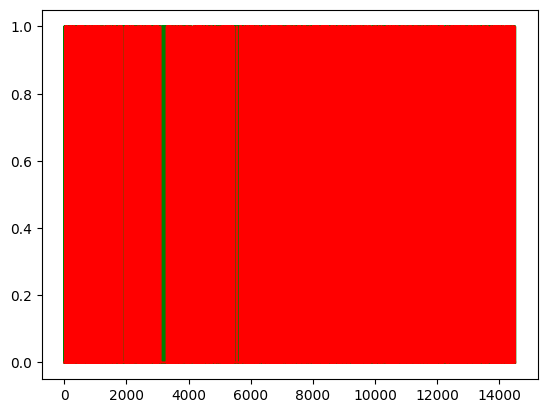

In [12]:
tam = test.shape[0]
x_range = range(tam)  # Generar un rango de valores desde 0 hasta tam-1

plt.plot(x_range, test[y_col_name], color='green')
plt.plot(x_range, y_pred, color='red')
plt.show()


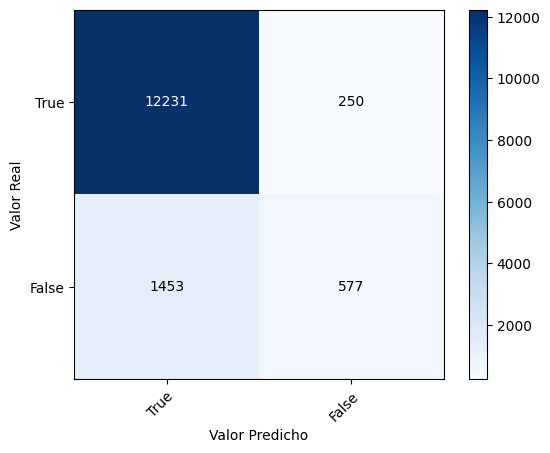

In [13]:
# Calcular la matriz de confusión
cm = confusion_matrix(test[y_col_name], y_pred)

# Definir las etiquetas de las clases
class_labels = ['True', 'False']

# Crear el gráfico de la matriz de confusión
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Etiquetas de los ejes
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_labels, yticklabels=class_labels,
       xlabel='Valor Predicho', ylabel='Valor Real')

# Rotar y alinear correctamente las etiquetas de los ejes
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Anotar los valores de la matriz de confusión en cada celda
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")

# Mostrar el gráfico
plt.show()


# Correlación de Pearson

Correlación lineal de las columnas

In [14]:
corMatrix = df_dummizado.corr()
corMatrix[(abs(corMatrix) > 0.25) & (corMatrix < 1)][y_col_name].dropna()

tender.enquiryPeriod.durationInDays                 0.312302
tender.numberOfTenderers                            0.312436
tender.tenderers.id q2                              0.292768
tender.tenderers.id q3                              0.265911
tender.enquiries porcentaje                         0.279866
tender.documents.documentTypeDetails_1              0.357891
tender.documents.documentTypeDetails_2              0.332325
tender.documents.documentTypeDetails_12             0.261852
parties.details.legalEntityTypeDetail enquirer_3    0.265047
parties.details.legalEntityTypeDetail supplier_3    0.257693
parties.details.legalEntityTypeDetail tenderer_3    0.332734
parties.roles tenderer q2                           0.293401
parties.roles tenderer q3                           0.263571
tender.procurementMethodDetails q1                 -0.320592
tender.procurementMethodDetails q4                  0.366967
Tiempo de convocatoria LPN                          0.275805
tender.hasEnquiries_Fals

In [15]:
corMatrix = df_dummizado.corr()
corMatrix['tender.value.amount'][y_col_name]

0.21756707738480727

In [6]:
corMatrix_kendall = df_dummizado.corr(method='kendall')
corMatrix_kendall[(abs(corMatrix_kendall) > 0.25) & (corMatrix_kendall < 1)][y_col_name].dropna()

tender.value.amount                                 0.307940
tender.enquiryPeriod.durationInDays                 0.251260
planning.budget.amount.amount                       0.302532
tender.enquiries.count                              0.286539
awards.value.amount_pyg                             0.251090
tender.enquiries total                              0.286539
tender.enquiries respondidos                        0.290876
tender.enquiries porcentaje                         0.280221
tender.documents.documentTypeDetails_3             -0.251039
tender.documents.documentTypeDetails_12             0.271575
parties.details.legalEntityTypeDetail enquirer_3    0.271747
tender.procurementMethodDetails q1                 -0.320592
tender.procurementMethodDetails q4                  0.366967
Tiempo de convocatoria LPN                          0.275805
tender.hasEnquiries_False                          -0.270946
tender.hasEnquiries_True                            0.270946
Name: has_complaint, dty

In [7]:
corMatrix_spearman = df_dummizado.corr(method='spearman')
corMatrix_spearman[(abs(corMatrix_spearman) > 0.25) & (corMatrix_spearman < 1)][y_col_name].dropna()

tender.value.amount                                 0.376934
tender.enquiryPeriod.durationInDays                 0.299007
planning.budget.amount.amount                       0.369644
tender.enquiries.count                              0.297892
contracts.value.amount_pyg                          0.261290
awards.value.amount_pyg                             0.304501
tender.enquiries total                              0.297892
tender.enquiries respondidos                        0.301921
tender.enquiries porcentaje                         0.280463
tender.documents.documentTypeDetails_1              0.263705
tender.documents.documentTypeDetails_3             -0.257903
tender.documents.documentTypeDetails_12             0.272815
parties.details.legalEntityTypeDetail enquirer_3    0.274140
parties.details.legalEntityTypeDetail tenderer_3    0.257444
tender.procurementMethodDetails q1                 -0.320592
tender.procurementMethodDetails q4                  0.366967
Tiempo de convocatoria L

# Comparativas con H2o

In [8]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "20.0.1" 2023-04-18; OpenJDK Runtime Environment Homebrew (build 20.0.1); OpenJDK 64-Bit Server VM Homebrew (build 20.0.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/0s/ngx4k9892vv59rf4q5h1h4w00000gn/T/tmp38vm188t
  JVM stdout: /var/folders/0s/ngx4k9892vv59rf4q5h1h4w00000gn/T/tmp38vm188t/h2o_matiaslopez_started_from_python.out
  JVM stderr: /var/folders/0s/ngx4k9892vv59rf4q5h1h4w00000gn/T/tmp38vm188t/h2o_matiaslopez_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       America/Asuncion
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.1
H2O_cluster_version_age:    1 month and 3 days
H2O_cluster_name:           H2O_from_python_matiaslopez_qzbr8k
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    15.98 Gb
H2O_cluster_total_cores:    12
H2O_cluster_allowed_cores:  12
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  ----------------------------------

### Primero para PCA:

In [19]:
# pca_train = pd.concat([pd.DataFrame(x_pca), y.reset_index(drop=True).astype(int)], axis=1) # version regressor
pca_train = pd.concat([pd.DataFrame(x_pca), y.reset_index(drop=True)], axis=1) # version classifier
pca_train

0             1             2  has_complaint
0     -7.848771e+09  1.547702e+08  5.868300e+06          False
1     -8.009262e+09  1.526665e+08  5.755380e+06          False
2     -5.275623e+09  1.400542e+09 -3.571976e+09          False
3     -7.087245e+09 -1.139085e+07  5.563663e+07          False
4     -8.118145e+09  1.723834e+08 -2.040763e+06          False
...             ...           ...           ...            ...
58036 -8.048831e+09  1.652832e+08  9.738946e+06          False
58037 -8.056777e+09  1.619184e+08  3.029643e+06          False
58038 -8.038044e+09  3.069279e+08 -2.452179e+07           True
58039 -7.912299e+09  1.395215e+08  9.982485e+06          False
58040  5.581008e+10 -6.282510e+09 -1.219821e+09           True

[58041 rows x 4 columns]

In [20]:
# pca_test = pd.concat([pd.DataFrame(test_x), test[y_col_name].reset_index(drop=True).astype(int)], axis=1)
pca_test = pd.concat([pd.DataFrame(test_x), test[y_col_name].reset_index(drop=True)], axis=1)
print(pca_test)

                  0             1             2  has_complaint
0     -8.039324e+09  3.060564e+08 -2.437942e+07          False
1     -3.260510e+09 -6.892566e+08  2.622386e+08           True
2     -7.917984e+09  1.357981e+08  1.081733e+07           True
3     -7.385633e+09  1.336230e+08 -1.500137e+08          False
4     -7.623207e+09  8.357946e+07  2.673007e+07          False
...             ...           ...           ...            ...
14506 -3.889368e+09 -5.778568e+08  2.282915e+08          False
14507 -8.099827e+09  2.042758e+08 -5.177849e+06          False
14508 -7.884891e+09  1.325203e+08  1.196786e+07           True
14509 -7.921759e+09  3.860699e+08 -3.745114e+07          False
14510 -8.173458e+09  1.810543e+08 -2.973714e+06          False

[14511 rows x 4 columns]


In [21]:
train_h2o_pca = h2o.H2OFrame.from_python(pca_train)
test_h2o_pca = h2o.H2OFrame.from_python(pca_test)
#list(y.astype(int))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [22]:
# Run AutoML for 20 base models
aml = H2OAutoML(max_models=25, seed=1)
aml.train(x=train_h2o_pca.columns, y=y_col_name, training_frame=train_h2o_pca)
# View the AutoML Leader
# board
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------
StackedEnsemble_AllModels_1_AutoML_1_20230720_95818     0.845686   0.286055  0.601106                0.250815  0.288117  0.0830116
StackedEnsemble_BestOfFamily_1_AutoML_1_20230720_95818  0.844555   0.286962  0.599526                0.250688  0.288588  0.0832828
XGBoost_grid_1_AutoML_1_20230720_95818_model_2          0.840561   0.290783  0.587878                0.256533  0.290298  0.0842731
XGBoost_grid_1_AutoML_1_20230720_95818_model_4          0.838703   0.294085  0.573762                0.266232  0.29293   0.0858081
DRF_1_AutoML_1_20230720_95818                           0.838653   0.294893  0.590909                0.258373  0.29166   0.0850657
XGBoost_grid_1_AutoML_1_20230720_95818_model_3          0.834384   0.297753  0.561684                0.265775  0.295369  0.0872431
XGBoost_grid_1_AutoML_1_20230720_95818_model_1          0.833978   0.297431  0.564942                0.263348  0.294597  0.0867876
XGBoost_2_AutoML_1_20230720_95818                       0.833119   0.297801  0.565484                0.26145   0.29476   0.0868837
XGBoost_grid_1_AutoML_1_20230720_95818_model_5          0.833097   0.298206  0.563302                0.2644    0.29499   0.0870192
XGBoost_1_AutoML_1_20230720_95818                       0.832597   0.29799   0.565884                0.262226  0.294492  0.0867257
XGBoost_3_AutoML_1_20230720_95818                       0.830009   0.300068  0.557063                0.262629  0.296411  0.0878594
GBM_1_AutoML_1_20230720_95818                           0.829902   0.301179  0.552169                0.272974  0.297084  0.0882586
GBM_4_AutoML_1_20230720_95818                           0.828827   0.29928   0.564866                0.272849  0.29519   0.087137
XRT_1_AutoML_1_20230720_95818                           0.826697   0.303837  0.57293                 0.271993  0.295674  0.0874231
GBM_grid_1_AutoML_1_20230720_95818_model_1              0.82585    0.301704  0.554271                0.265155  0.296445  0.0878797
GBM_3_AutoML_1_20230720_95818                           0.824129   0.302367  0.556896                0.262166  0.296774  0.0880748
GBM_2_AutoML_1_20230720_95818                           0.822121   0.304172  0.55029                 0.269916  0.297869  0.0887258
GBM_grid_1_AutoML_1_20230720_95818_model_2              0.821575   0.305567  0.545528                0.279265  0.298822  0.0892945
GBM_grid_1_AutoML_1_20230720_95818_model_4              0.821526   0.307981  0.530962                0.275095  0.300646  0.0903883
GBM_5_AutoML_1_20230720_95818                           0.820796   0.30481   0.550994                0.274176  0.298068  0.0888443
GBM_grid_1_AutoML_1_20230720_95818_model_3              0.820523   0.305633  0.545977                0.264673  0.298773  0.0892655
DeepLearning_grid_2_AutoML_1_20230720_95818_model_1     0.789761   0.328732  0.495246                0.270818  0.308525  0.0951874
DeepLearning_grid_1_AutoML_1_20230720_95818_model_1     0.777927   0.355174  0.493484                0.298704  0.310537  0.096433
GLM_1_AutoML_1_20230720_95818                           0.777221   0.378621  0.509135                0.278187  0.332542  0.110584
DeepLearning_grid_3_AutoML_1_20230720_95818_model_1     0.775433   0.332716  0.49712                 0.279669  0.308137  0.0949486
DeepLearning_grid_1_AutoML_1_20230720_95818_model_2     0.774141   0.366203  0.495901                0.292724  0.316961  0.100464
DeepLearning_1_AutoML_1_20230720_95818                  0.772278   0.330117  0.503073                0.285651  0.306966  0.0942283
[27 rows x 7 columns]

In [23]:
aml.leader

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20230720_95818


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       4/25
# GBM base models (used / total)           1/9
# XGBoost base models (used / total)       2/8
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  0/5
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.06736856496680065
RMSE: 0.2595545510423592
LogLoss: 0.2366016051663933
AUC: 0.9108041948453529
AUCPR: 0.7464038131249754
Gini: 0.8216083896907058
Null degrees of freedom: 9975
Residual degrees of freedom: 9971
Null deviance: 8142.625716871362
Residual deviance: 4720.675226279878
AIC: 4730.675226279878

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35670151281074686
       False    True    Error    Rate
-----  -------  ------  -------  --------------
False  8305     257     0.03     (257.0/8562.0)
True   602      812     0.4257   (602.0/1414.0)
Total  8907     1069    0.0861   (859.0/9976.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.356702     0.654048  163
max f2                       0.126635     0.704706  269
max f0point5                 0.511524     0.746829  114
max accuracy                 0.387012     0.915497  154
max precision                0.99993      1         0
max recall                   0.0193668    1         390
max specificity              0.99993      1         0
max absolute_mcc             0.387012     0.615043  154
max min_per_class_accuracy   0.128429     0.825318  268
max mean_per_class_accuracy  0.126635     0.827548  269
max tns                      0.99993      8562      0
max fns                      0.99993      1366      0
max fps                      0.000635177  8562      399
max tps                      0.0193668    1414      390
max tnr                      0.99993      1         0
max fnr                      0.99993      0.966054  0
max fpr                      0.000635177  1         399
max tpr                      0.0193668    1         390

Gains/Lift Table: Avg response rate: 14.17 %, avg score: 14.08 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100241                   0.937847           7.05516    7.05516            1                0.982142   1                           0.982142            0.0707214       0.0707214                  605.516   605.516            0.0707214
2        0.0200481                   0.853867           7.05516    7.05516            1                0.899759   1                           0.940951            0.0707214       0.141443                   605.516   605.516            0.141443
3        0.0301724                   0.771207           6.98531    7.03172            0.990099         0.812358   0.996678                    0.897801            0.0707214       0.212164                   598.531   603.172            

In [24]:
preds = aml.predict(test_h2o_pca)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [25]:
preds['predict'] == 'True'
preds_True = preds[(preds['predict'] == 'True')]
preds_True.head(50)

predict        False      True
---------  ---------  --------
True       0.501876   0.498124
True       0.489041   0.510959
True       0.670389   0.329611
True       0.206687   0.793313
True       0.203461   0.796539
True       0.337096   0.662904
True       0.489259   0.510741
True       0.610144   0.389856
True       0.150689   0.849311
True       0.187607   0.812393
True       0.686205   0.313795
True       0.175545   0.824455
True       0.600582   0.399418
True       0.426562   0.573438
True       0.249683   0.750317
True       0.633195   0.366805
True       0.660484   0.339516
True       0.374858   0.625142
True       0.622798   0.377202
True       0.465305   0.534695
True       0.477063   0.522937
True       0.62504    0.37496
True       0.676173   0.323827
True       0.116332   0.883668
True       0.670144   0.329856
True       0.666392   0.333608
True       0.666235   0.333765
True       0.14007    0.85993
True       0.308431   0.691569
True       0.565735   0.434265
True       0.0933634  0.906637
True       0.656385   0.343615
True       0.242422   0.757578
True       0.630453   0.369547
True       0.550405   0.449595
True       0.110674   0.889326
True       0.349651   0.650349
True       0.565463   0.434537
True       0.664673   0.335327
True       0.588626   0.411374
True       0.196845   0.803155
True       0.709045   0.290955
True       0.582386   0.417614
True       0.651288   0.348712
True       0.150563   0.849437
True       0.661233   0.338767
True       0.692902   0.307098
True       0.08183    0.91817
True       0.161027   0.838973
True       0.429488   0.570512
[50 rows x 3 columns]

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_1_20230720_95818     0.846348   0.284805  0.597285                0.248348  0.287578  0.0827011               10874                   0.008486  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20230720_95818  0.844588   0.285991  0.595074                0.254744  0.288184  0.0830499               10116                   0.00713   StackedEnsemble
XGBoost_grid_1_AutoML_1_20230720_95818_model_2          0.840214   0.289542  0.582601                0.252766  0.289646  0.083895                 1965                   0.005999  XGBoost
DRF_1_AutoML_1_20230720_95818                           0.839308   0.293891  0.58603                 0.254983  0.291638  0.0850529                 753                   0.005248  DRF
XGBoost_grid_1_AutoML_1_20230720_95818_model_4          0.837175   0.293543  0.567214                0.258092  0.292023  0.0852772                1661                   0.003371  XGBoost
XGBoost_2_AutoML_1_20230720_95818                       0.834167   0.295856  0.560238                0.258709  0.29354   0.0861656                1134                   0.0033    XGBoost
XRT_1_AutoML_1_20230720_95818                           0.832721   0.303807  0.565113                0.26585   0.295452  0.0872916                 441                   0.003911  DRF
XGBoost_1_AutoML_1_20230720_95818                       0.83266    0.29651   0.561456                0.269382  0.293505  0.0861451                1643                   0.0084    XGBoost
XGBoost_grid_1_AutoML_1_20230720_95818_model_5          0.832504   0.29715   0.557312                0.267003  0.293993  0.086432                 4212                   0.004121  XGBoost
XGBoost_grid_1_AutoML_1_20230720_95818_model_3          0.831867   0.298733  0.54834                 0.262794  0.29572   0.0874502                2987                   0.002235  XGBoost
XGBoost_grid_1_AutoML_1_20230720_95818_model_1          0.829903   0.298539  0.554143                0.269963  0.294874  0.0869509                1180                   0.003442  XGBoost
XGBoost_3_AutoML_1_20230720_95818                       0.828046   0.301245  0.543405                0.278192  0.297102  0.0882696                1065                   0.002428  XGBoost
GBM_4_AutoML_1_20230720_95818                           0.827728   0.299625  0.555879                0.266947  0.295542  0.0873451                 541                   0.005893  GBM
GBM_1_AutoML_1_20230720_95818                           0.827406   0.302129  0.537874                0.269954  0.297489  0.0884996                2725                   0.008096  GBM
GBM_grid_1_AutoML_1_20230720_95818_model_1              0.826981   0.298817  0.551811                0.248591  0.294611  0.0867955                 672                   0.007503  GBM
GBM_grid_1_AutoML_1_20230720_95818_model_4              0.823497   0.304954  0.530468                0.25764   0.298807  0.0892858                 712                   0.010269  GBM
GBM_3_AutoML_1_20230720_95818                           0.822223   0.303026  0.546941                0.272969  0.297208  0.0883325                 522                   0.006005  GBM
GBM_2_AutoML_1_20230720_95818                           0.820561   0.305178  0.537896                0.276385  0.298502  0.0891037                 455                   0.005592  GBM
GBM_grid_1_AutoML_1_20230720_95818_model_3              0.820041   0.305802  0.536501                0.282699  0.298934  0.0893618                 625                   0.006321  GBM
GBM_grid_1_AutoML_1_20230720_95818_model_2              0.820021   0.306504  0.531759   

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20230720_95818

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23928884095176395
       False    True    Error    Rate
-----  -------  ------  -------  ----------------
False  11434    1047    0.0839   (1047.0/12481.0)
True   838      1192    0.4128   (838.0/2030.0)
Total  12272    2239    0.1299   (1885.0/14511.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

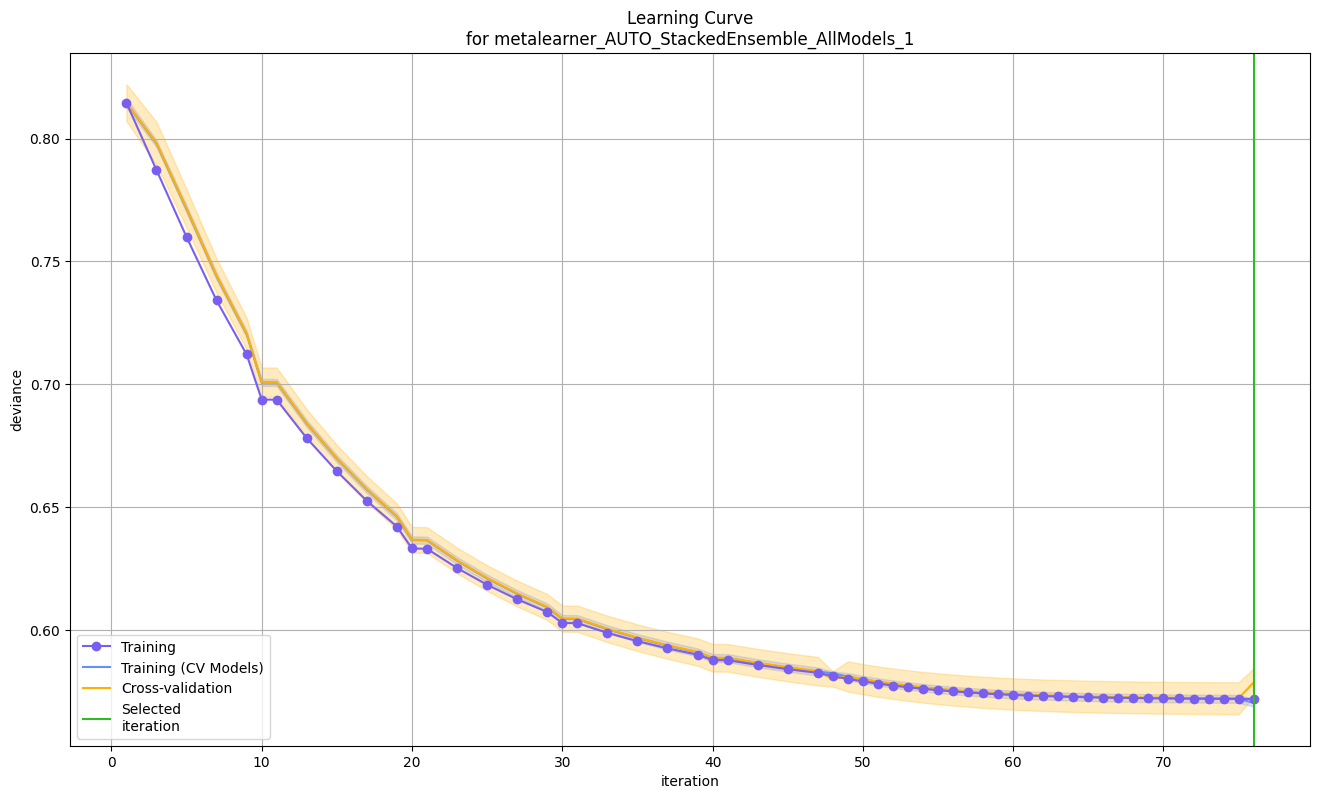

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

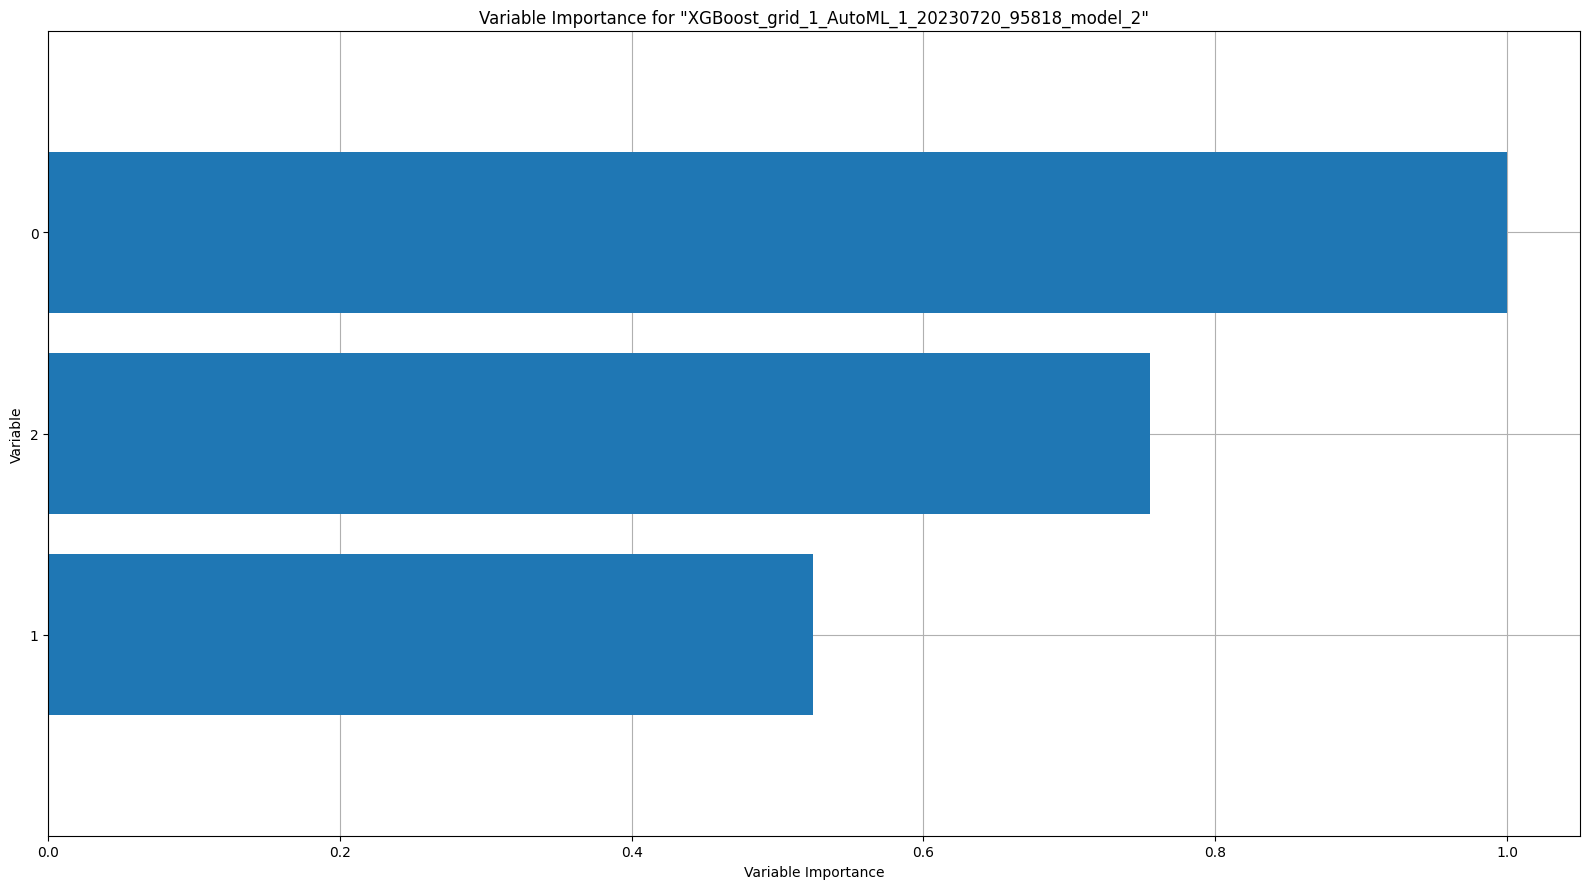

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

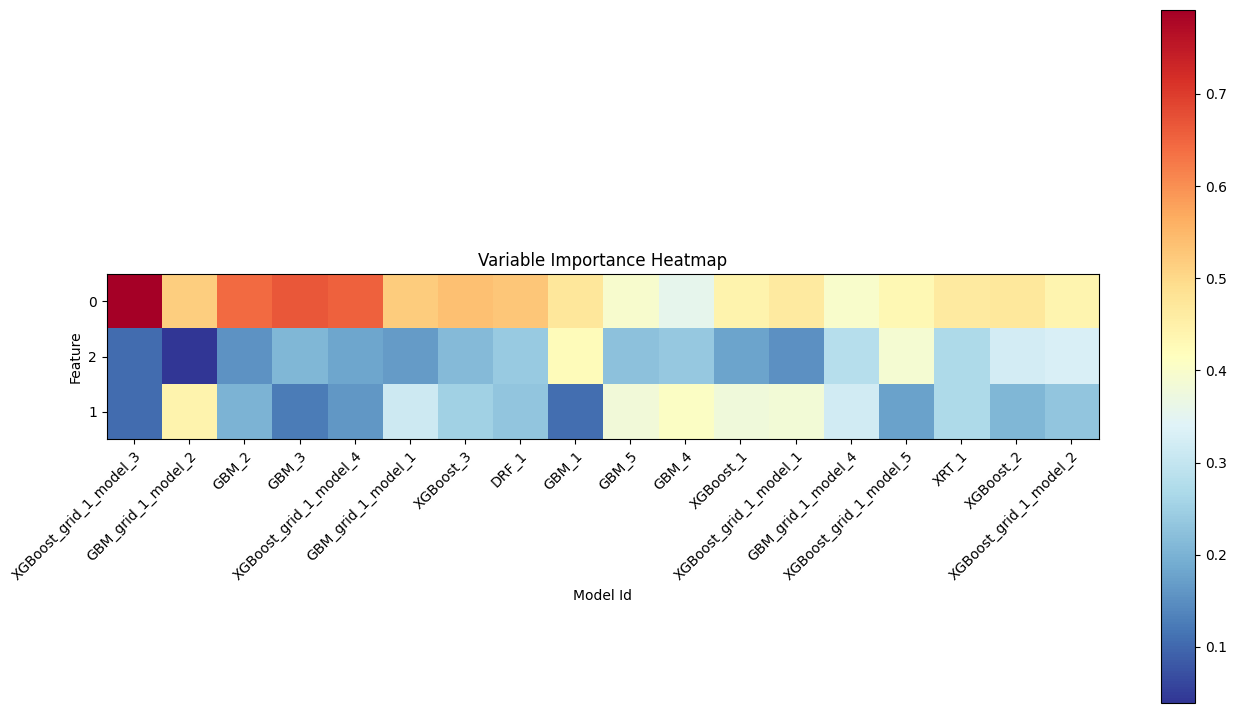

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

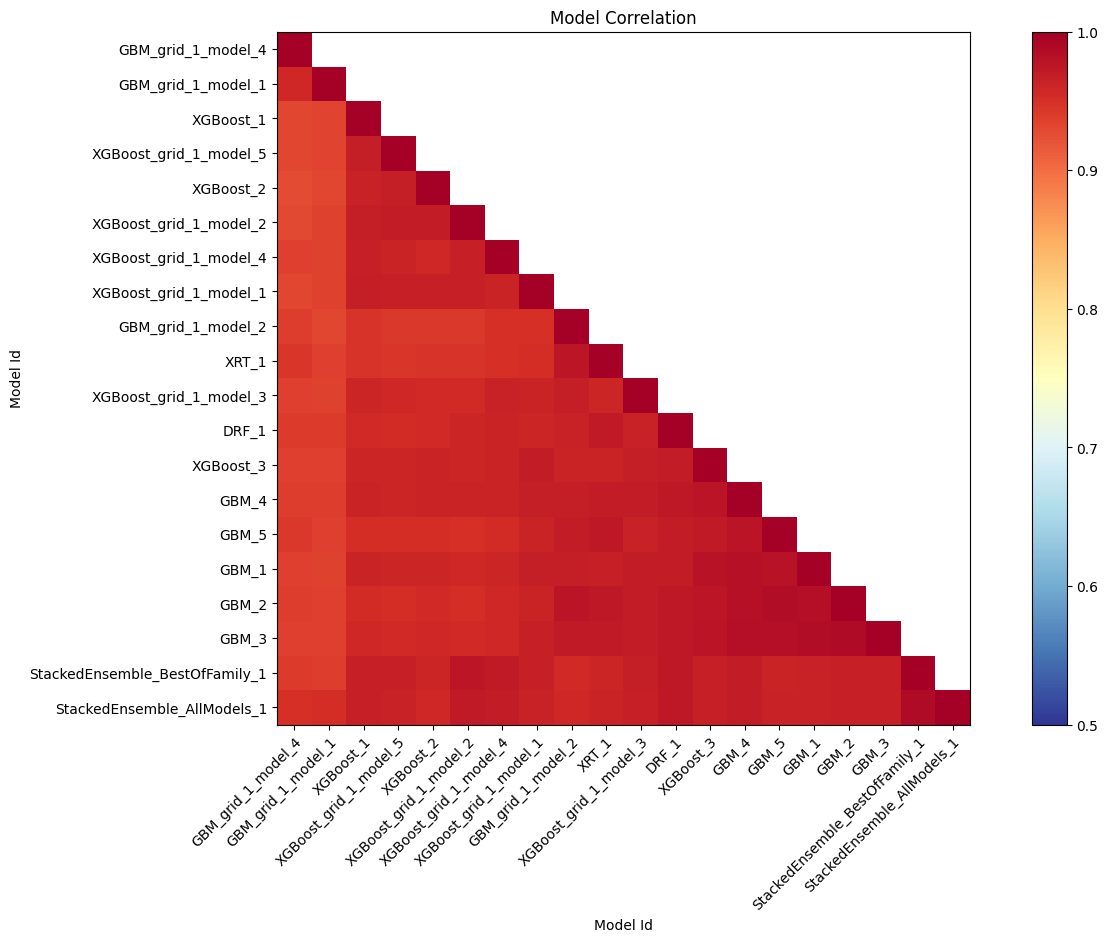

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

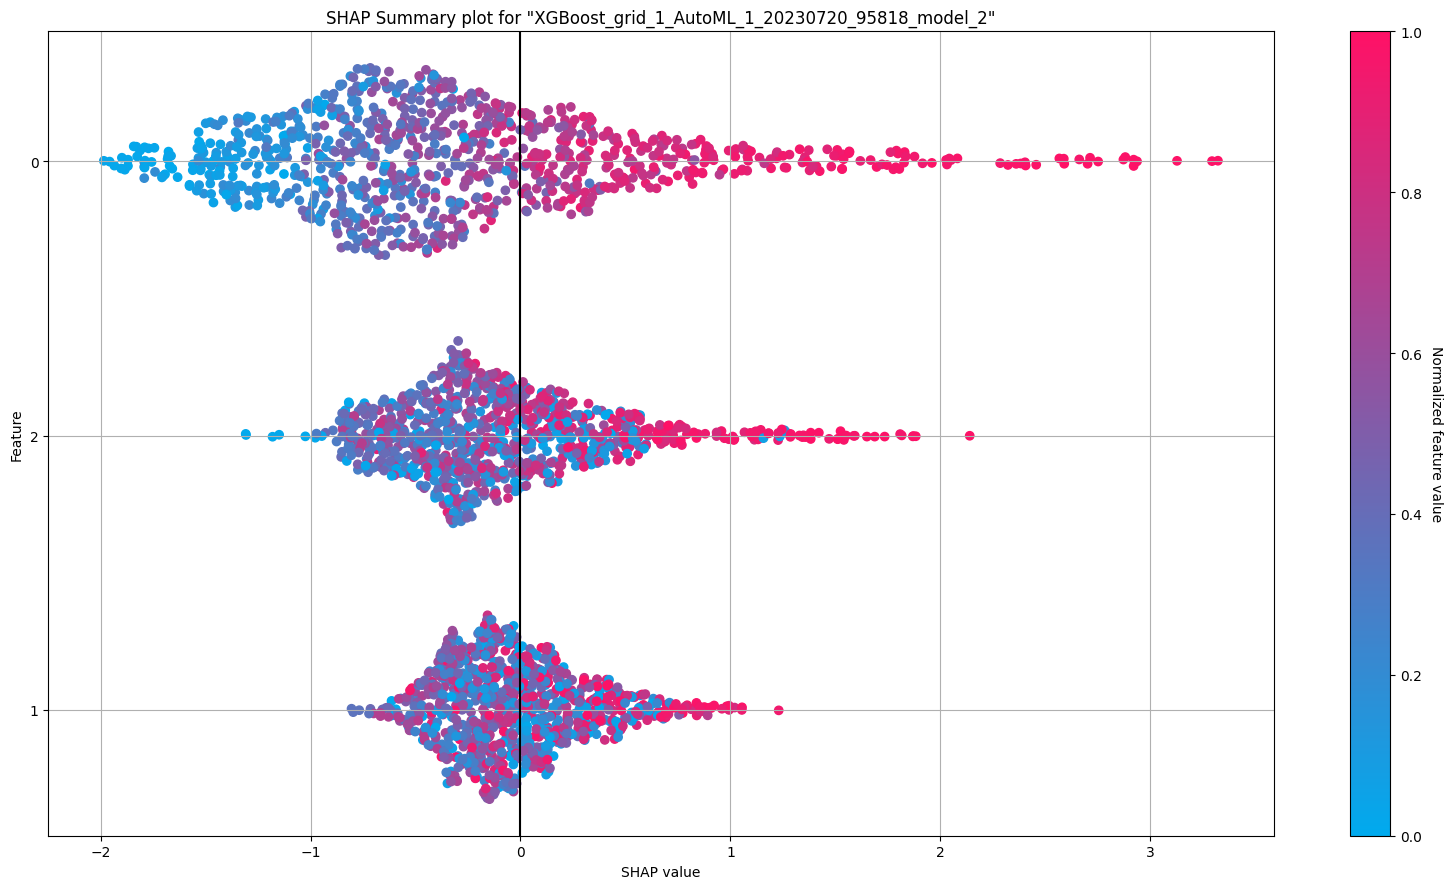

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

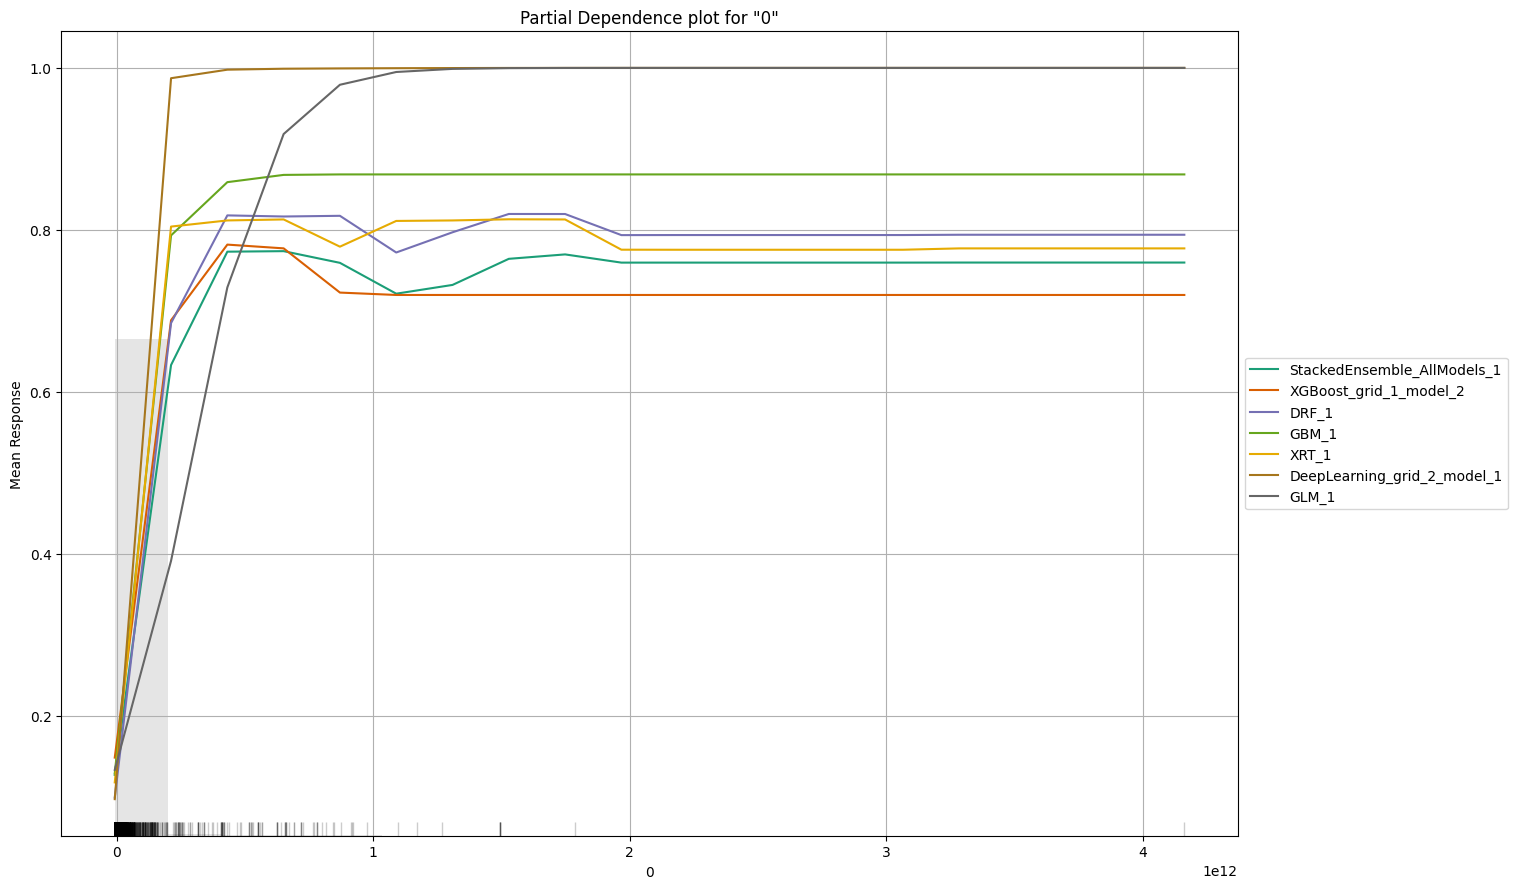

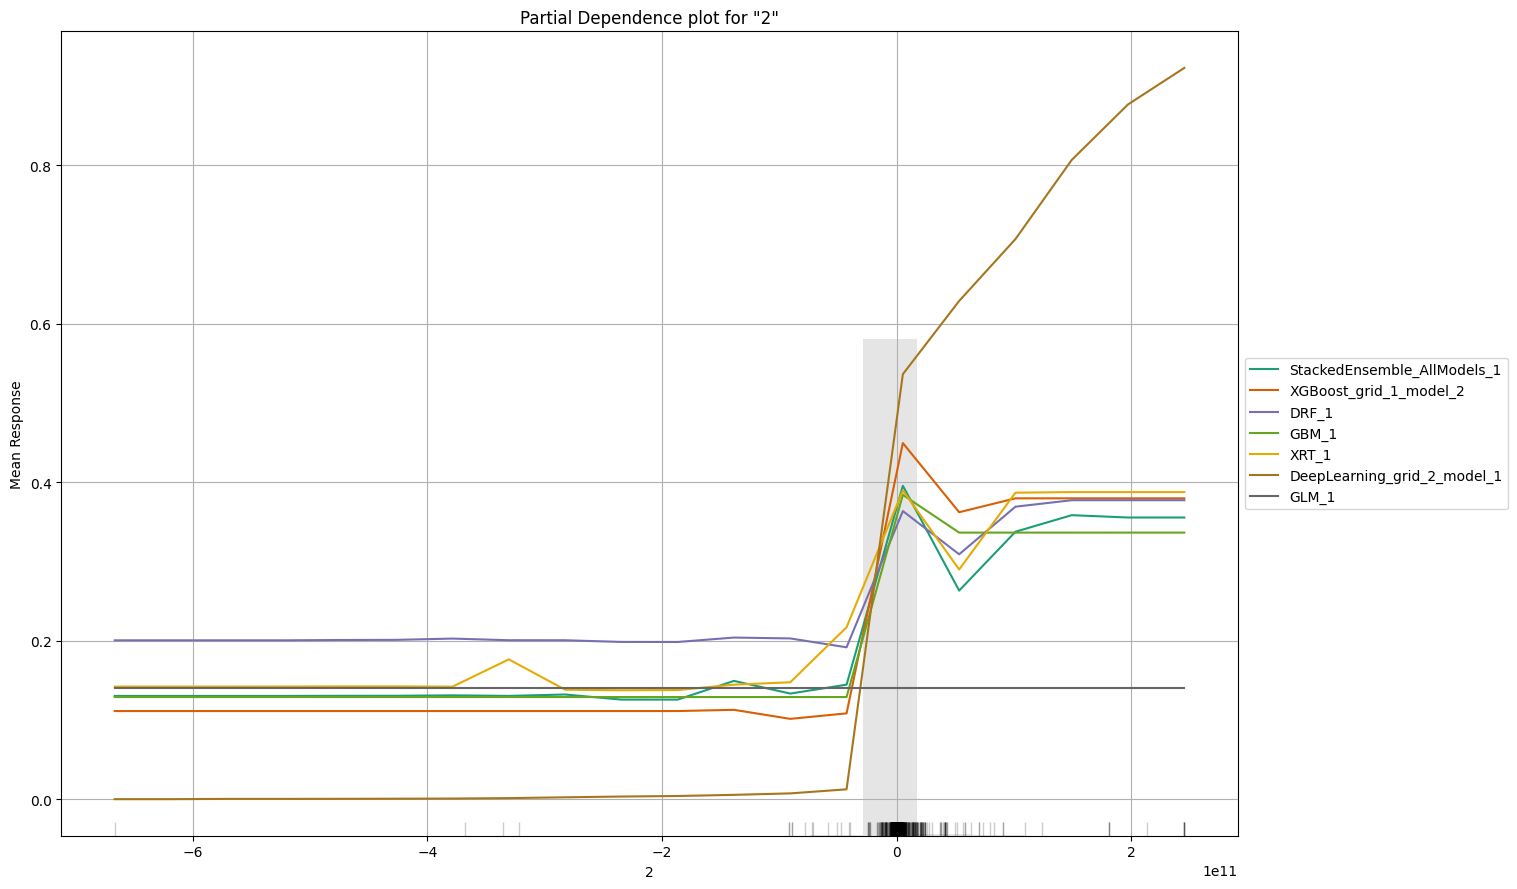

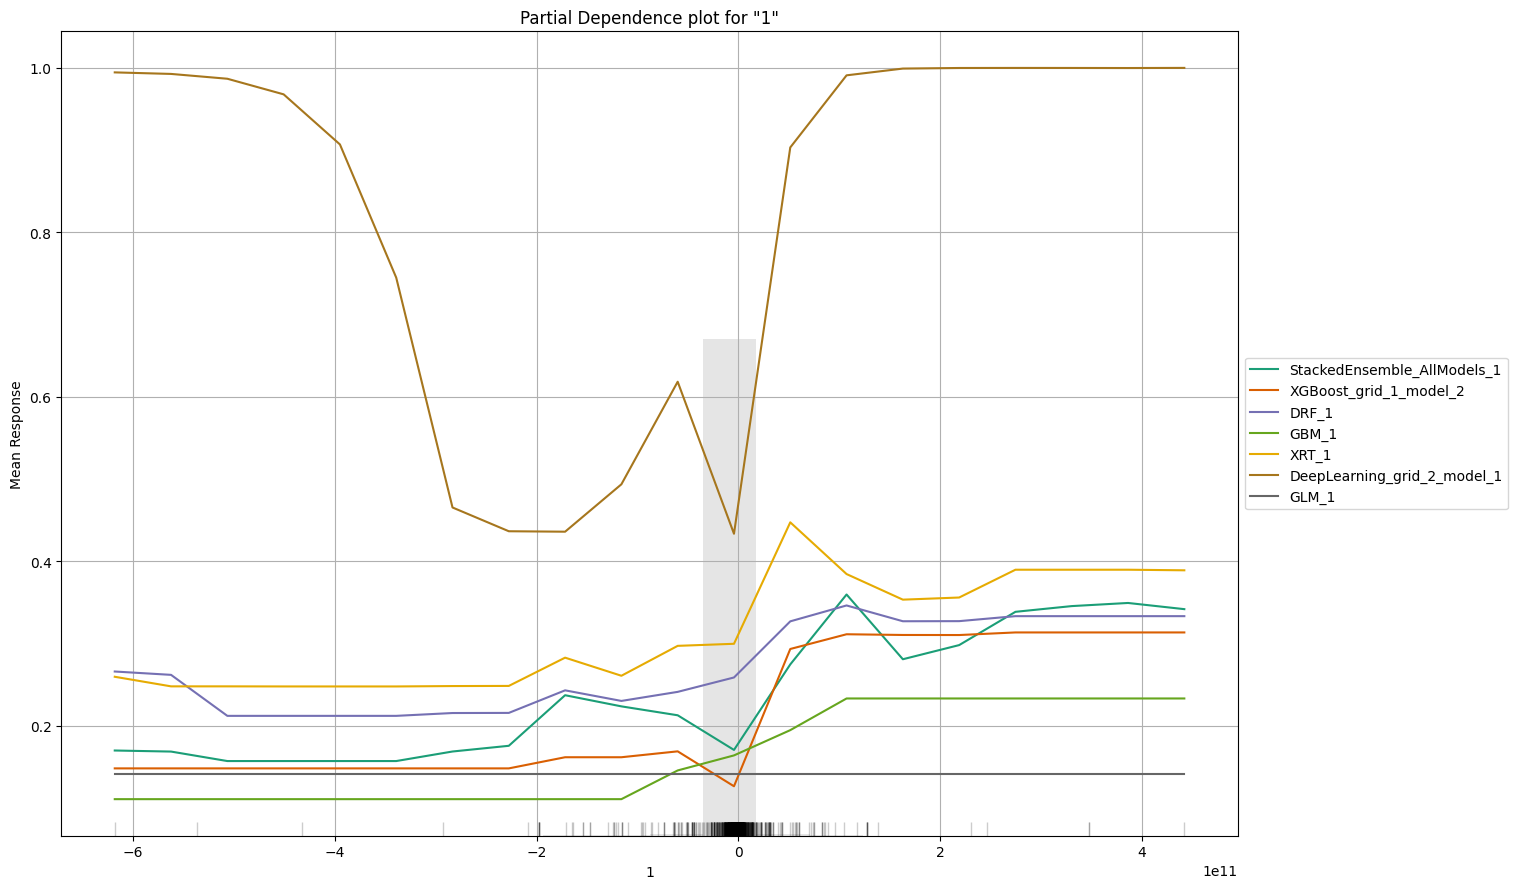

In [26]:
exa = aml.explain(test_h2o_pca)

### Para Correlación de Pearson

In [27]:
df_pearson = df_dummizado[['tender.enquiryPeriod.durationInDays','tender.numberOfTenderers','tender.tenderers.id q2','tender.tenderers.id q3','tender.enquiries porcentaje','tender.documents.documentTypeDetails_1','tender.documents.documentTypeDetails_2','tender.documents.documentTypeDetails_12','parties.details.legalEntityTypeDetail enquirer_3','parties.details.legalEntityTypeDetail supplier_3','parties.details.legalEntityTypeDetail tenderer_3','parties.roles tenderer q2','parties.roles tenderer q3','tender.procurementMethodDetails q1','tender.procurementMethodDetails q4','Tiempo de convocatoria LPN','tender.hasEnquiries_False','tender.hasEnquiries_True','has_complaint']]

In [28]:
train_pearson, test_pearson = train_test_split(df_pearson, test_size=0.2, random_state=42)

In [29]:
print(len(train_pearson))
print(len(test_pearson))

58041
14511


In [30]:
train_h2o_pearson = h2o.H2OFrame.from_python(train_pearson)
test_h2o_pearson = h2o.H2OFrame.from_python(test_pearson)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [31]:
# Run AutoML for 20 base models
aml = H2OAutoML(max_models=25, seed=1)
aml.train(x=train_h2o_pearson.columns, y=y_col_name, training_frame=train_h2o_pearson)
# View the AutoML Leader
# board
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------
StackedEnsemble_AllModels_1_AutoML_2_20230720_101931     0.869427   0.254468  0.698732                0.233205  0.266724  0.0711415
StackedEnsemble_BestOfFamily_1_AutoML_2_20230720_101931  0.869412   0.254398  0.698888                0.227423  0.266682  0.0711193
DRF_1_AutoML_2_20230720_101931                           0.865807   0.261616  0.701555                0.234877  0.267939  0.0717913
XRT_1_AutoML_2_20230720_101931                           0.861676   0.264484  0.672123                0.241041  0.273683  0.0749024
GBM_grid_1_AutoML_2_20230720_101931_model_1              0.861421   0.268162  0.654141                0.245461  0.276925  0.0766875
GBM_grid_1_AutoML_2_20230720_101931_model_4              0.860882   0.271206  0.642879                0.242154  0.27924   0.0779747
XGBoost_grid_1_AutoML_2_20230720_101931_model_2          0.85993    0.269665  0.651823                0.240916  0.277194  0.0768366
GBM_4_AutoML_2_20230720_101931                           0.859844   0.26912   0.652387                0.242138  0.277318  0.0769051
GBM_1_AutoML_2_20230720_101931                           0.858579   0.275275  0.629368                0.241483  0.282195  0.079634
GBM_3_AutoML_2_20230720_101931                           0.857441   0.272924  0.641278                0.251933  0.279929  0.0783601
XGBoost_grid_1_AutoML_2_20230720_101931_model_4          0.856718   0.275742  0.630723                0.236626  0.281851  0.0794402
GBM_2_AutoML_2_20230720_101931                           0.855673   0.275204  0.634467                0.248138  0.281422  0.0791983
XGBoost_grid_1_AutoML_2_20230720_101931_model_1          0.855324   0.276545  0.62925                 0.250574  0.282112  0.0795872
XGBoost_1_AutoML_2_20230720_101931                       0.854645   0.278204  0.625843                0.245811  0.283181  0.0801917
XGBoost_2_AutoML_2_20230720_101931                       0.854538   0.277103  0.629641                0.24252   0.282103  0.0795823
XGBoost_grid_1_AutoML_2_20230720_101931_model_3          0.854258   0.278212  0.62352                 0.245322  0.283488  0.0803653
XGBoost_grid_1_AutoML_2_20230720_101931_model_5          0.854124   0.278342  0.624683                0.242664  0.283342  0.0802825
GBM_5_AutoML_2_20230720_101931                           0.854001   0.276956  0.630079                0.246012  0.282521  0.079818
XGBoost_3_AutoML_2_20230720_101931                       0.85354    0.279153  0.620782                0.248455  0.28424   0.0807925
GBM_grid_1_AutoML_2_20230720_101931_model_3              0.851681   0.279702  0.620948                0.248077  0.284243  0.0807939
GBM_grid_1_AutoML_2_20230720_101931_model_2              0.850766   0.281278  0.616744                0.247279  0.285165  0.0813191
DeepLearning_grid_1_AutoML_2_20230720_101931_model_2     0.84222    0.29623   0.592707                0.254679  0.290867  0.0846038
DeepLearning_1_AutoML_2_20230720_101931                  0.841415   0.289496  0.595848                0.259857  0.289296  0.0836923
DeepLearning_grid_1_AutoML_2_20230720_101931_model_1     0.841119   0.306906  0.593742                0.250885  0.292672  0.0856567
GLM_1_AutoML_2_20230720_101931                           0.838459   0.293788  0.583769                0.251225  0.291217  0.0848074
DeepLearning_grid_2_AutoML_2_20230720_101931_model_1     0.834288   0.302264  0.586722                0.253859  0.294004  0.0864383
DeepLearning_grid_3_AutoML_2_20230720_101931_model_1     0.831901   0.302204  0.574956                0.253349  0.293508  0.0861468
[27 rows x 7 columns]

In [32]:
aml.leader

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_2_20230720_101931


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       5/25
# GBM base models (used / total)           1/9
# XGBoost base models (used / total)       1/8
# DRF base models (used / total)           2/2
# DeepLearning base models (used / total)  1/5
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.04235683525684075
RMSE: 0.20580776286826682
LogLoss: 0.16402119530577863
AUC: 0.9537833613674712
AUCPR: 0.8936007410800136
Gini: 0.9075667227349424
Null degrees of freedom: 9975
Residual degrees of freedom: 9970
Null deviance: 8142.625716871362
Residual deviance: 3272.550888740895
AIC: 3284.550888740895

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32892884758361857
       False    True    Error    Rate
-----  -------  ------  -------  --------------
False  8502     60      0.007    (60.0/8562.0)
True   327      1087    0.2313   (327.0/1414.0)
Total  8829     1147    0.0388   (387.0/9976.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.328929     0.848887  176
max f2                       0.211925     0.818488  216
max f0point5                 0.4033       0.920344  157
max accuracy                 0.347802     0.961207  171
max precision                0.999992     1         0
max recall                   0.0158043    1         378
max specificity              0.999992     1         0
max absolute_mcc             0.328929     0.832871  176
max min_per_class_accuracy   0.118102     0.87553   264
max mean_per_class_accuracy  0.211925     0.894789  216
max tns                      0.999992     8562      0
max fns                      0.999992     1256      0
max fps                      7.43842e-05  8562      399
max tps                      0.0158043    1414      378
max tnr                      0.999992     1         0
max fnr                      0.999992     0.88826   0
max fpr                      7.43842e-05  1         399
max tpr                      0.0158043    1         378

Gains/Lift Table: Avg response rate: 14.17 %, avg score: 13.66 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100241                   0.999995           7.05516    7.05516            1                0.999998    1                           0.999998            0.0707214       0.0707214                  605.516   605.516            0.0707214
2        0.0200481                   0.966879           7.05516    7.05516            1                0.991063    1                           0.99553             0.0707214       0.141443                   605.516   605.516            0.141443
3        0.0302727                   0.92847            7.05516    7.05516            1                0.948058    1                           0.979497            0.0721358       0.213579                   605.516   605.516     

In [33]:
preds_pearson = aml.predict(test_h2o_pearson)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [34]:
preds_pearson['predict'] == 'True'
preds_pearson_True = preds_pearson[(preds_pearson['predict'] == 'True')]
preds_pearson_True.head(50)

predict          False      True
---------  -----------  --------
True       0.338105     0.661895
True       0.381869     0.618131
True       0.140432     0.859568
True       0.313695     0.686305
True       0.530967     0.469033
True       0.56216      0.43784
True       0.0715304    0.92847
True       0.582969     0.417031
True       0.347377     0.652623
True       0.177233     0.822767
True       0.160538     0.839462
True       0.154455     0.845545
True       0.126382     0.873618
True       0.528459     0.471541
True       0.570594     0.429406
True       0.14886      0.85114
True       0.638069     0.361931
True       0.602738     0.397262
True       0.617049     0.382951
True       0.520758     0.479242
True       0.602271     0.397729
True       0.026458     0.973542
True       0.0452056    0.954794
True       0.580038     0.419962
True       0.267191     0.732809
True       0.641294     0.358706
True       0.0755691    0.924431
True       0.227263     0.772737
True       0.128561     0.871439
True       0.312207     0.687793
True       0.401439     0.598561
True       0.273929     0.726071
True       0.557863     0.442137
True       0.383979     0.616021
True       0.54379      0.45621
True       0.509076     0.490924
True       2.84726e-06  0.999997
True       3.88729e-06  0.999996
True       0.388045     0.611955
True       0.617653     0.382347
True       5.58788e-06  0.999994
True       0.22131      0.77869
True       0.489802     0.510198
True       0.317891     0.682109
True       0.0684555    0.931545
True       0.201747     0.798253
True       0.462346     0.537654
True       0.594467     0.405533
True       0.594142     0.405858
True       2.08302e-08  1
[50 rows x 3 columns]

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_2_20230720_101931     0.873151   0.249509  0.706122                0.231426  0.263412  0.0693861               13214                   0.016887  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20230720_101931  0.87311    0.249484  0.706225                0.231426  0.263392  0.0693752               10666                   0.018206  StackedEnsemble
DRF_1_AutoML_2_20230720_101931                           0.870282   0.256446  0.708703                0.229771  0.265043  0.0702478                1786                   0.016014  DRF
GBM_grid_1_AutoML_2_20230720_101931_model_1              0.865563   0.262031  0.664465                0.239284  0.273108  0.0745878                1082                   0.012788  GBM
GBM_grid_1_AutoML_2_20230720_101931_model_4              0.864209   0.266166  0.649868                0.235414  0.27613   0.076248                 1181                   0.016987  GBM
XGBoost_grid_1_AutoML_2_20230720_101931_model_2          0.864168   0.263987  0.660374                0.234349  0.273901  0.0750218                5491                   0.006595  XGBoost
XRT_1_AutoML_2_20230720_101931                           0.86277    0.263071  0.677383                0.243906  0.270913  0.0733939                1596                   0.015855  DRF
GBM_4_AutoML_2_20230720_101931                           0.862231   0.265714  0.655441                0.241002  0.27533   0.0758065                1001                   0.011928  GBM
XGBoost_grid_1_AutoML_2_20230720_101931_model_4          0.861595   0.270826  0.635116                0.23635   0.27905   0.0778688                3944                   0.003291  XGBoost
XGBoost_2_AutoML_2_20230720_101931                       0.860872   0.271048  0.635794                0.244601  0.27933   0.0780254                3551                   0.003554  XGBoost
GBM_1_AutoML_2_20230720_101931                           0.860698   0.272925  0.626973                0.23375   0.281025  0.0789753                3179                   0.013526  GBM
GBM_3_AutoML_2_20230720_101931                           0.859167   0.27049   0.639303                0.254007  0.278534  0.0775811                 915                   0.010834  GBM
XGBoost_1_AutoML_2_20230720_101931                       0.858189   0.272857  0.632554                0.243199  0.279831  0.0783051                4859                   0.004117  XGBoost
XGBoost_grid_1_AutoML_2_20230720_101931_model_1          0.857495   0.2741    0.628894                0.239847  0.281051  0.0789896                2979                   0.003475  XGBoost
XGBoost_grid_1_AutoML_2_20230720_101931_model_5          0.857377   0.273613  0.630306                0.246952  0.280536  0.0787004                6416                   0.003946  XGBoost
GBM_2_AutoML_2_20230720_101931                           0.856143   0.274141  0.62927                 0.25233   0.280909  0.07891                   817                   0.010523  GBM
XGBoost_grid_1_AutoML_2_20230720_101931_model_3          0.855206   0.275855  0.623905                0.243107  0.282075  0.0795662                4922                   0.001942  XGBoost
GBM_5_AutoML_2_20230720_101931                           0.854571   0.275112  0.627133                0.248122  0.28138   0.079175                  789                   0.009712  GBM
XGBoost_3_AutoML_2_20230720_101931                       0.854186   0.276873  0.620734                0.259068  0.282878  0.0800201                2050                   0.00204   XGBoost
GBM_grid_1_AutoML_2_20230720_101931_model_3              0.852328  

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_2_20230720_101931

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38736895932824195
       False    True    Error    Rate
-----  -------  ------  -------  ----------------
False  12047    434     0.0348   (434.0/12481.0)
True   869      1161    0.4281   (869.0/2030.0)
Total  12916    1595    0.0898   (1303.0/14511.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

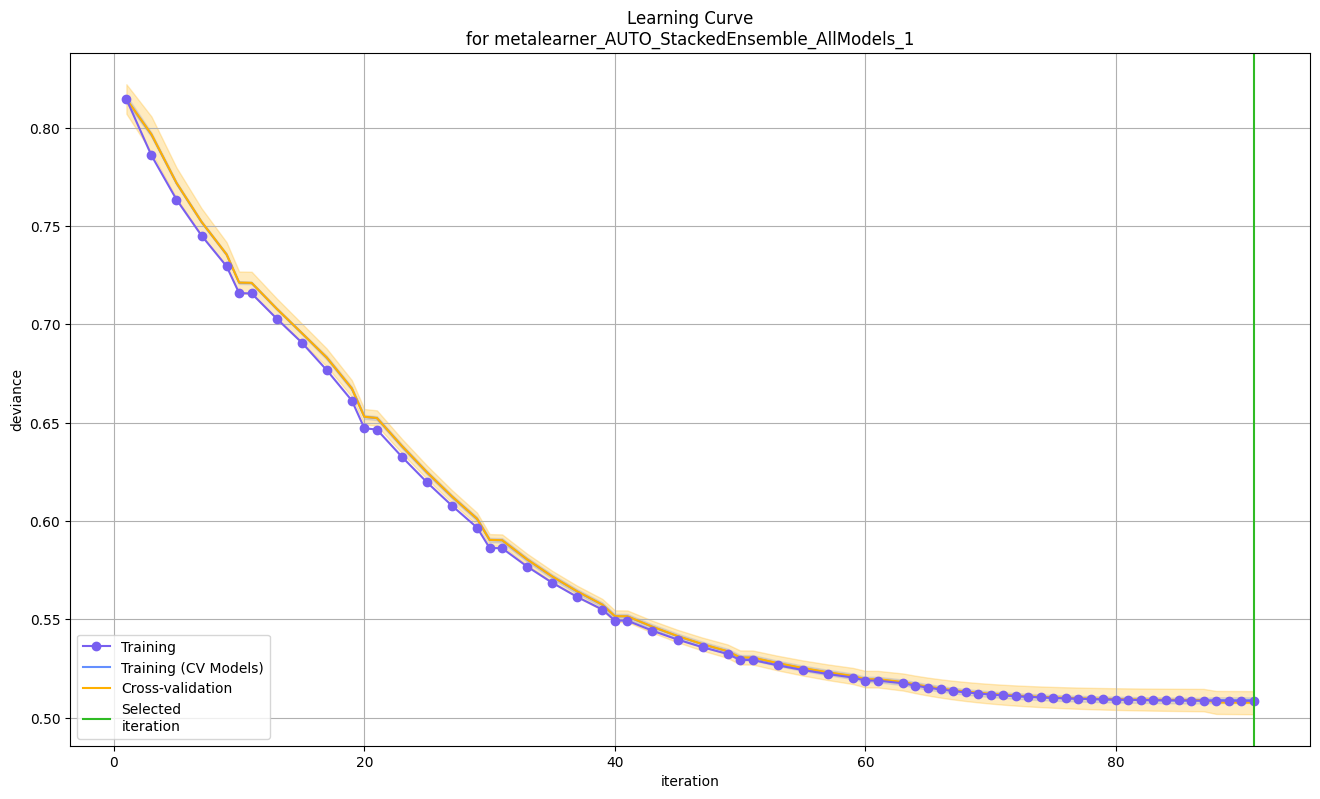

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

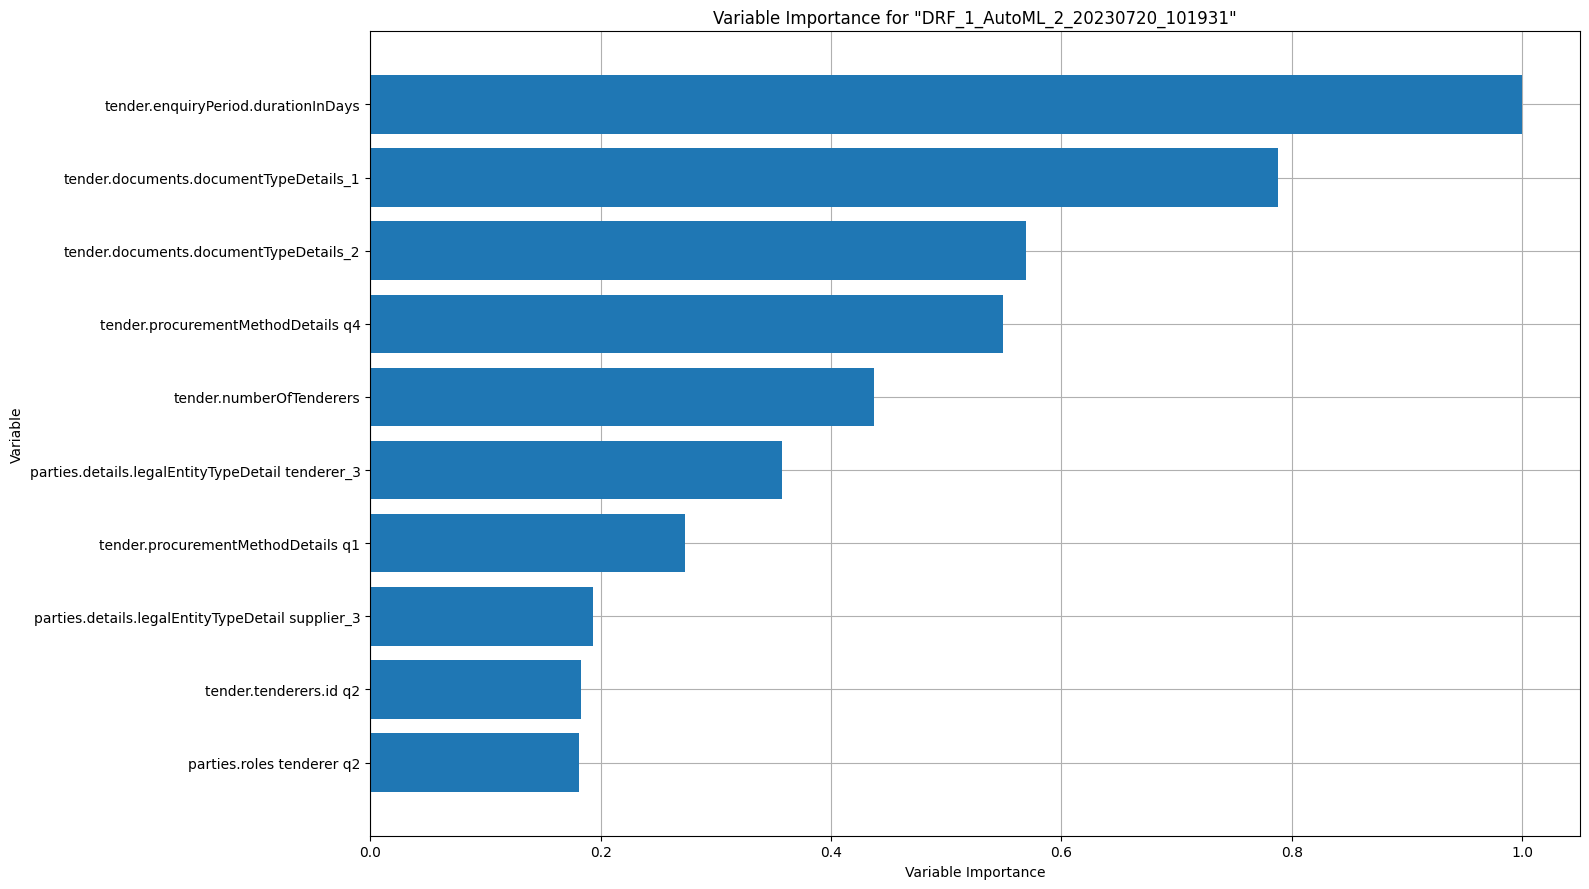

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

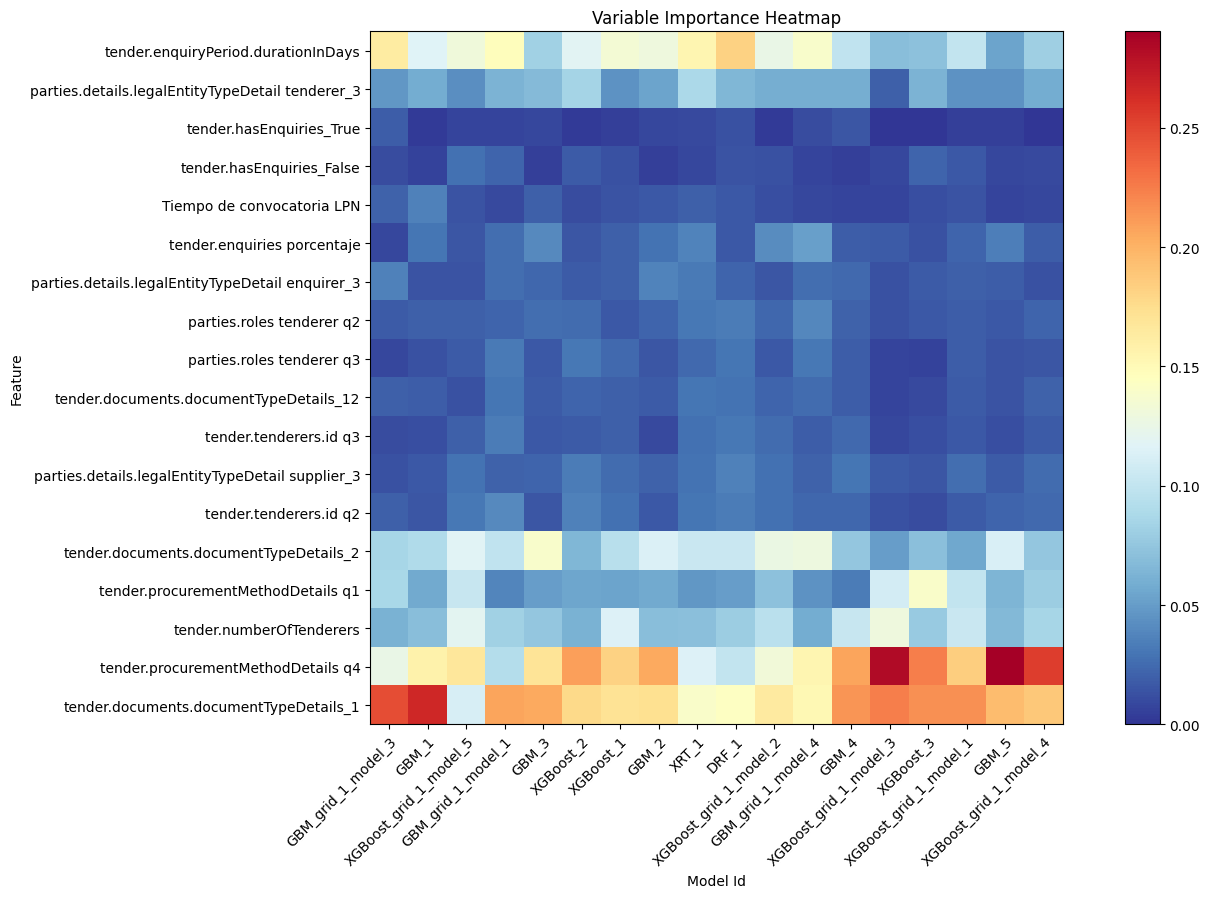

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

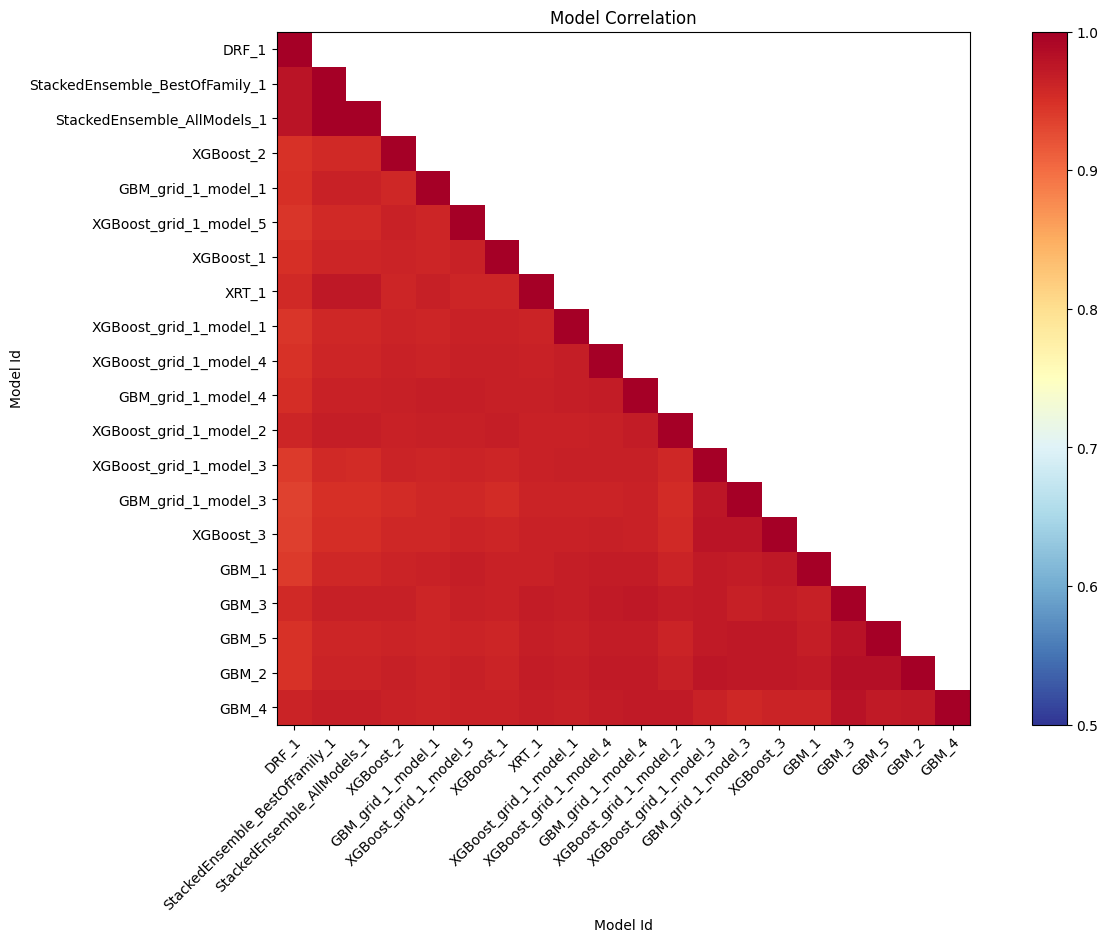

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

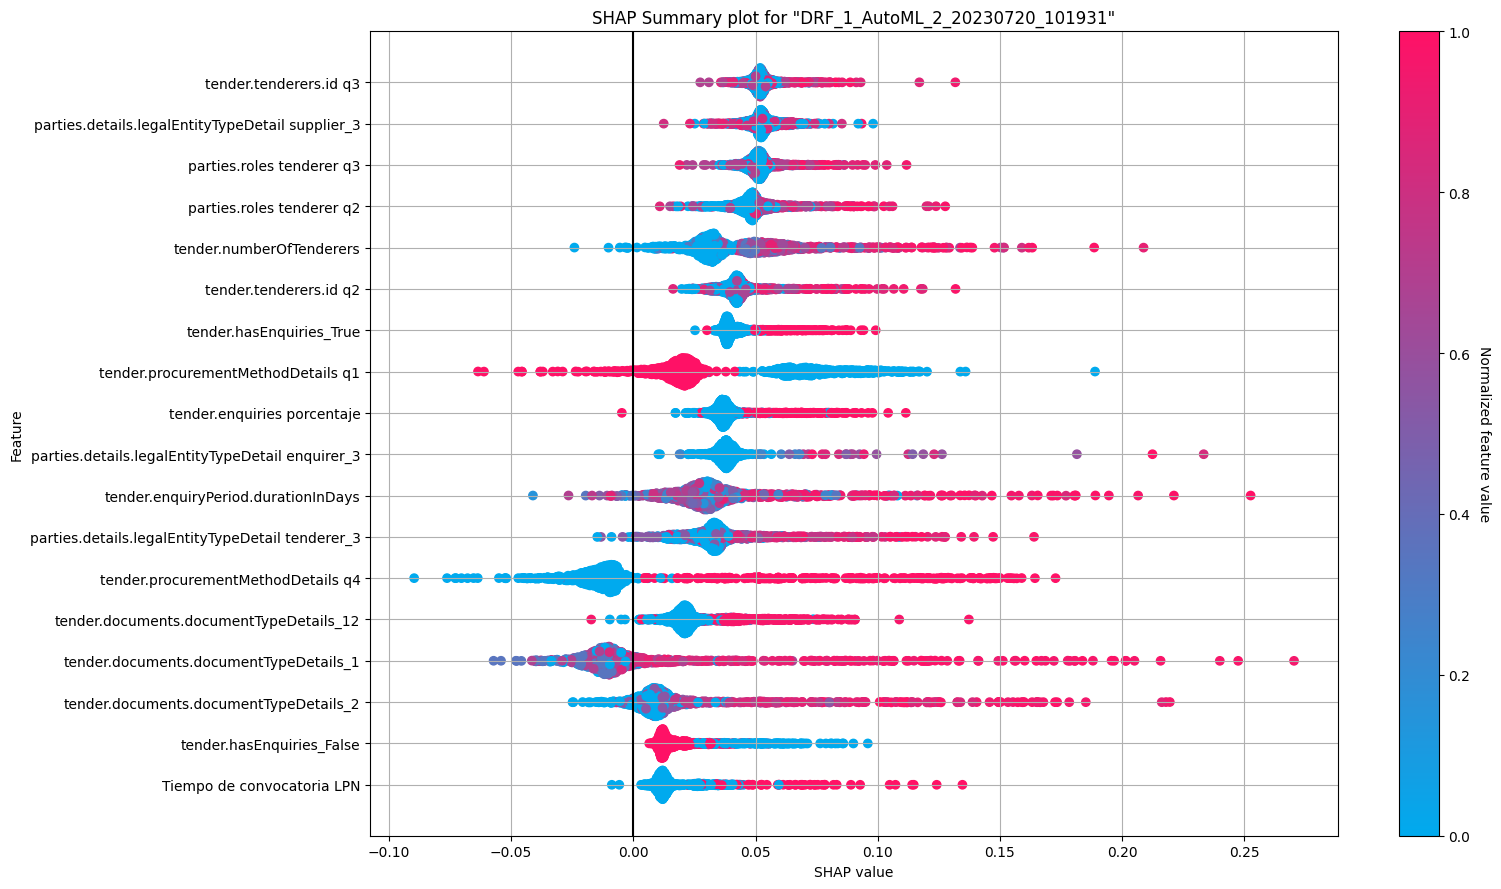

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

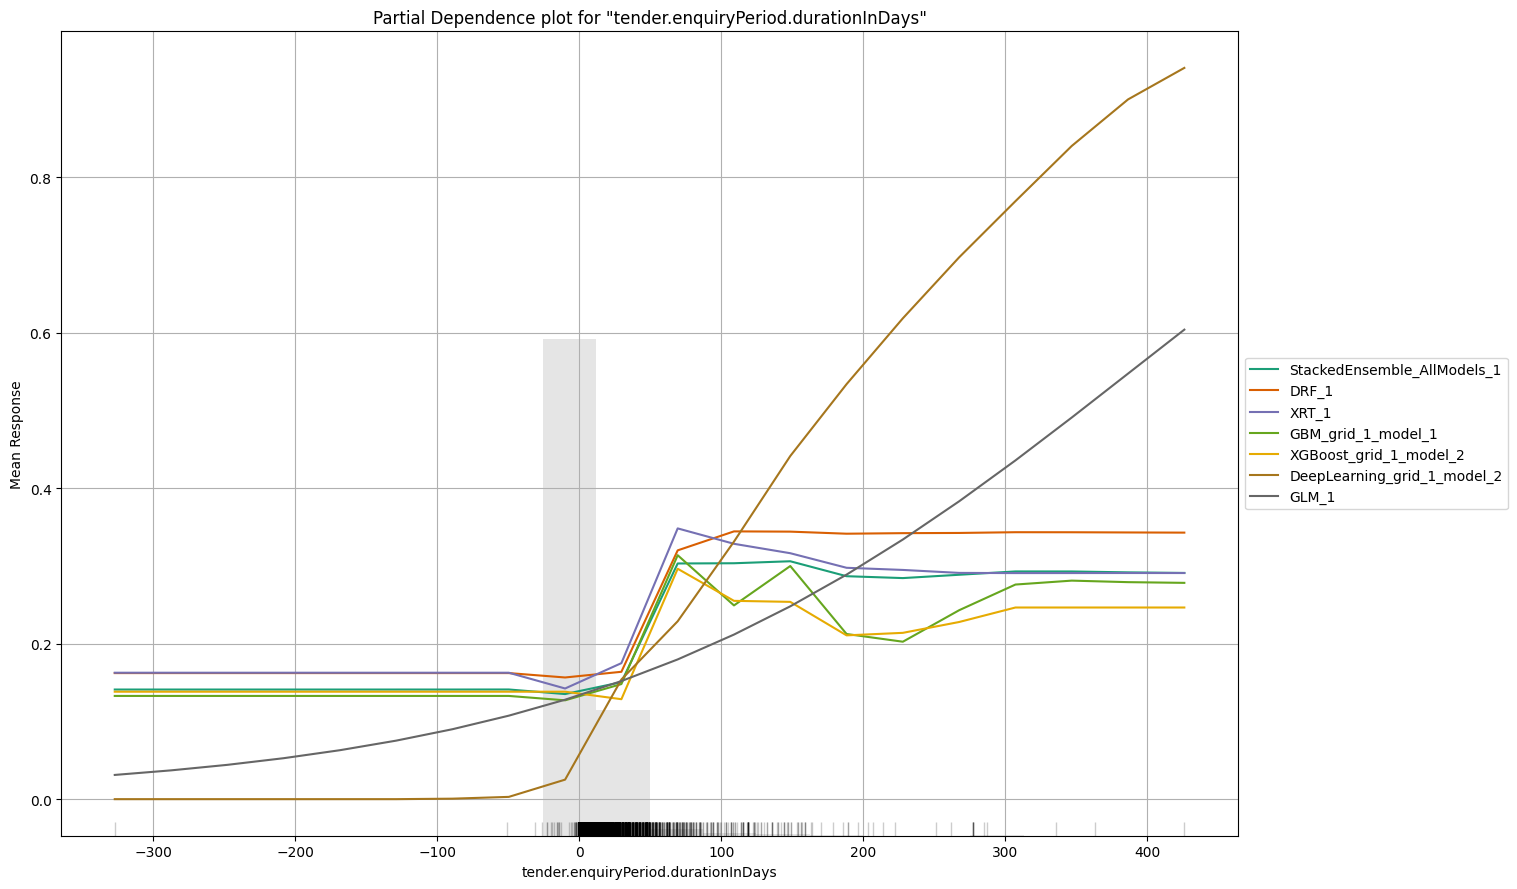

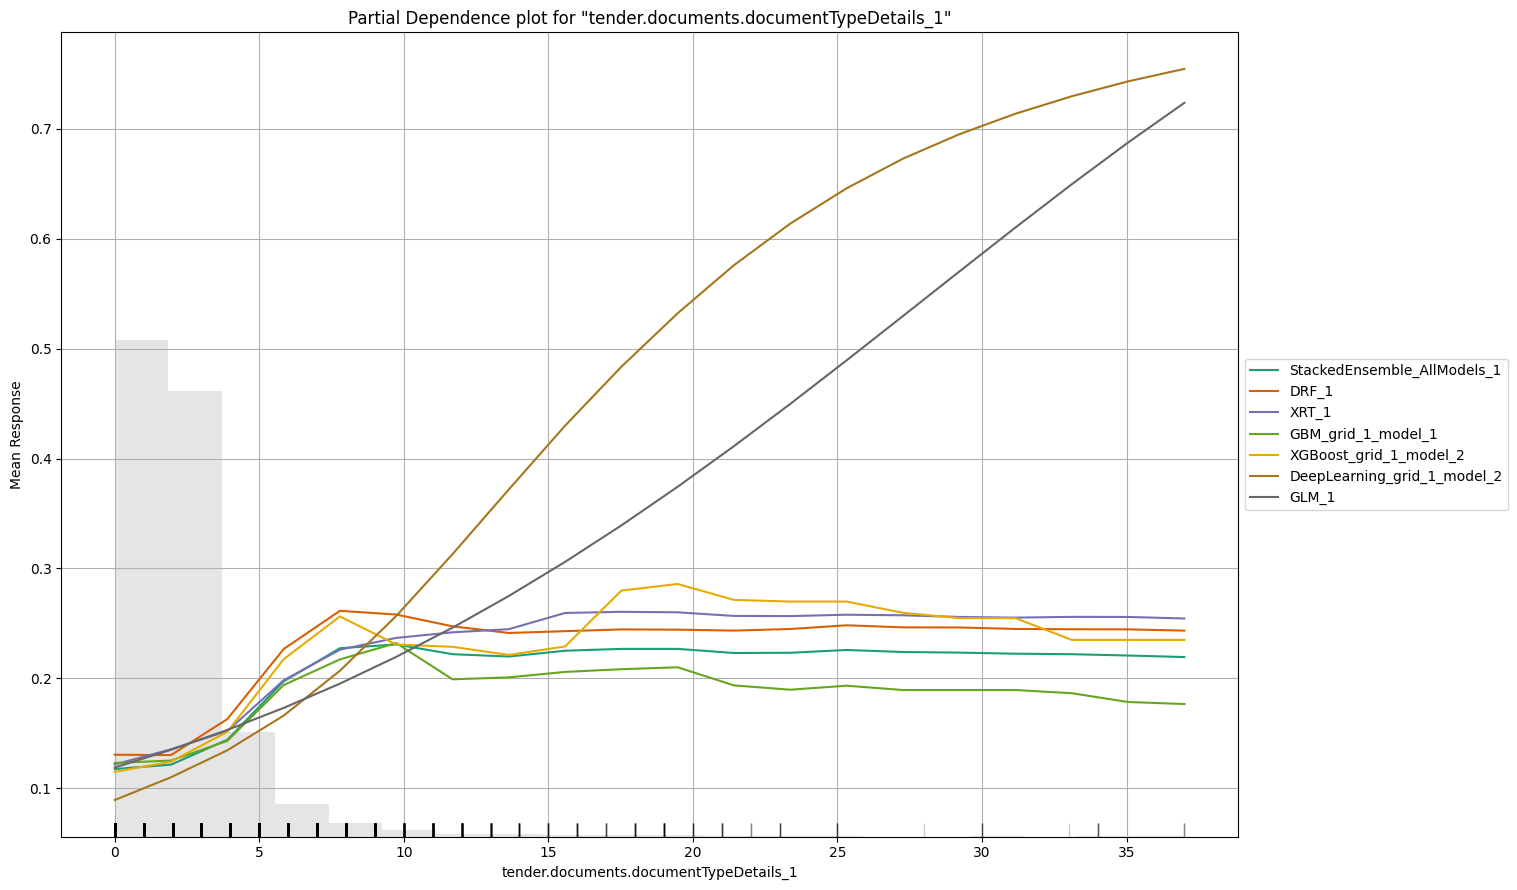

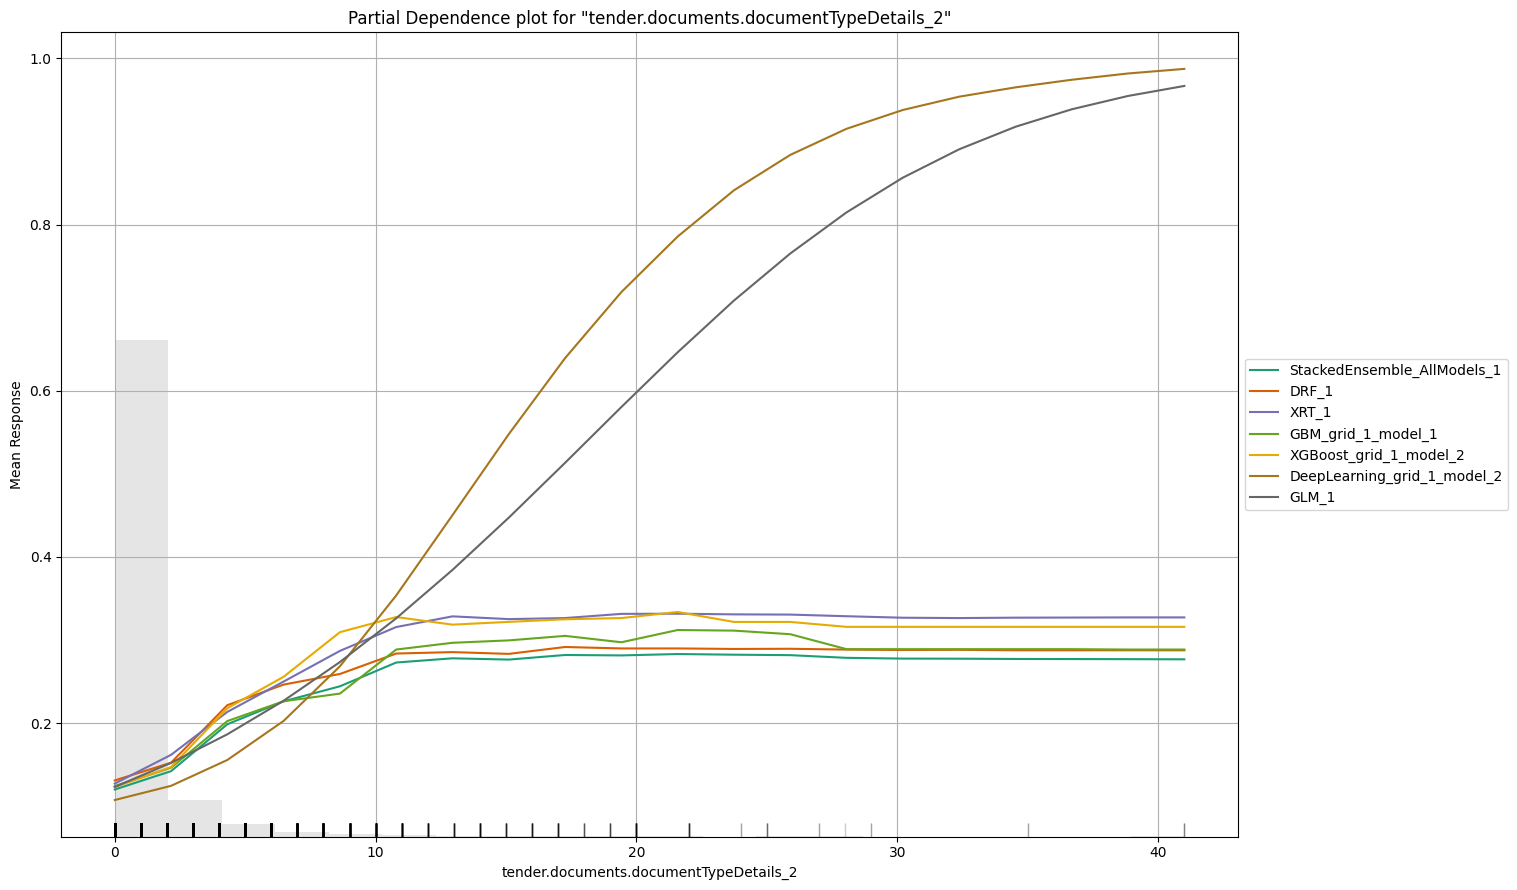

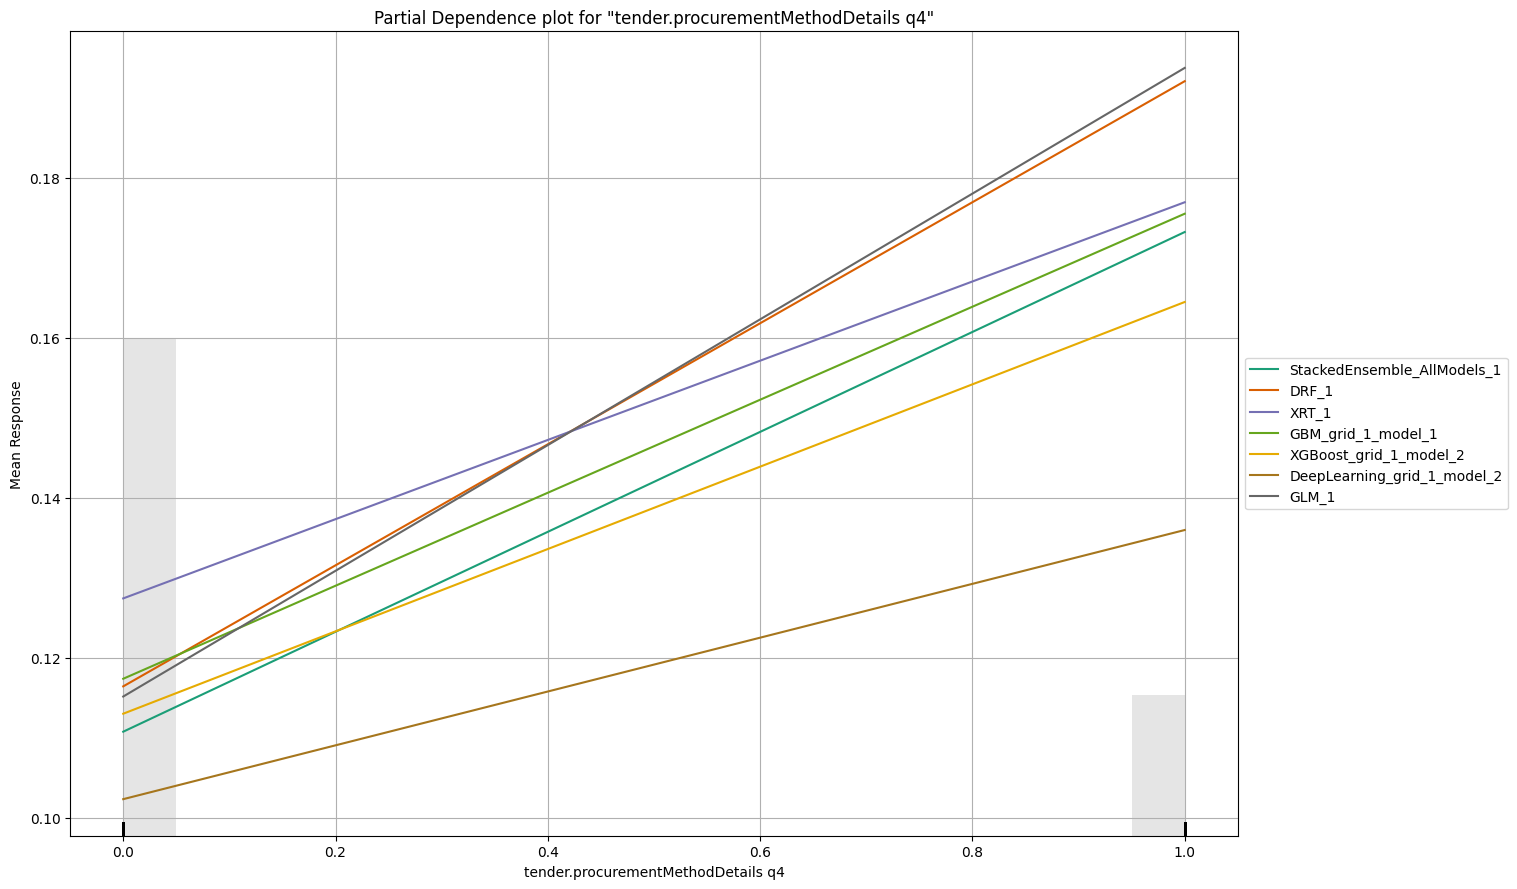

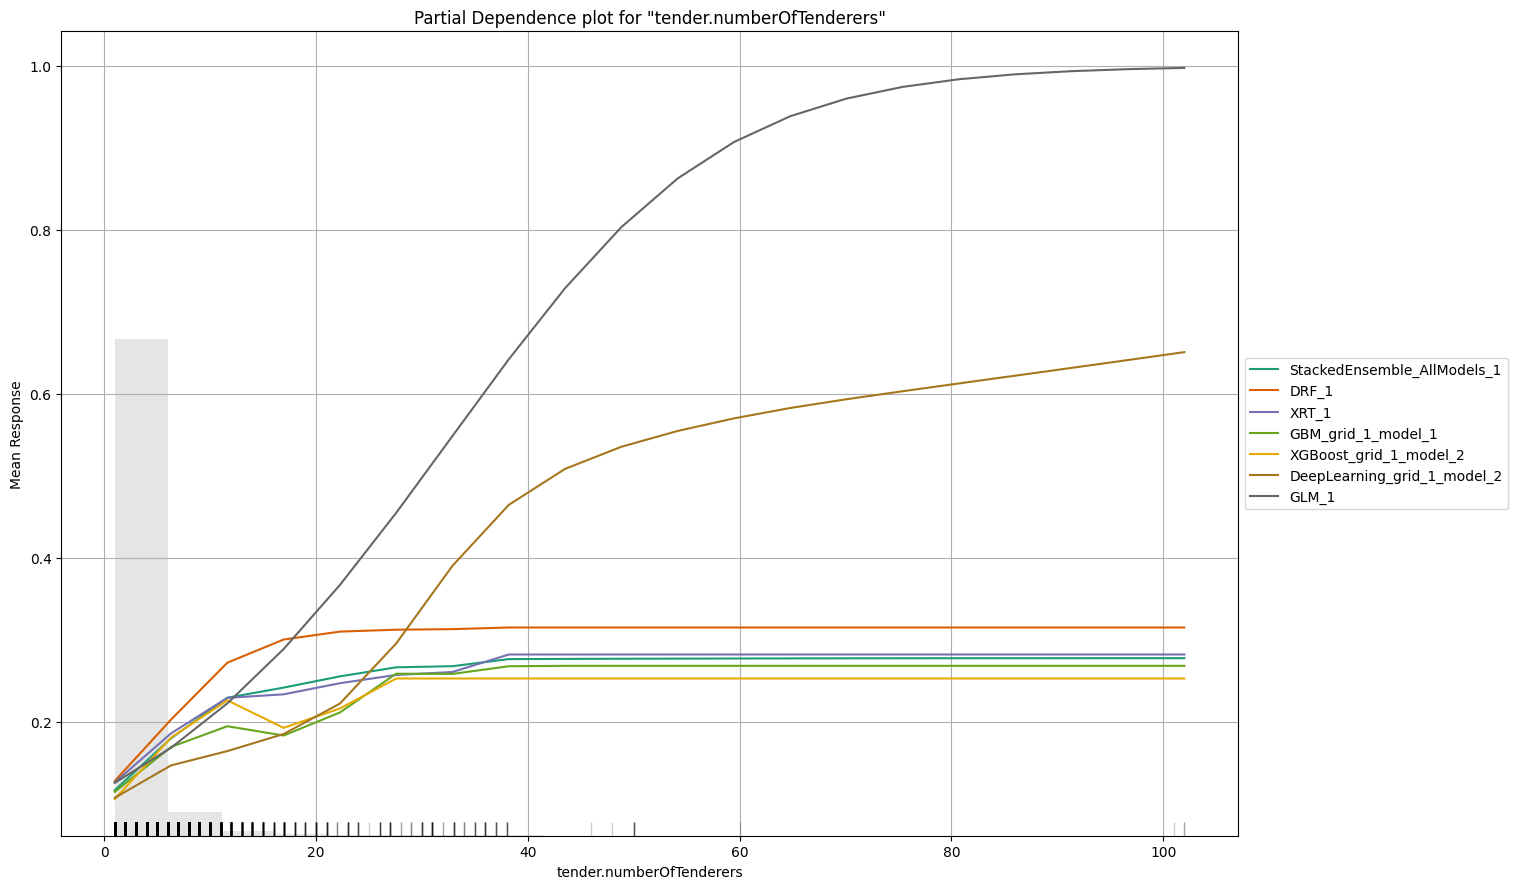

In [35]:
exa = aml.explain(test_h2o_pearson)

### Para Correlación de Kendall

In [27]:
df_kendall = df_dummizado[['tender.value.amount','tender.enquiryPeriod.durationInDays','planning.budget.amount.amount','tender.enquiries.count','awards.value.amount_pyg','tender.enquiries total','tender.enquiries respondidos','tender.enquiries porcentaje','tender.documents.documentTypeDetails_3','tender.documents.documentTypeDetails_12','parties.details.legalEntityTypeDetail enquirer_3','tender.procurementMethodDetails q1','tender.procurementMethodDetails q4','Tiempo de convocatoria LPN','tender.hasEnquiries_False','tender.hasEnquiries_True','has_complaint']]

In [28]:
train_kendall, test_kendall = train_test_split(df_kendall, test_size=0.2, random_state=42)

In [29]:
print(len(train_kendall))
print(len(test_kendall))

58041
14511


In [30]:
train_h2o_kendall = h2o.H2OFrame.from_python(train_kendall)
test_h2o_kendall = h2o.H2OFrame.from_python(test_kendall)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [31]:
# Run AutoML for 20 base models
aml = H2OAutoML(max_models=25, seed=1)
aml.train(x=train_h2o_kendall.columns, y=y_col_name, training_frame=test_h2o_kendall)
# View the AutoML Leader
# board
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------
StackedEnsemble_BestOfFamily_1_AutoML_1_20230723_190114  0.842398   0.286722  0.593754                0.256074  0.288547  0.0832592
StackedEnsemble_AllModels_1_AutoML_1_20230723_190114     0.842355   0.286651  0.59351                 0.25807   0.288484  0.0832228
GBM_3_AutoML_1_20230723_190114                           0.838497   0.291656  0.578959                0.258782  0.291589  0.0850243
GBM_2_AutoML_1_20230723_190114                           0.838296   0.291087  0.578346                0.260886  0.290859  0.0845991
GBM_5_AutoML_1_20230723_190114                           0.838208   0.291567  0.580206                0.2585    0.291333  0.0848749
GBM_grid_1_AutoML_1_20230723_190114_model_3              0.837744   0.291882  0.577063                0.257903  0.291582  0.0850198
XRT_1_AutoML_1_20230723_190114                           0.837521   0.290193  0.583491                0.259768  0.290284  0.0842646
GBM_1_AutoML_1_20230723_190114                           0.837517   0.291058  0.58117                 0.25418   0.291182  0.0847872
GBM_4_AutoML_1_20230723_190114                           0.83665    0.291749  0.582031                0.257434  0.291343  0.0848805
XGBoost_3_AutoML_1_20230723_190114                       0.836337   0.292881  0.577334                0.256178  0.291813  0.0851551
GBM_grid_1_AutoML_1_20230723_190114_model_2              0.835287   0.292034  0.57689                 0.251622  0.291195  0.0847946
XGBoost_grid_1_AutoML_1_20230723_190114_model_3          0.834209   0.294379  0.575597                0.263582  0.292458  0.0855317
GBM_grid_1_AutoML_1_20230723_190114_model_4              0.833867   0.292494  0.580068                0.251412  0.291299  0.084855
GBM_grid_1_AutoML_1_20230723_190114_model_1              0.832567   0.293432  0.575759                0.263849  0.291766  0.0851276
XGBoost_grid_1_AutoML_1_20230723_190114_model_2          0.832485   0.294456  0.580824                0.25893   0.291744  0.0851146
XGBoost_grid_1_AutoML_1_20230723_190114_model_4          0.830935   0.296708  0.571805                0.266108  0.29319   0.0859602
XGBoost_1_AutoML_1_20230723_190114                       0.830677   0.297693  0.56904                 0.263915  0.293852  0.0863488
DRF_1_AutoML_1_20230723_190114                           0.830385   0.298882  0.579398                0.26493   0.292285  0.0854304
XGBoost_grid_1_AutoML_1_20230723_190114_model_5          0.829255   0.299041  0.568479                0.269889  0.294577  0.0867754
XGBoost_2_AutoML_1_20230723_190114                       0.828017   0.301387  0.565576                0.253812  0.295355  0.0872347
XGBoost_grid_1_AutoML_1_20230723_190114_model_1          0.827765   0.299452  0.566169                0.265608  0.294462  0.0867077
DeepLearning_1_AutoML_1_20230723_190114                  0.819811   0.305533  0.544601                0.254468  0.297448  0.0884752
DeepLearning_grid_2_AutoML_1_20230723_190114_model_1     0.817903   0.317966  0.540059                0.246975  0.298829  0.0892986
DeepLearning_grid_1_AutoML_1_20230723_190114_model_2     0.817324   0.330244  0.539463                0.25993   0.299525  0.0897152
GLM_1_AutoML_1_20230723_190114                           0.816813   0.307616  0.538719                0.26478   0.298321  0.0889954
DeepLearning_grid_1_AutoML_1_20230723_190114_model_1     0.813373   0.341056  0.54709                 0.264267  0.301234  0.0907418
DeepLearning_grid_3_AutoML_1_20230723_190114_model_1     0.813339   0.324291  0.535079                0.256548  0.300371  0.090223
[27 rows x 7 columns]

In [32]:
aml.leader

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20230723_190114


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       6/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DRF base models (used / total)           2/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.05861865429789069
RMSE: 0.2421128957694957
LogLoss: 0.20912034161581028
AUC: 0.9426117945619792
AUCPR: 0.8118827598577779
Gini: 0.8852235891239584
Null degrees of freedom: 10039
Residual degrees of freedom: 10033
Null deviance: 8144.01768719672
Residual deviance: 4199.1364596454705
AIC: 4213.1364596454705

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37782701346896186
       False    True    Error    Rate
-----  -------  ------  -------  ---------------
False  8492     139     0.0161   (139.0/8631.0)
True   540      869     0.3833   (540.0/1409.0)
Total  9032     1008    0.0676   (679.0/10040.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.377827     0.719073  157
max f2                       0.180462     0.735313  240
max f0point5                 0.478955     0.816327  127
max accuracy                 0.396611     0.932869  151
max precision                0.989127     1         0
max recall                   0.0438239    1         349
max specificity              0.989127     1         0
max absolute_mcc             0.396611     0.695196  151
max min_per_class_accuracy   0.13789      0.8467    264
max mean_per_class_accuracy  0.152129     0.84856   255
max tns                      0.989127     8631      0
max fns                      0.989127     1405      0
max fps                      0.00219883   8631      399
max tps                      0.0438239    1409      349
max tnr                      0.989127     1         0
max fnr                      0.989127     0.997161  0
max fpr                      0.00219883   1         399
max tpr                      0.0438239    1         349

Gains/Lift Table: Avg response rate: 14.03 %, avg score: 14.01 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100598                   0.937586           7.12562     7.12562            1                0.960825   1                           0.960825            0.071682        0.071682                   612.562   612.562            0.071682
2        0.0200199                   0.876089           7.12562     7.12562            1                0.907579   1                           0.934334            0.0709723       0.142654                   612.562   612.562            0.142654
3        0.0300797                   0.807101           7.05507     7.10203            0.990099         0.842605   0.996689                    0.903657            0.0709723       0.213627                   605.507   610.20

In [33]:
preds_kendall = aml.predict(test_h2o_kendall)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [34]:
preds_kendall['predict'] == 'True'
preds_kendall_True = preds_kendall[(preds_kendall['predict'] == 'True')]
preds_kendall_True.head(50)

predict        False      True
---------  ---------  --------
True       0.531225   0.468775
True       0.513817   0.486183
True       0.596497   0.403503
True       0.397217   0.602783
True       0.182074   0.817926
True       0.590672   0.409328
True       0.683081   0.316919
True       0.38733    0.61267
True       0.213462   0.786538
True       0.411507   0.588493
True       0.077987   0.922013
True       0.522654   0.477346
True       0.704244   0.295756
True       0.700118   0.299882
True       0.414694   0.585306
True       0.504414   0.495586
True       0.503947   0.496053
True       0.702268   0.297732
True       0.523283   0.476717
True       0.561199   0.438801
True       0.588046   0.411954
True       0.575807   0.424193
True       0.673567   0.326433
True       0.228793   0.771207
True       0.521924   0.478076
True       0.622648   0.377352
True       0.701773   0.298227
True       0.417958   0.582042
True       0.467441   0.532559
True       0.403153   0.596847
True       0.112536   0.887464
True       0.304432   0.695568
True       0.70963    0.29037
True       0.0427436  0.957256
True       0.544992   0.455008
True       0.63134    0.36866
True       0.663107   0.336893
True       0.3726     0.6274
True       0.0869411  0.913059
True       0.538485   0.461515
True       0.712312   0.287688
True       0.517684   0.482316
True       0.223635   0.776365
True       0.689698   0.310302
True       0.5475     0.4525
True       0.372698   0.627302
True       0.713419   0.286581
True       0.139477   0.860523
True       0.712798   0.287202
True       0.641335   0.358665
[50 rows x 3 columns]

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
DRF_1_AutoML_1_20230723_190114                           0.985125   0.14271   0.944533               0.0876445  0.190967  0.0364685                2055                   0.014213  DRF
XRT_1_AutoML_1_20230723_190114                           0.945344   0.198813  0.83293                0.181519   0.234677  0.0550735                1414                   0.012499  DRF
StackedEnsemble_AllModels_1_AutoML_1_20230723_190114     0.941197   0.210723  0.809282               0.189278   0.243109  0.0591018                7621                   0.040339  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20230723_190114  0.94117    0.211013  0.807989               0.200697   0.243435  0.0592607                4395                   0.017343  StackedEnsemble
GBM_grid_1_AutoML_1_20230723_190114_model_1              0.933448   0.217256  0.786643               0.194302   0.247511  0.0612615                 785                   0.007577  GBM
XGBoost_grid_1_AutoML_1_20230723_190114_model_2          0.927266   0.212076  0.785623               0.190879   0.244233  0.0596499                1199                   0.003578  XGBoost
XGBoost_grid_1_AutoML_1_20230723_190114_model_4          0.918196   0.222781  0.758044               0.19144    0.252131  0.0635699                1086                   0.002951  XGBoost
XGBoost_2_AutoML_1_20230723_190114                       0.910169   0.226036  0.749273               0.209883   0.253048  0.0640332                 813                   0.003066  XGBoost
GBM_grid_1_AutoML_1_20230723_190114_model_4              0.909392   0.242823  0.704952               0.221606   0.266318  0.0709254                 876                   0.009322  GBM
XGBoost_1_AutoML_1_20230723_190114                       0.905623   0.235247  0.72056                0.20154    0.260326  0.0677697                1054                   0.003117  XGBoost
XGBoost_grid_1_AutoML_1_20230723_190114_model_5          0.904068   0.237518  0.714434               0.206449   0.261868  0.0685747                1466                   0.003125  XGBoost
XGBoost_grid_1_AutoML_1_20230723_190114_model_1          0.898548   0.238896  0.718036               0.218907   0.261243  0.0682478                 687                   0.005153  XGBoost
GBM_4_AutoML_1_20230723_190114                           0.897783   0.229611  0.765734               0.207024   0.250164  0.0625821                 860                   0.007451  GBM
XGBoost_grid_1_AutoML_1_20230723_190114_model_3          0.891338   0.245411  0.706291               0.221938   0.265337  0.0704036                1153                   0.001857  XGBoost
GBM_3_AutoML_1_20230723_190114                           0.88128    0.246476  0.72284                0.221768   0.26163   0.0684502                 803                   0.020126  GBM
XGBoost_3_AutoML_1_20230723_190114                       0.879621   0.255149  0.681394               0.228503   0.270679  0.0732669                 548                   0.00195   XGBoost
GBM_1_AutoML_1_20230723_190114                           0.877744   0.267904  0.636107               0.229044   0.280493  0.0786761                1724                   0.00763   GBM
GBM_2_AutoML_1_20230723_190114                           0.867459   0.258279  0.692311               0.248538   0.269125  0.0724281                 635                   0.005764  GBM
GBM_5_AutoML_1_20230723_190114                           0.864316   0.258101  0.694037               0.248504   0.268359  0.0720164                 667                   0.010076  GBM
GBM_grid_1_AutoML_1_20230723_190114_model_3              0.855621  

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_1_20230723_190114

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3768316301968443
       False    True    Error    Rate
-----  -------  ------  -------  ---------------
False  12273    208     0.0167   (208.0/12481.0)
True   781      1249    0.3847   (781.0/2030.0)
Total  13054    1457    0.0682   (989.0/14511.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

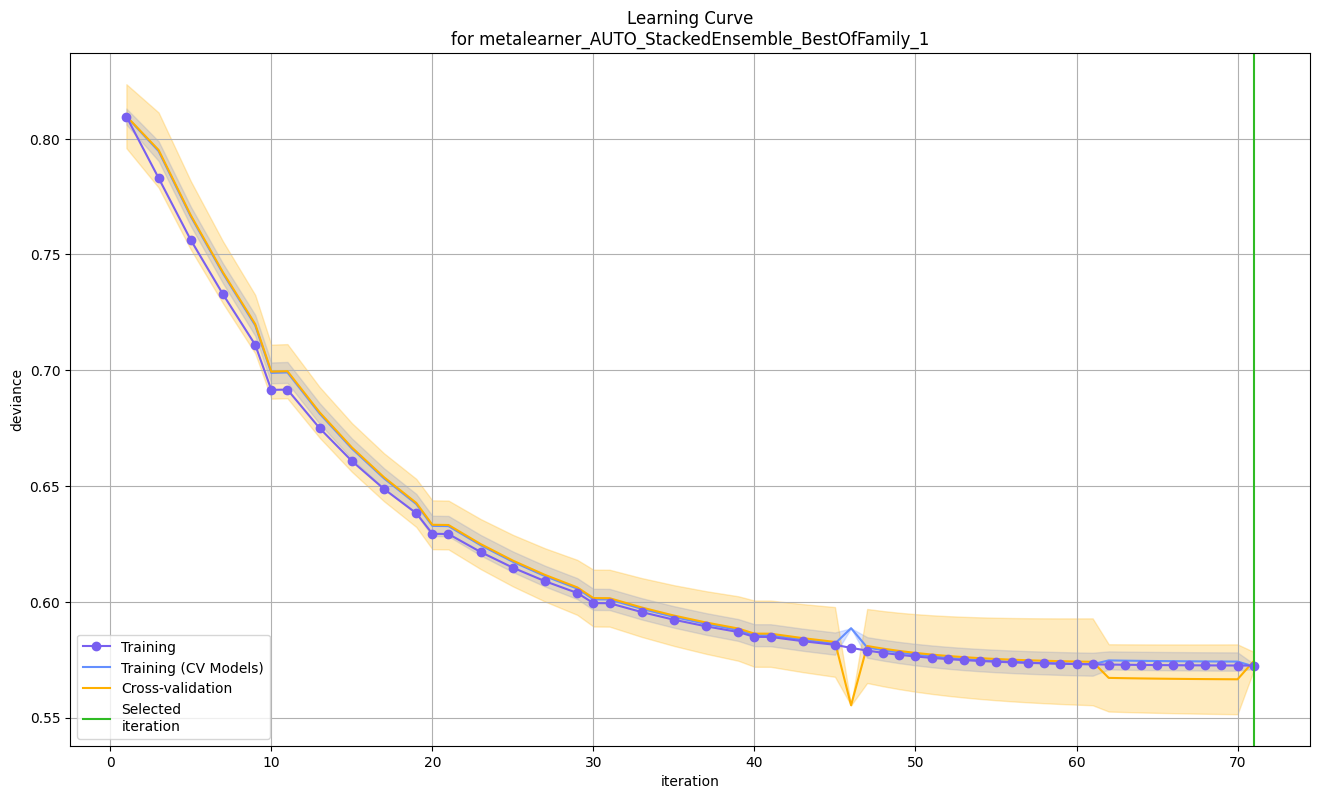

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

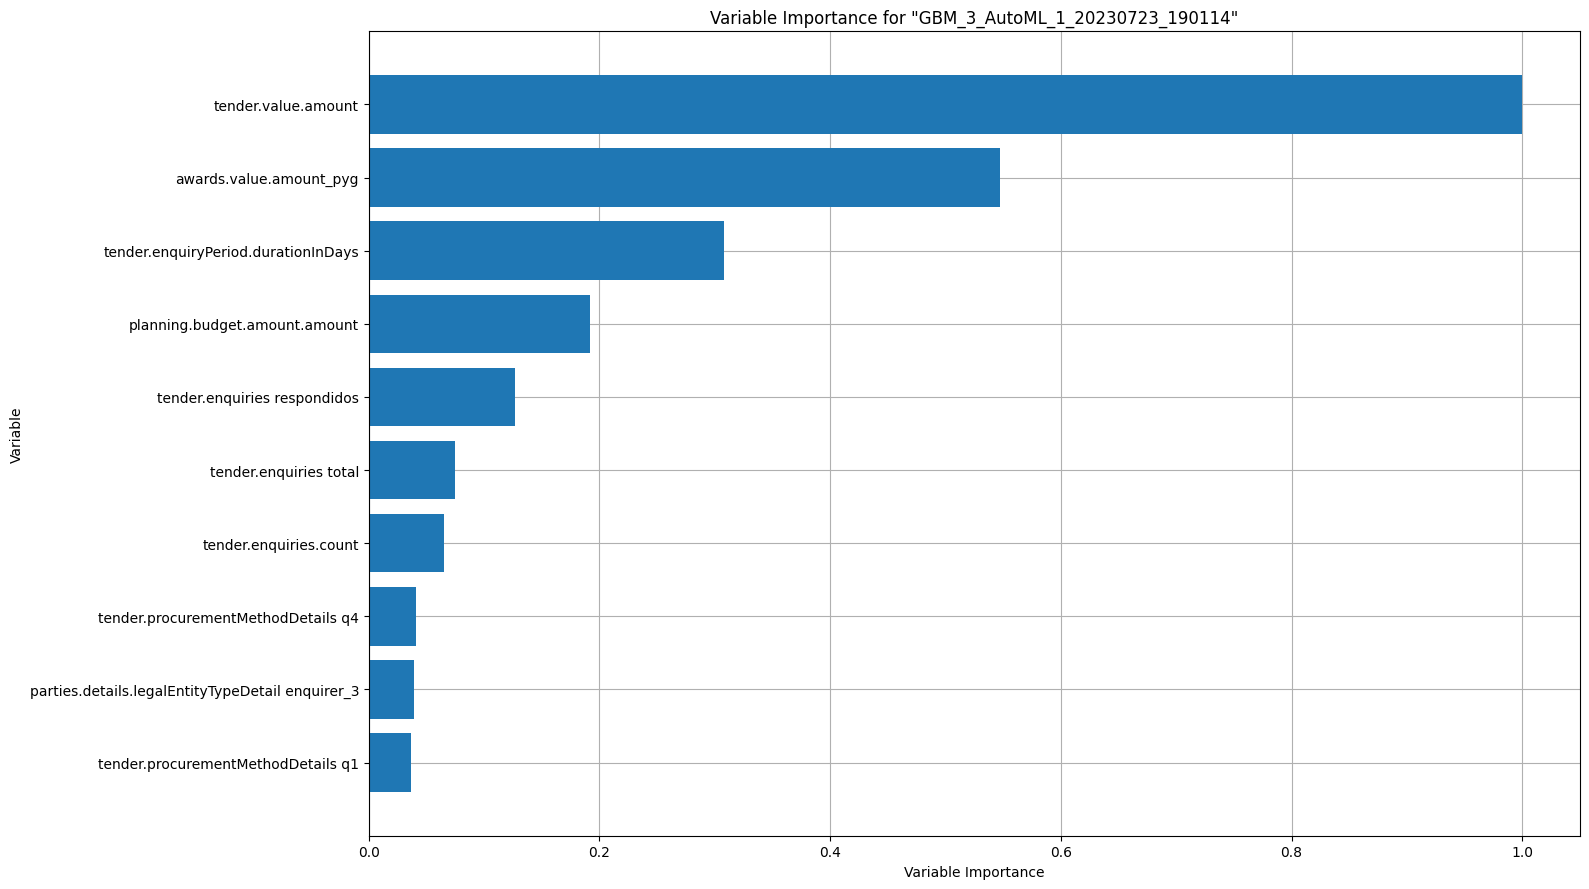

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

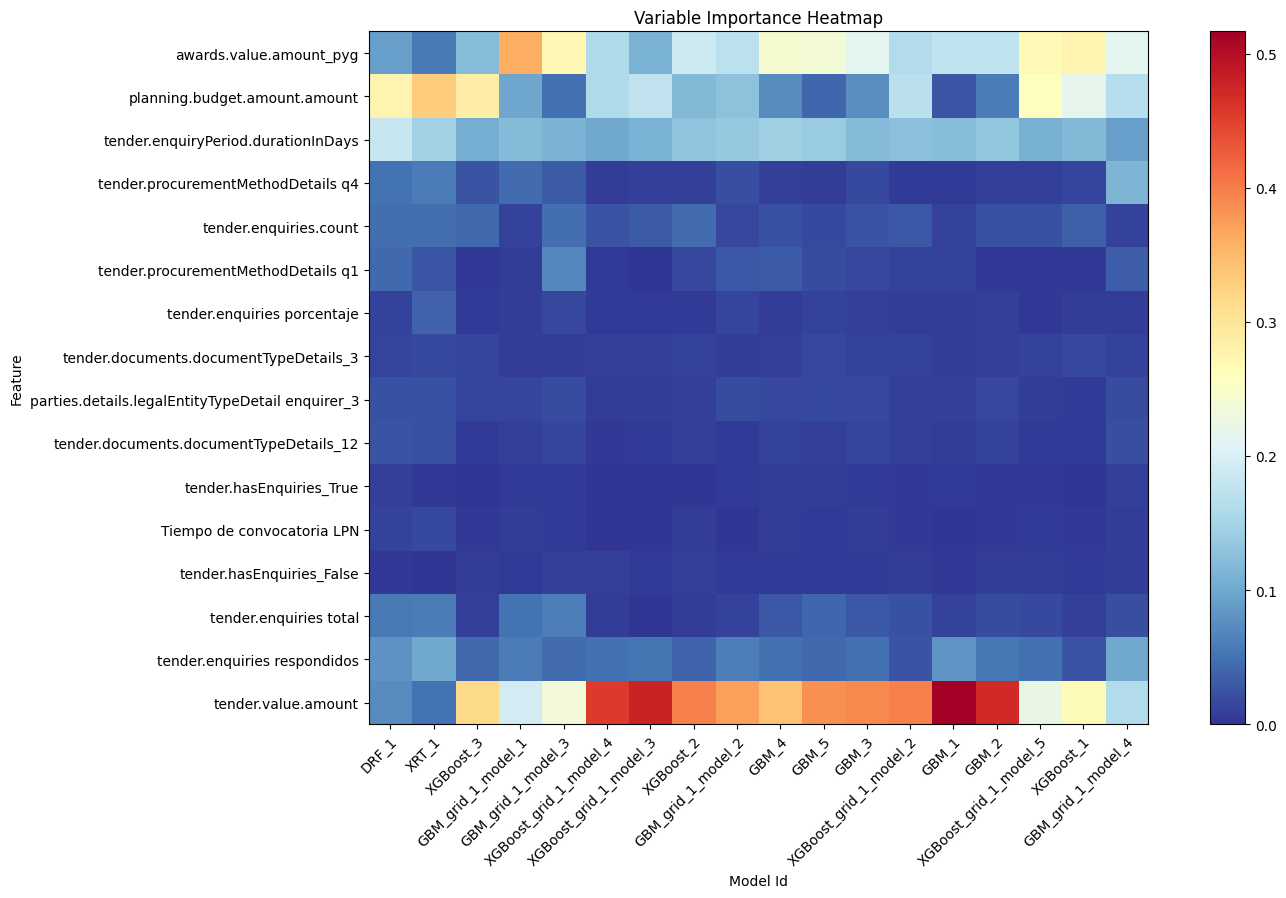

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

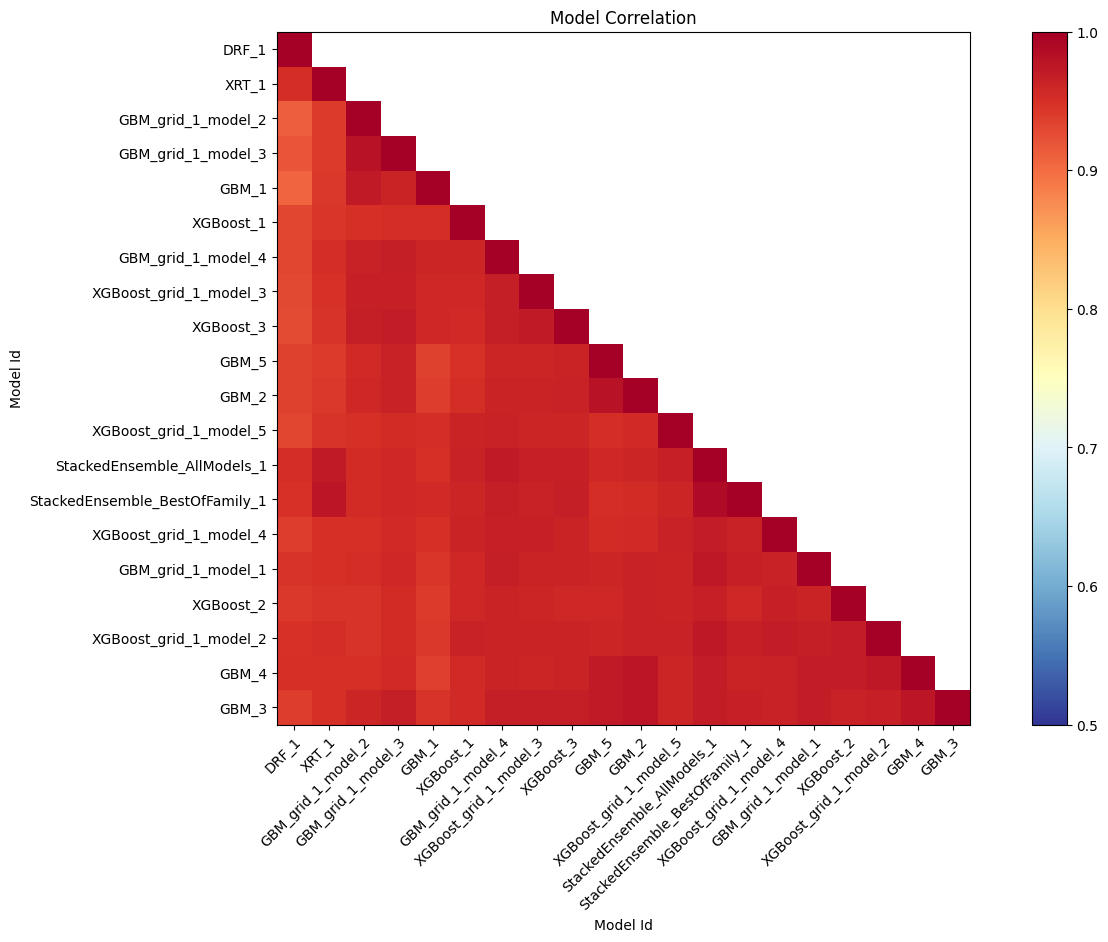

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

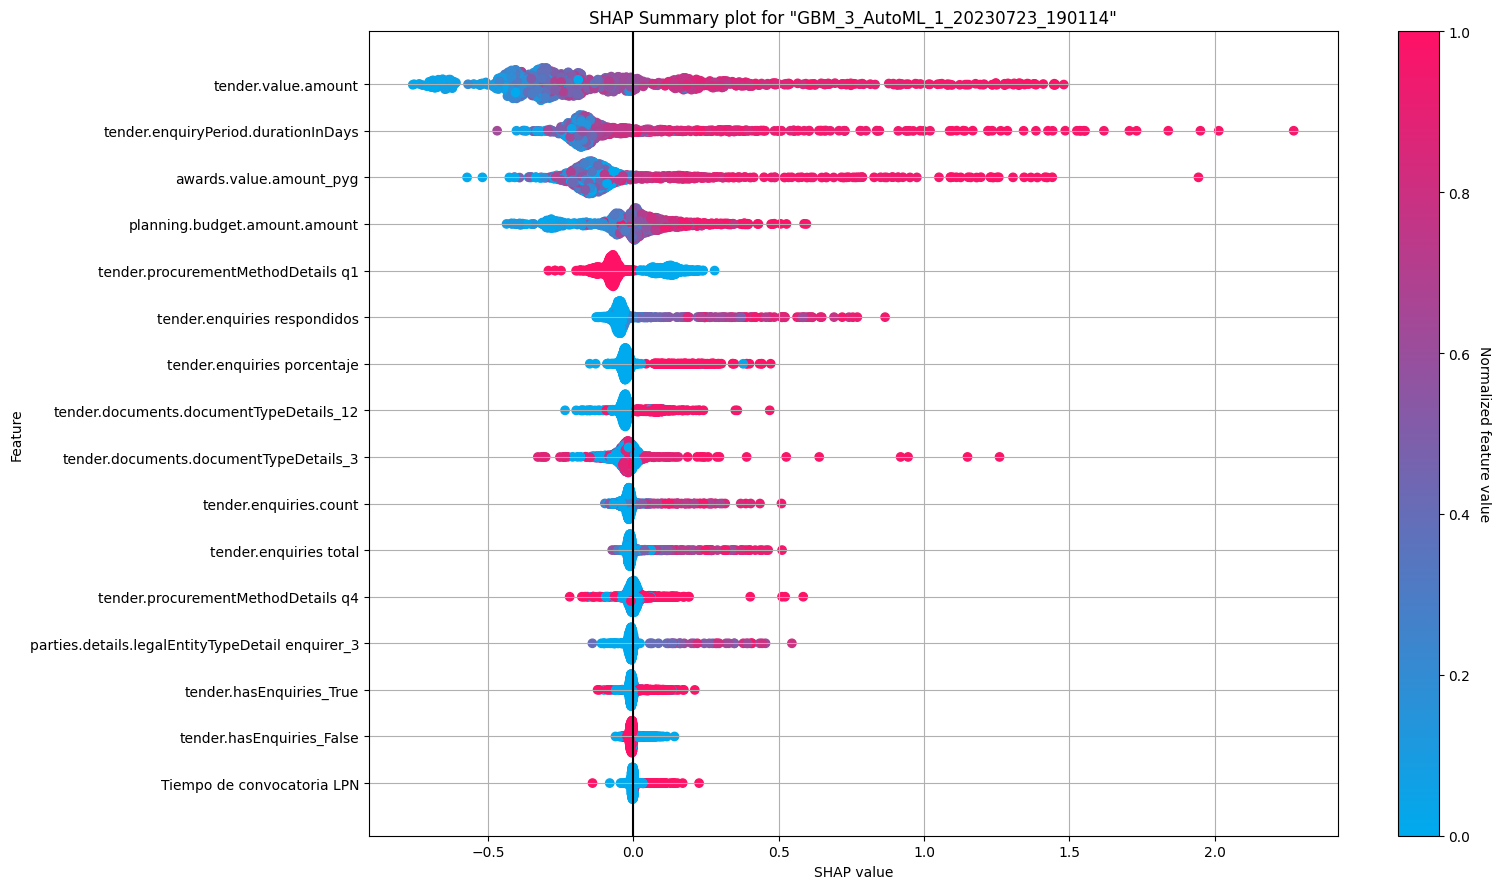

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

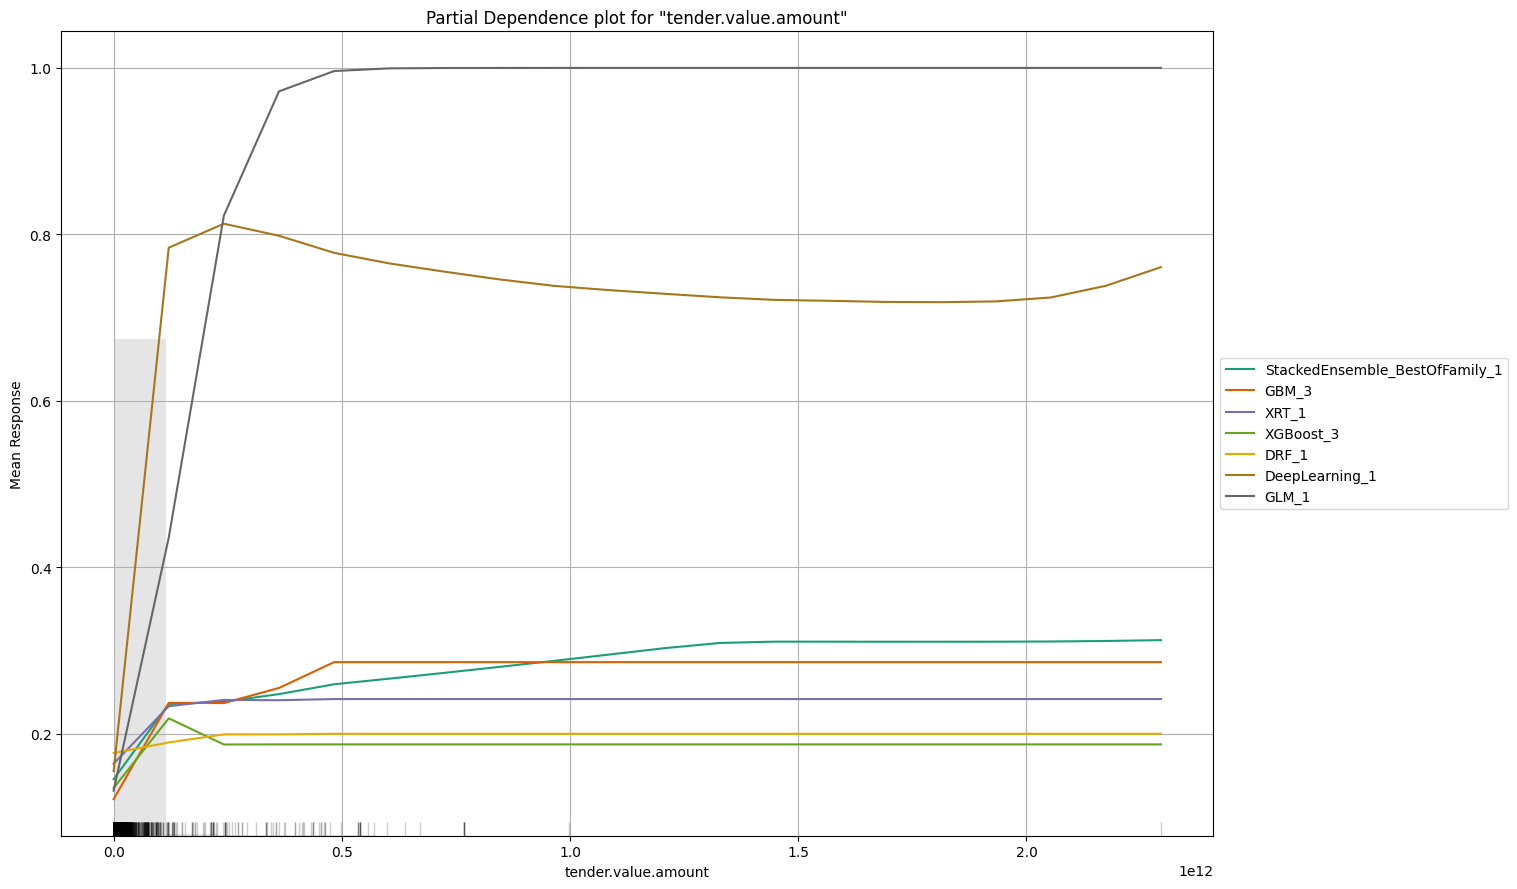

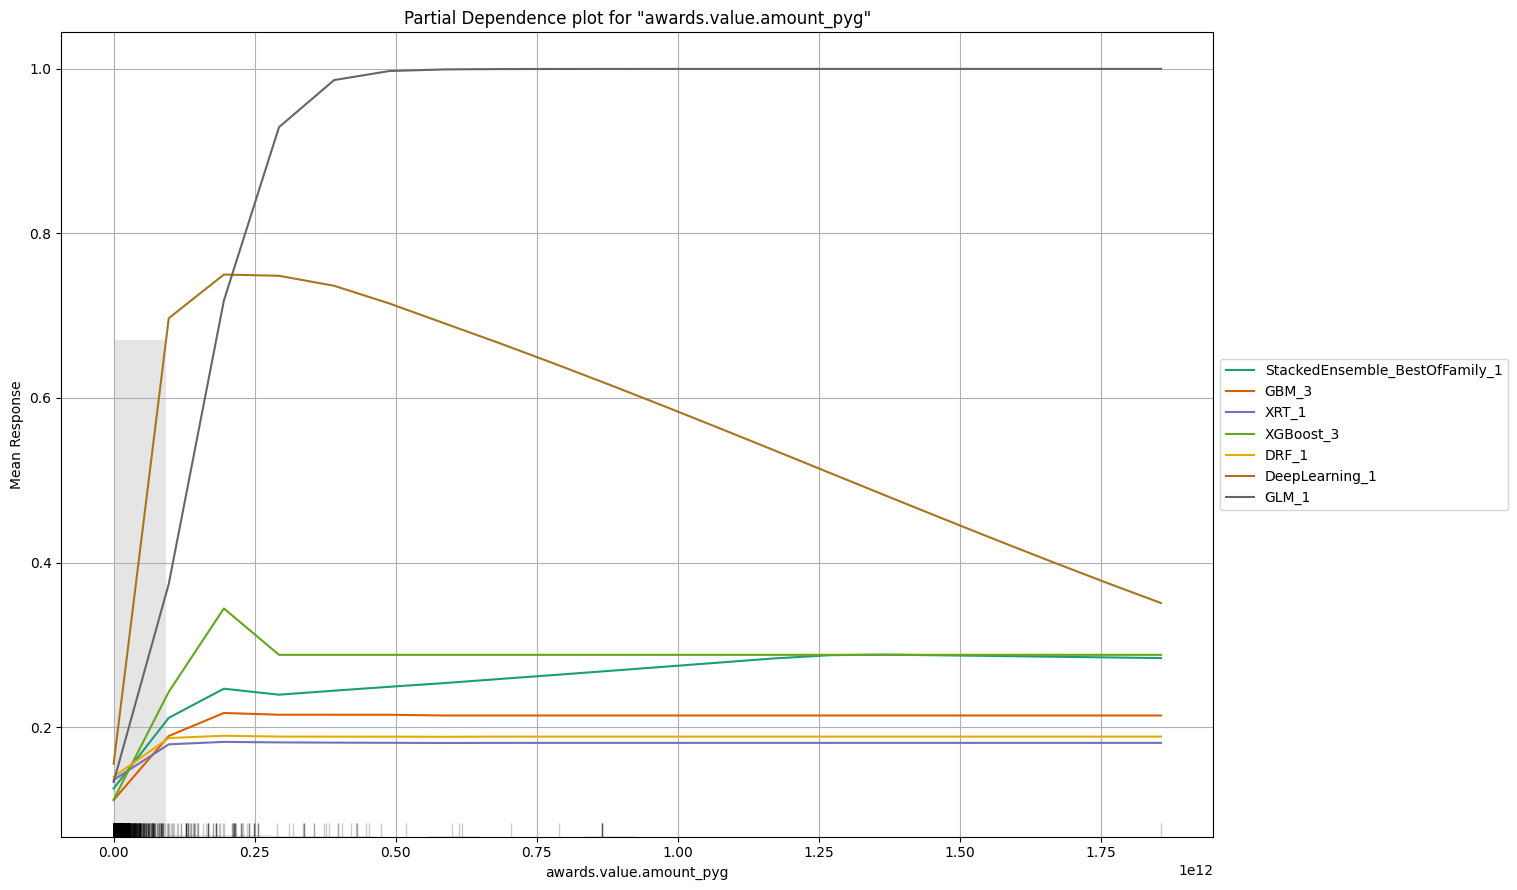

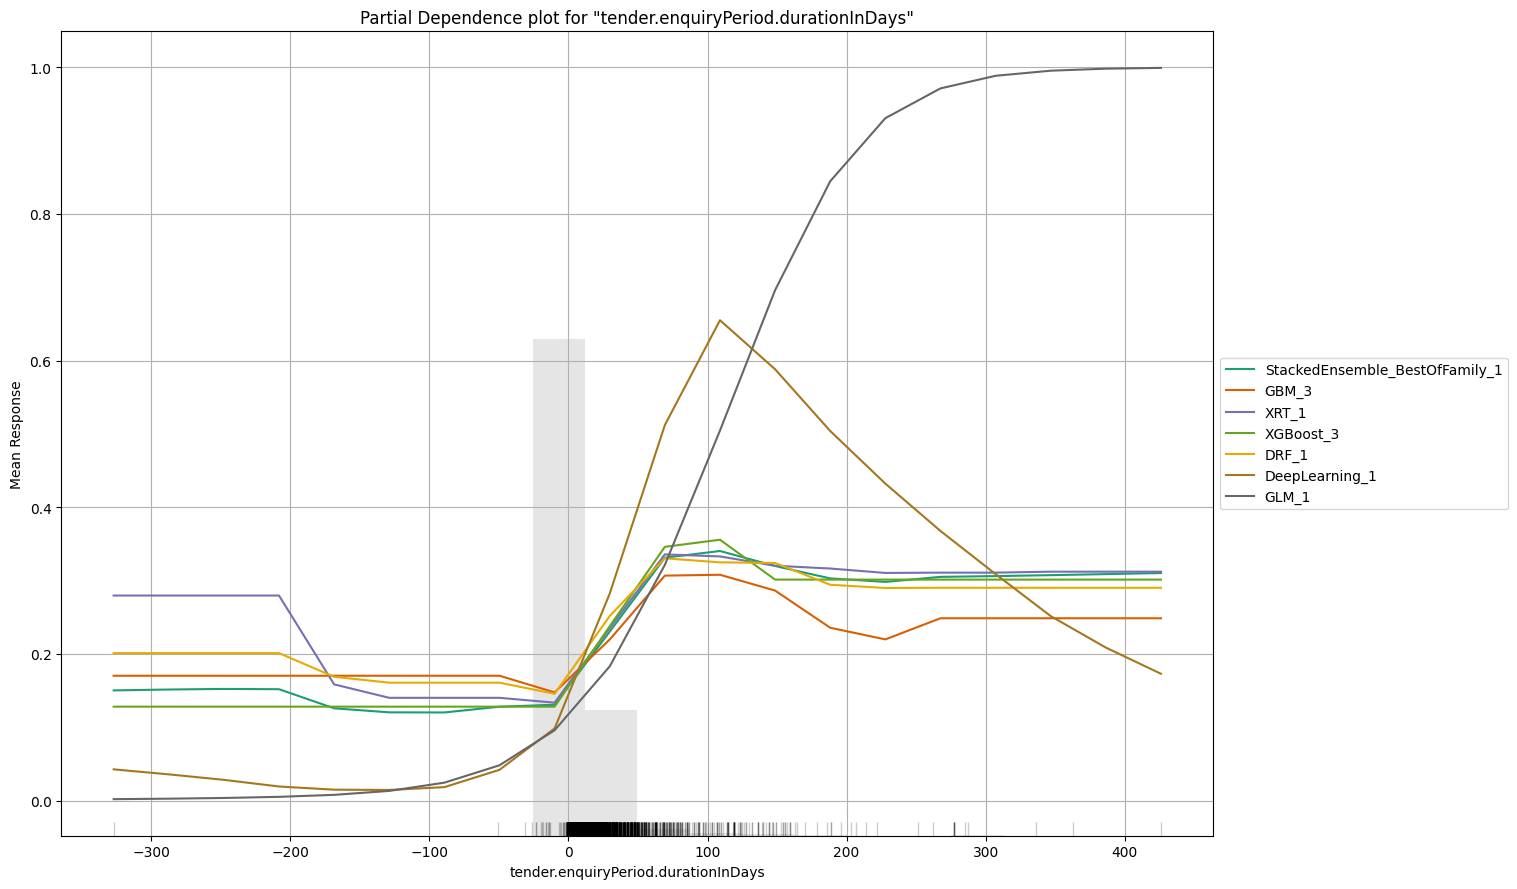

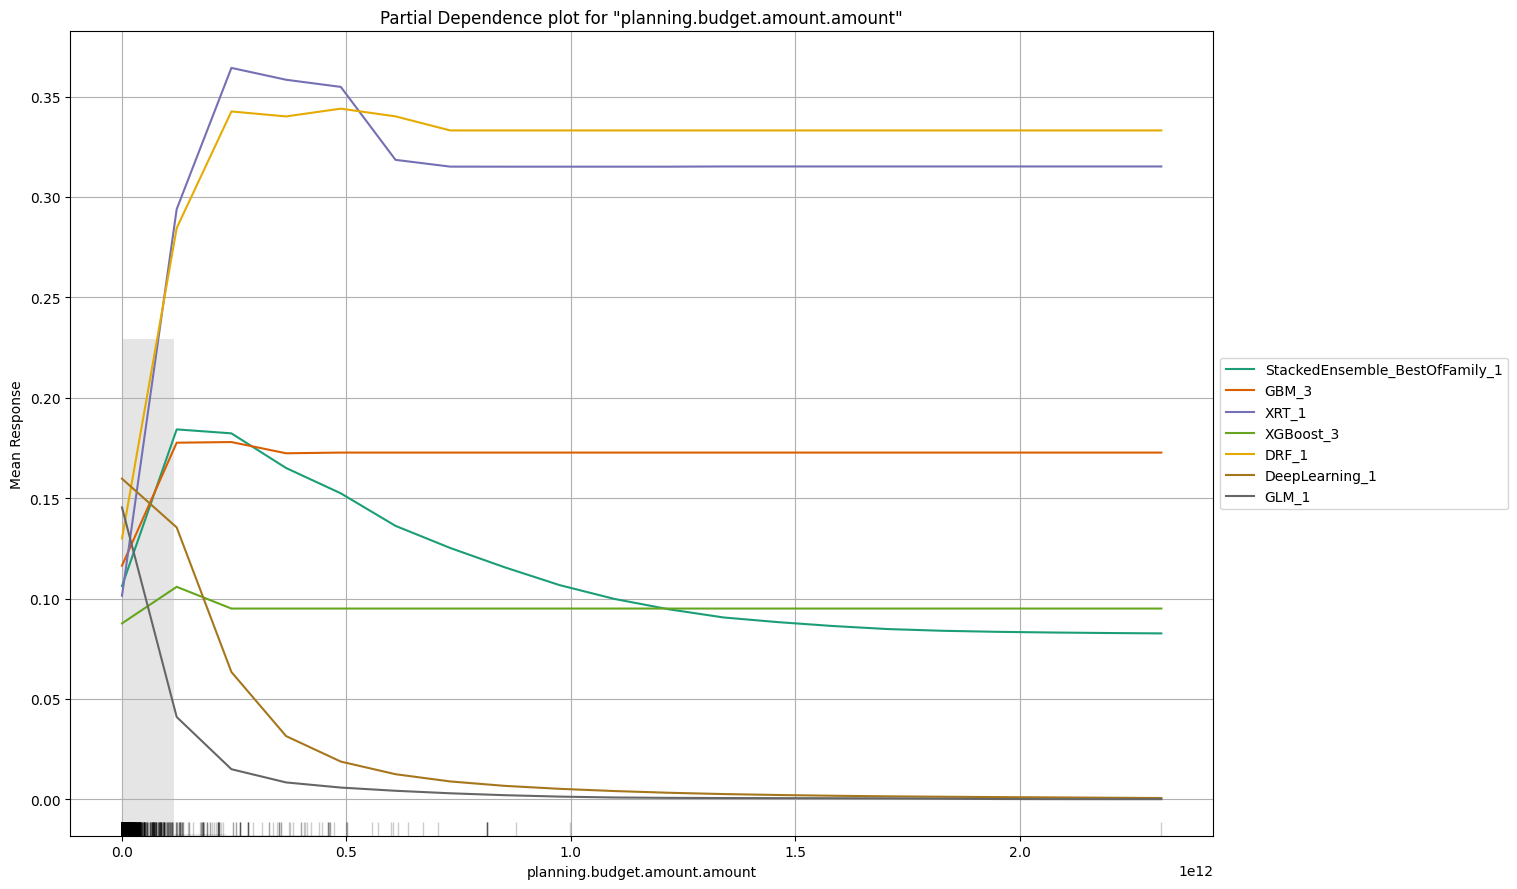

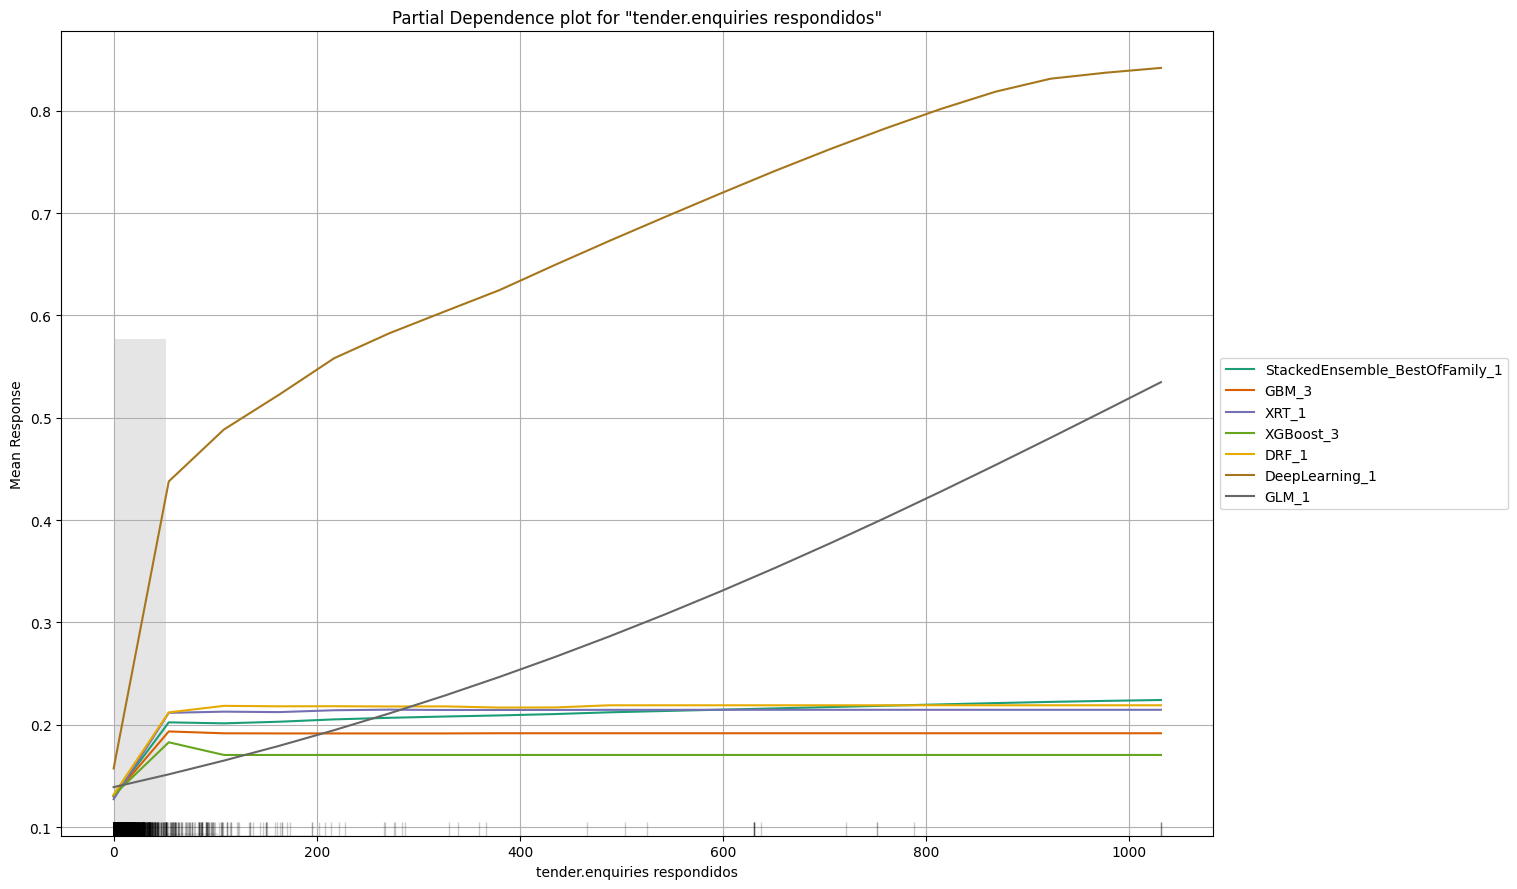

In [35]:
exa = aml.explain(test_h2o_kendall)

### Para Correlación de Spearman

In [36]:
df_spearman = df_dummizado[['tender.value.amount','tender.enquiryPeriod.durationInDays','planning.budget.amount.amount','tender.enquiries.count','contracts.value.amount_pyg','awards.value.amount_pyg','tender.enquiries total','tender.enquiries respondidos','tender.enquiries porcentaje','tender.documents.documentTypeDetails_1','tender.documents.documentTypeDetails_3','tender.documents.documentTypeDetails_12','parties.details.legalEntityTypeDetail enquirer_3','parties.details.legalEntityTypeDetail tenderer_3','tender.procurementMethodDetails q1','tender.procurementMethodDetails q4','Tiempo de convocatoria LPN','tender.hasEnquiries_False','tender.hasEnquiries_True','has_complaint']]

In [37]:
train_spearman, test_spearman = train_test_split(df_spearman, test_size=0.2, random_state=42)

In [38]:
print(len(train_spearman))
print(len(test_spearman))

58041
14511


In [39]:
train_h2o_spearman = h2o.H2OFrame.from_python(train_spearman)
test_h2o_spearman = h2o.H2OFrame.from_python(test_spearman)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [40]:
# Run AutoML for 20 base models
aml = H2OAutoML(max_models=25, seed=1)
aml.train(x=train_h2o_spearman.columns, y=y_col_name, training_frame=train_h2o_spearman)
# View the AutoML Leader
# board
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------
StackedEnsemble_AllModels_1_AutoML_2_20230723_192802     0.879879   0.24639   0.709183                0.22462   0.263287  0.0693201
StackedEnsemble_BestOfFamily_1_AutoML_2_20230723_192802  0.879688   0.246376  0.709717                0.221098  0.263163  0.0692546
DRF_1_AutoML_2_20230723_192802                           0.876669   0.248388  0.708763                0.230967  0.264034  0.0697137
XGBoost_grid_1_AutoML_2_20230723_192802_model_2          0.870235   0.260632  0.675446                0.235154  0.270947  0.0734122
GBM_grid_1_AutoML_2_20230723_192802_model_4              0.870085   0.263531  0.660669                0.245974  0.275241  0.0757575
GBM_grid_1_AutoML_2_20230723_192802_model_1              0.868411   0.26008   0.672548                0.231503  0.271764  0.0738555
XRT_1_AutoML_2_20230723_192802                           0.868294   0.263513  0.675282                0.240094  0.273158  0.0746155
GBM_4_AutoML_2_20230723_192802                           0.866544   0.264463  0.661656                0.249337  0.274888  0.0755632
GBM_1_AutoML_2_20230723_192802                           0.866049   0.270309  0.640442                0.24515   0.279939  0.0783658
XGBoost_grid_1_AutoML_2_20230723_192802_model_4          0.865753   0.267734  0.650306                0.243673  0.277234  0.0768587
XGBoost_2_AutoML_2_20230723_192802                       0.863977   0.270132  0.646789                0.244872  0.278505  0.0775651
XGBoost_grid_1_AutoML_2_20230723_192802_model_1          0.863816   0.269613  0.648498                0.23374   0.277818  0.0771826
XGBoost_1_AutoML_2_20230723_192802                       0.863143   0.270652  0.645945                0.240233  0.278365  0.0774873
XGBoost_grid_1_AutoML_2_20230723_192802_model_3          0.862627   0.271696  0.638889                0.250874  0.280068  0.0784379
GBM_3_AutoML_2_20230723_192802                           0.861897   0.269265  0.64968                 0.246627  0.27787   0.0772117
XGBoost_grid_1_AutoML_2_20230723_192802_model_5          0.861622   0.272884  0.637543                0.245567  0.280016  0.078409
XGBoost_3_AutoML_2_20230723_192802                       0.860055   0.273915  0.63299                 0.253789  0.281507  0.079246
GBM_2_AutoML_2_20230723_192802                           0.860042   0.271791  0.642342                0.245927  0.279486  0.0781122
GBM_5_AutoML_2_20230723_192802                           0.857366   0.274079  0.637163                0.237705  0.280806  0.0788521
GBM_grid_1_AutoML_2_20230723_192802_model_3              0.855129   0.277156  0.628561                0.249968  0.282657  0.0798953
GBM_grid_1_AutoML_2_20230723_192802_model_2              0.852034   0.280261  0.620479                0.249089  0.284501  0.0809406
DeepLearning_1_AutoML_2_20230723_192802                  0.834043   0.291427  0.594183                0.254654  0.289724  0.0839401
DeepLearning_grid_1_AutoML_2_20230723_192802_model_1     0.831741   0.326845  0.591963                0.25149   0.293887  0.0863693
GLM_1_AutoML_2_20230723_192802                           0.830077   0.297057  0.580508                0.254843  0.292296  0.0854367
DeepLearning_grid_2_AutoML_2_20230723_192802_model_1     0.83007    0.301222  0.587142                0.252893  0.291238  0.0848194
DeepLearning_grid_1_AutoML_2_20230723_192802_model_2     0.829076   0.309885  0.583906                0.267745  0.29267   0.0856558
DeepLearning_grid_3_AutoML_2_20230723_192802_model_1     0.826378   0.299301  0.580925                0.257603  0.291591  0.0850255
[27 rows x 7 columns]

In [41]:
aml.leader

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_2_20230723_192802


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       3/25
# GBM base models (used / total)           1/9
# XGBoost base models (used / total)       1/8
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  0/5
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.03907501121253362
RMSE: 0.19767400236888416
LogLoss: 0.14864410293201097
AUC: 0.9757523705118534
AUCPR: 0.9227869378283694
Gini: 0.9515047410237067
Null degrees of freedom: 9975
Residual degrees of freedom: 9972
Null deviance: 8142.625716870674
Residual deviance: 2965.747141699483
AIC: 2973.747141699483

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28101824302843487
       False    True    Error    Rate
-----  -------  ------  -------  --------------
False  8428     134     0.0157   (134.0/8562.0)
True   267      1147    0.1888   (267.0/1414.0)
Total  8695     1281    0.0402   (401.0/9976.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.281018     0.851206  196
max f2                       0.210836     0.844972  221
max f0point5                 0.392231     0.913546  164
max accuracy                 0.34307      0.960906  177
max precision                0.996545     1         0
max recall                   0.0272166    1         363
max specificity              0.996545     1         0
max absolute_mcc             0.34307      0.831513  177
max min_per_class_accuracy   0.138852     0.910184  256
max mean_per_class_accuracy  0.171241     0.912566  238
max tns                      0.996545     8562      0
max fns                      0.996545     1402      0
max fps                      0.00519906   8562      399
max tps                      0.0272166    1414      363
max tnr                      0.996545     1         0
max fnr                      0.996545     0.991513  0
max fpr                      0.00519906   1         399
max tpr                      0.0272166    1         363

Gains/Lift Table: Avg response rate: 14.17 %, avg score: 13.76 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100241                   0.985669           7.05516    7.05516            1                0.991836    1                           0.991836            0.0707214       0.0707214                  605.516   605.516            0.0707214
2        0.0200481                   0.960579           7.05516    7.05516            1                0.974301    1                           0.983069            0.0707214       0.141443                   605.516   605.516            0.141443
3        0.0302727                   0.920965           7.05516    7.05516            1                0.941339    1                           0.968974            0.0721358       0.213579                   605.516   605.516    

In [42]:
preds_spearman = aml.predict(test_h2o_spearman)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [43]:
preds_spearman['predict'] == 'True'
preds_spearman_True = preds_spearman[(preds_spearman['predict'] == 'True')]
preds_spearman_True.head(50)

predict         False      True
---------  ----------  --------
True       0.242462    0.757538
True       0.549309    0.450691
True       0.403361    0.596639
True       0.0828595   0.917141
True       0.524283    0.475717
True       0.472034    0.527966
True       0.238194    0.761806
True       0.213867    0.786133
True       0.11731     0.88269
True       0.586669    0.413331
True       0.214703    0.785297
True       0.368496    0.631504
True       0.359263    0.640737
True       0.300522    0.699478
True       0.491683    0.508317
True       0.546777    0.453223
True       0.628252    0.371748
True       0.062631    0.937369
True       0.635647    0.364353
True       0.110275    0.889725
True       0.0416211   0.958379
True       0.385349    0.614651
True       0.123996    0.876004
True       0.520053    0.479947
True       0.0334985   0.966502
True       0.190477    0.809523
True       0.263353    0.736647
True       0.522487    0.477513
True       0.628982    0.371018
True       0.212758    0.787242
True       0.515845    0.484155
True       0.0241763   0.975824
True       0.523372    0.476628
True       0.332503    0.667497
True       0.508713    0.491287
True       0.00842293  0.991577
True       0.0242019   0.975798
True       0.52397     0.47603
True       0.107957    0.892043
True       0.0856682   0.914332
True       0.381541    0.618459
True       0.25318     0.74682
True       0.44227     0.55773
True       0.0151524   0.984848
True       0.0930312   0.906969
True       0.564726    0.435274
True       0.642245    0.357755
True       0.416655    0.583345
True       0.0347695   0.965231
True       0.025513    0.974487
[50 rows x 3 columns]

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_2_20230723_192802     0.879105   0.244022  0.710285                0.2211    0.261244  0.0682486               12760                   0.019702  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20230723_192802  0.878859   0.243942  0.711018                0.216573  0.261031  0.0681374                9608                   0.018981  StackedEnsemble
DRF_1_AutoML_2_20230723_192802                           0.874871   0.246711  0.709336                0.231594  0.26225   0.0687752                1804                   0.028552  DRF
XGBoost_grid_1_AutoML_2_20230723_192802_model_2          0.872699   0.25678   0.678204                0.230053  0.268462  0.0720717                8339                   0.008966  XGBoost
GBM_grid_1_AutoML_2_20230723_192802_model_4              0.871862   0.261393  0.658454                0.223765  0.27394   0.0750431                1652                   0.025143  GBM
GBM_grid_1_AutoML_2_20230723_192802_model_1              0.869685   0.258007  0.671725                0.22114   0.270333  0.0730797                1369                   0.016617  GBM
XRT_1_AutoML_2_20230723_192802                           0.867449   0.261789  0.67173                 0.245686  0.272322  0.0741591                1387                   0.015326  DRF
GBM_4_AutoML_2_20230723_192802                           0.865588   0.263183  0.659534                0.230072  0.273957  0.0750526                1368                   0.01618   GBM
XGBoost_grid_1_AutoML_2_20230723_192802_model_4          0.865179   0.265831  0.649672                0.245833  0.275592  0.075951                 5105                   0.003576  XGBoost
GBM_1_AutoML_2_20230723_192802                           0.864075   0.271008  0.631952                0.237904  0.280315  0.0785768                1368                   0.017246  GBM
XGBoost_2_AutoML_2_20230723_192802                       0.863643   0.267869  0.646899                0.247314  0.276543  0.0764758                4480                   0.003896  XGBoost
XGBoost_grid_1_AutoML_2_20230723_192802_model_1          0.862572   0.268241  0.646062                0.232712  0.276749  0.0765899                4374                   0.004425  XGBoost
XGBoost_1_AutoML_2_20230723_192802                       0.862311   0.269503  0.642384                0.247268  0.27751   0.0770119                5489                   0.004495  XGBoost
XGBoost_grid_1_AutoML_2_20230723_192802_model_5          0.861883   0.271072  0.636234                0.23338   0.279039  0.0778625                7581                   0.005067  XGBoost
XGBoost_3_AutoML_2_20230723_192802                       0.861265   0.273347  0.626496                0.257303  0.28137   0.079169                 2242                   0.002465  XGBoost
XGBoost_grid_1_AutoML_2_20230723_192802_model_3          0.860618   0.272513  0.629205                0.246685  0.280316  0.0785771                6903                   0.002312  XGBoost
GBM_3_AutoML_2_20230723_192802                           0.860522   0.269672  0.641983                0.240073  0.278155  0.07737                  1016                   0.012844  GBM
GBM_2_AutoML_2_20230723_192802                           0.858354   0.272127  0.633926                0.246066  0.279715  0.0782403                 947                   0.012166  GBM
GBM_5_AutoML_2_20230723_192802                           0.856322   0.274306  0.63031                 0.244717  0.281102  0.0790183                 910                   0.011227  GBM
GBM_grid_1_AutoML_2_20230723_192802_model_3              0.854656  

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_2_20230723_192802

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3423993866032074
       False    True    Error    Rate
-----  -------  ------  -------  ----------------
False  11942    539     0.0432   (539.0/12481.0)
True   810      1220    0.399    (810.0/2030.0)
Total  12752    1759    0.093    (1349.0/14511.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

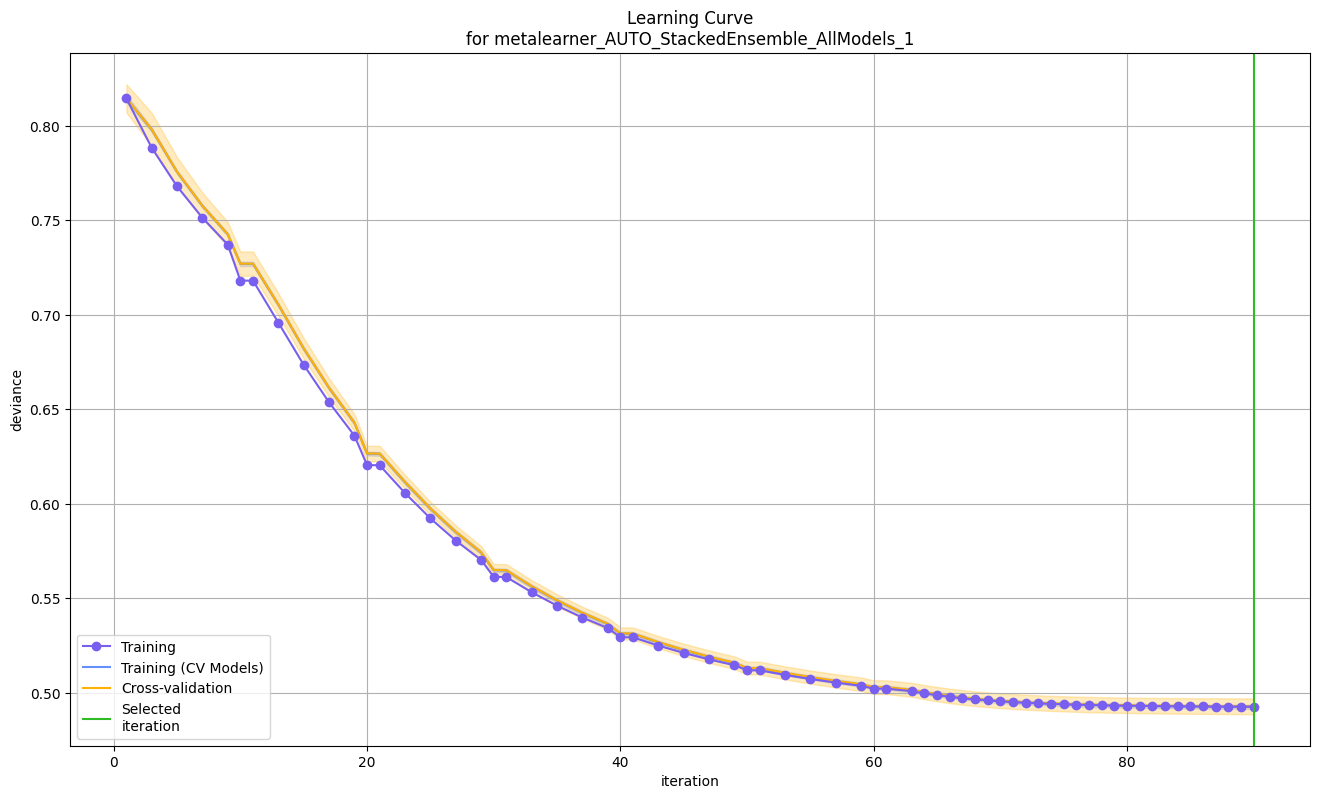

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

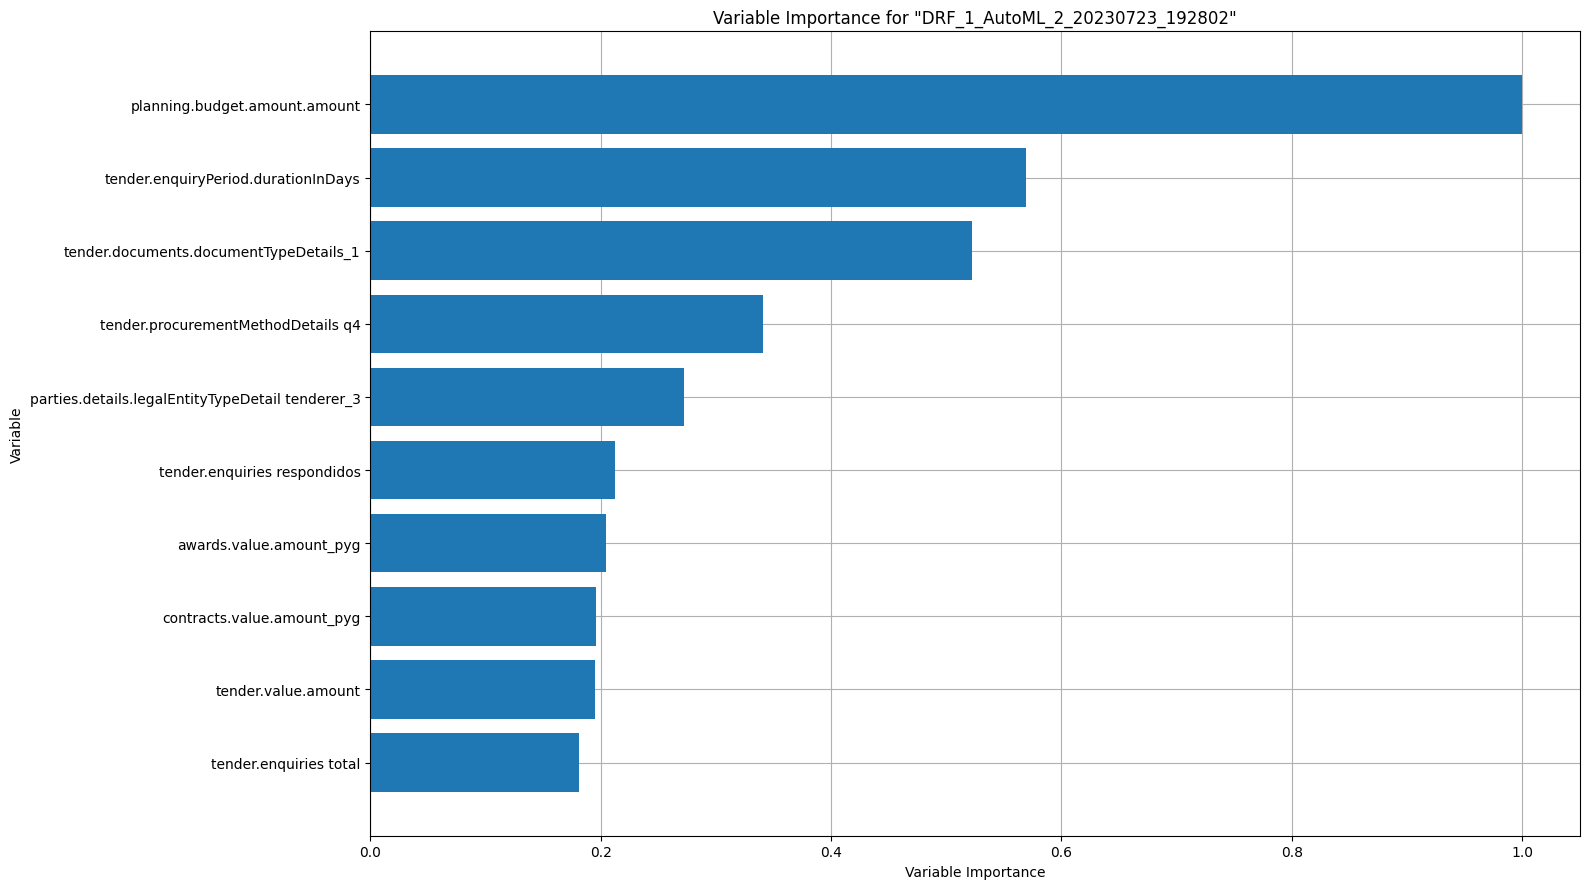

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

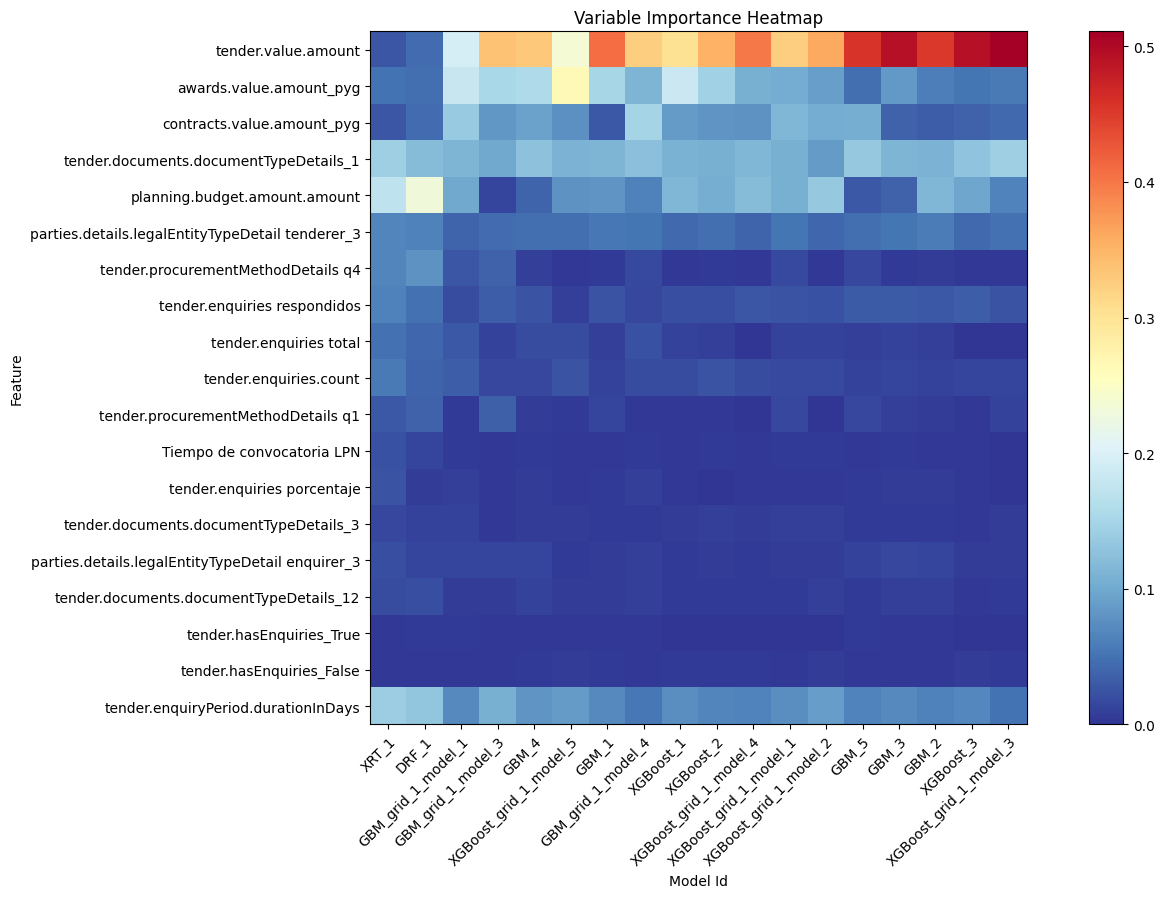

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

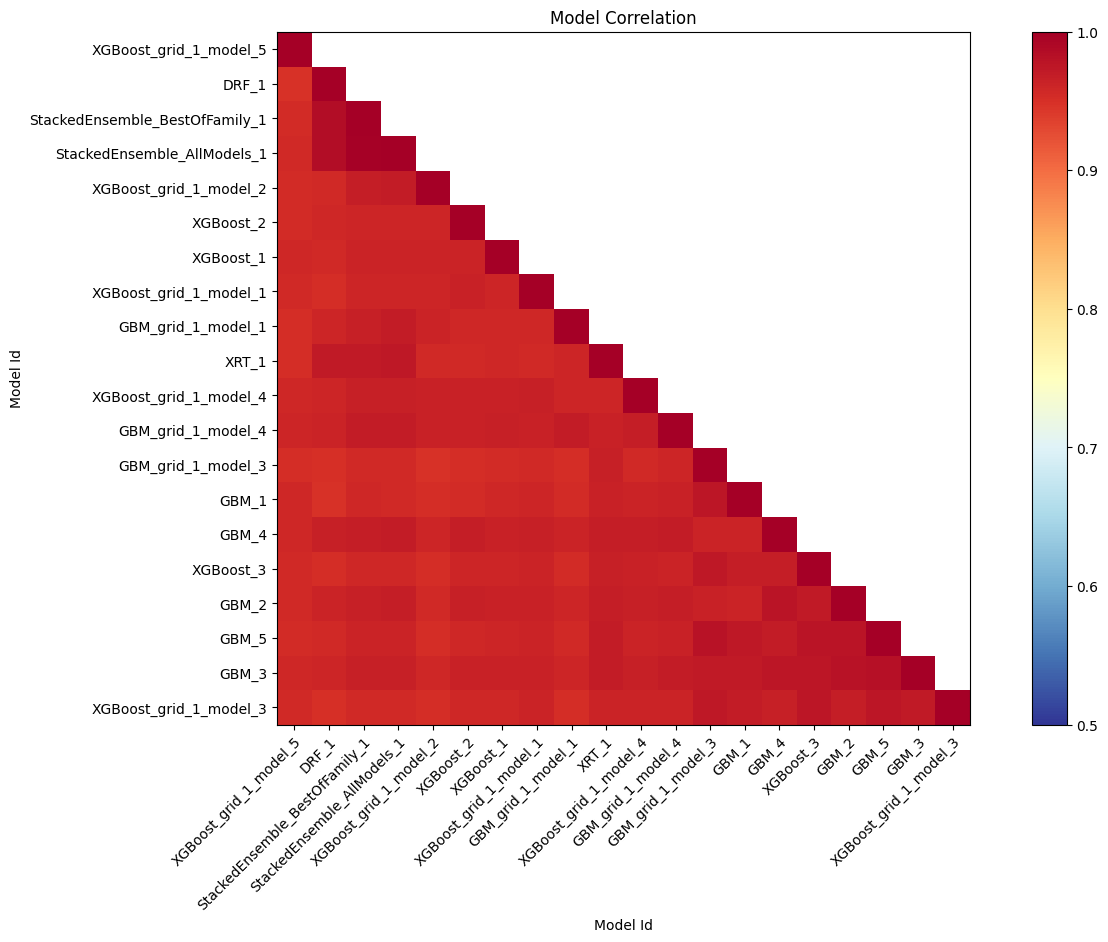

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

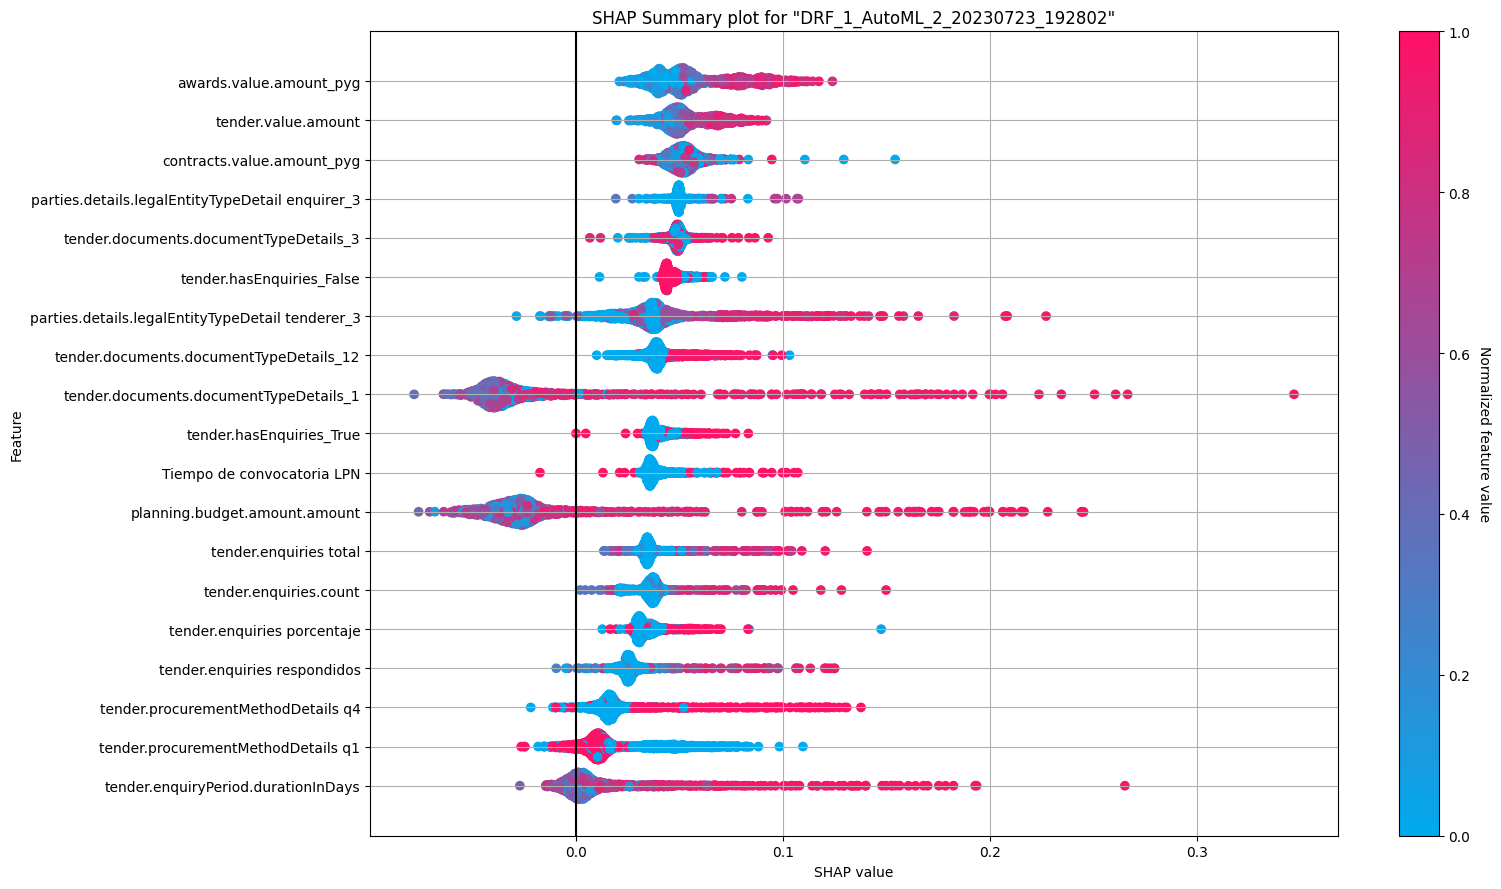

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

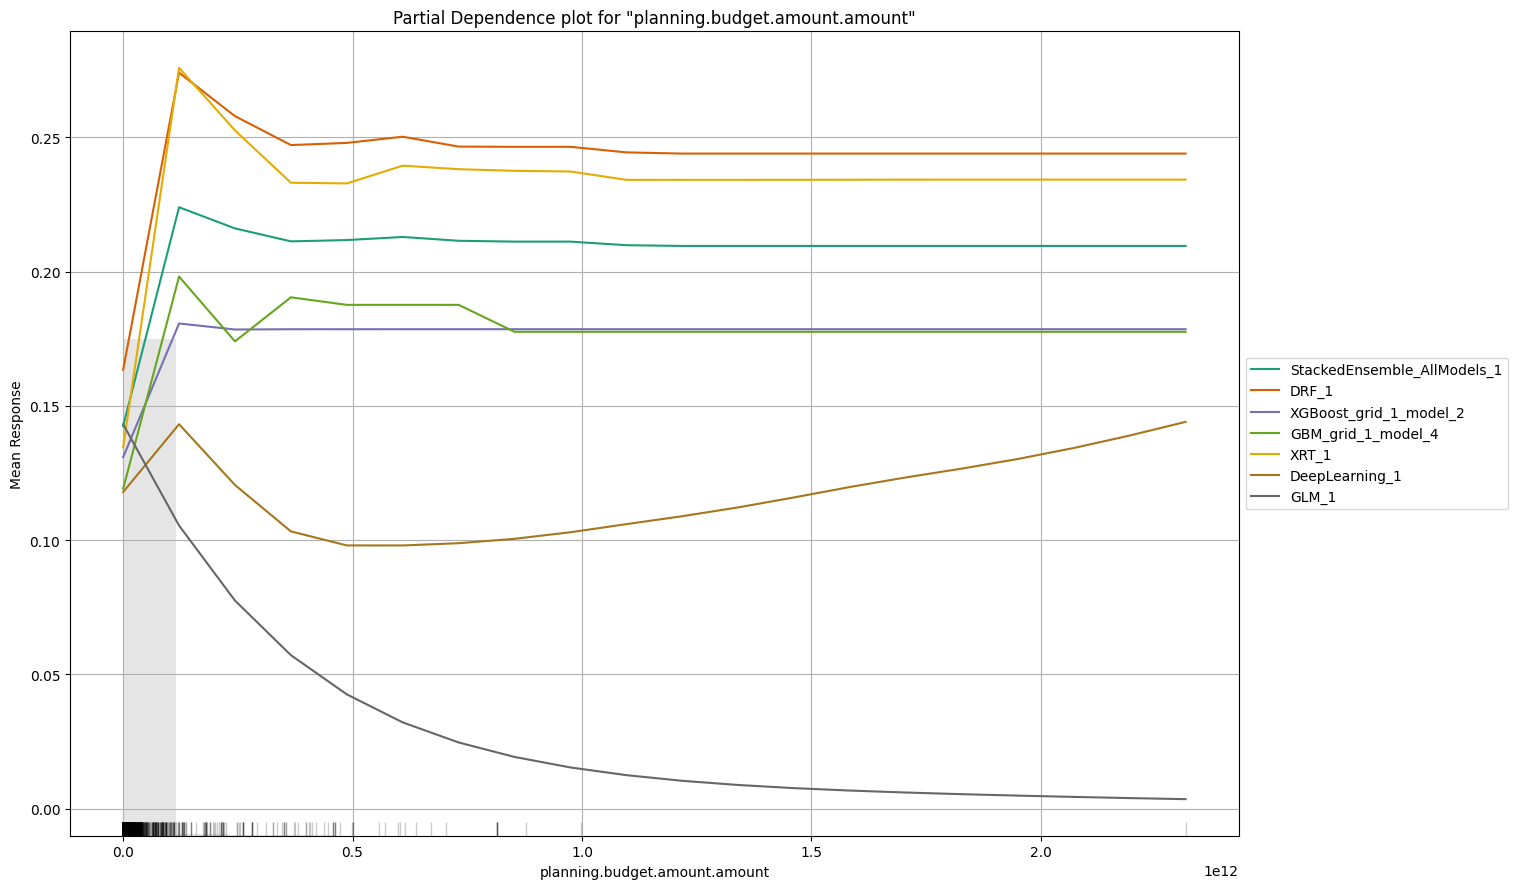

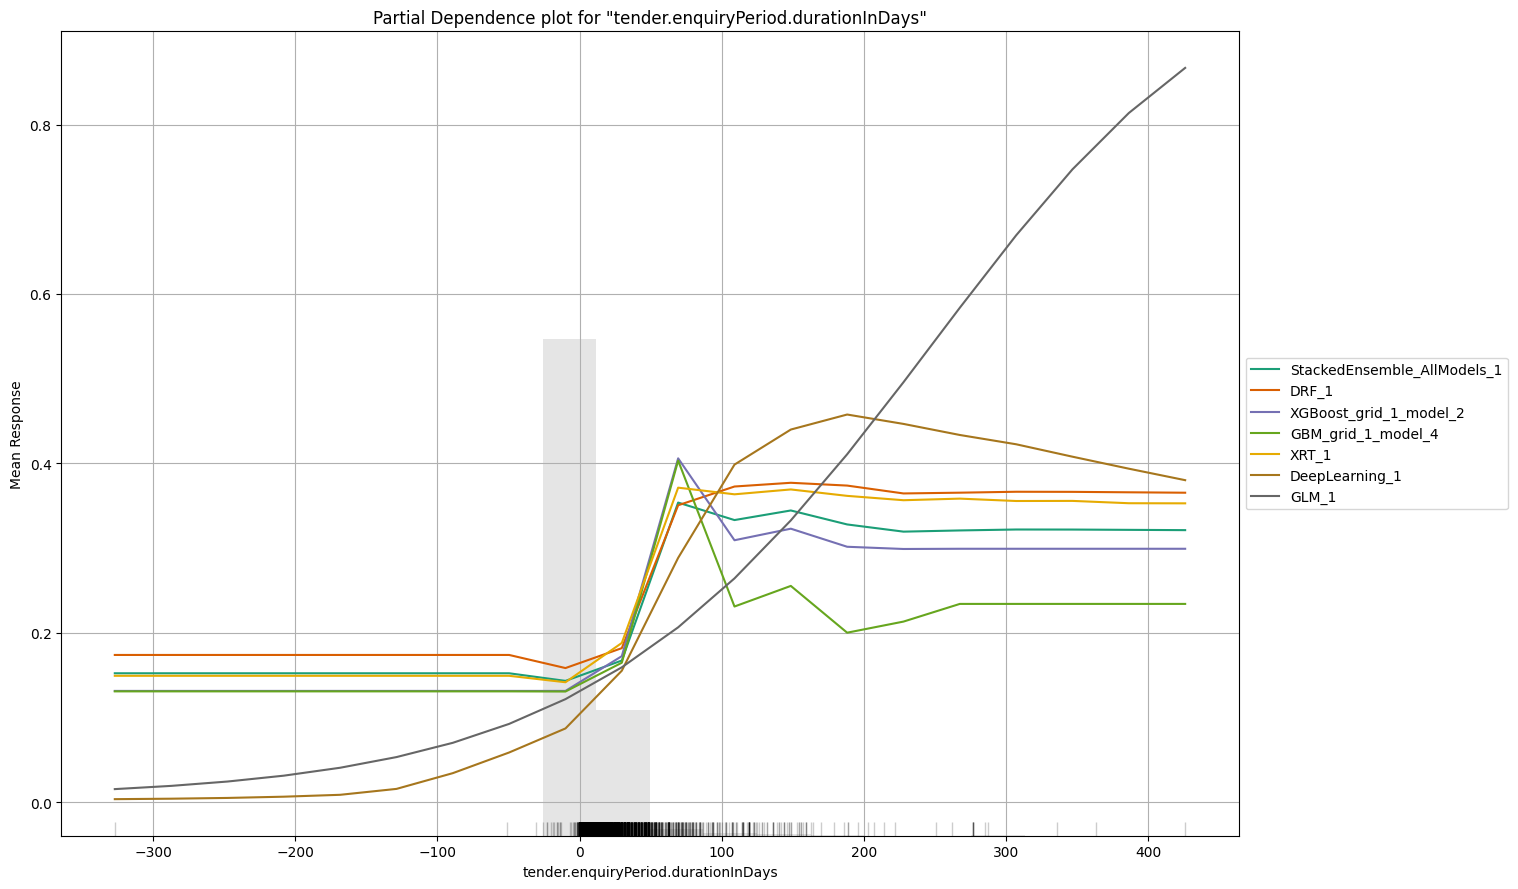

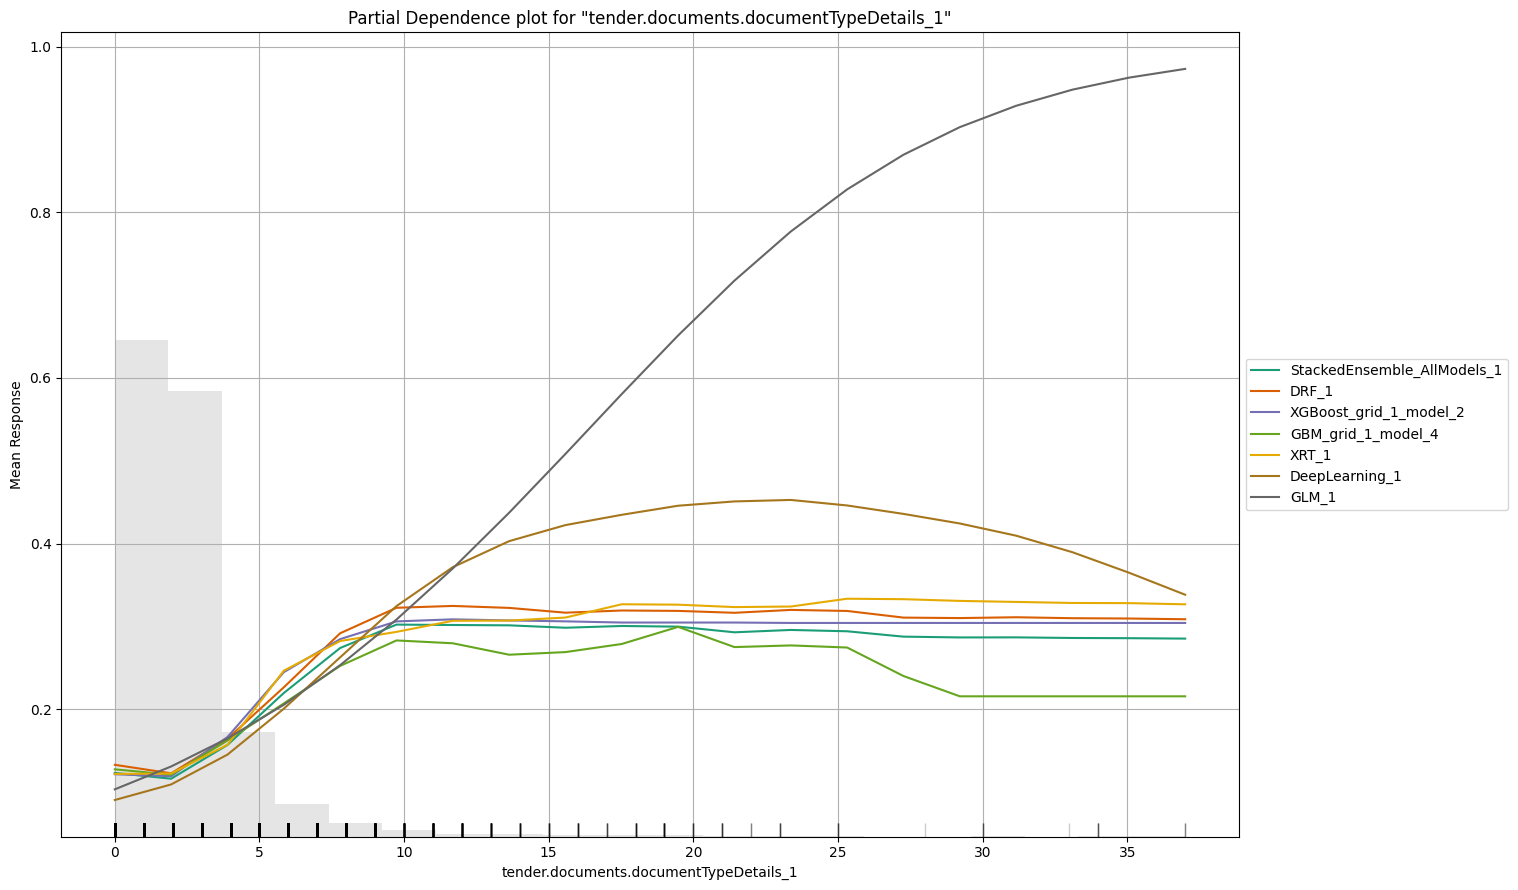

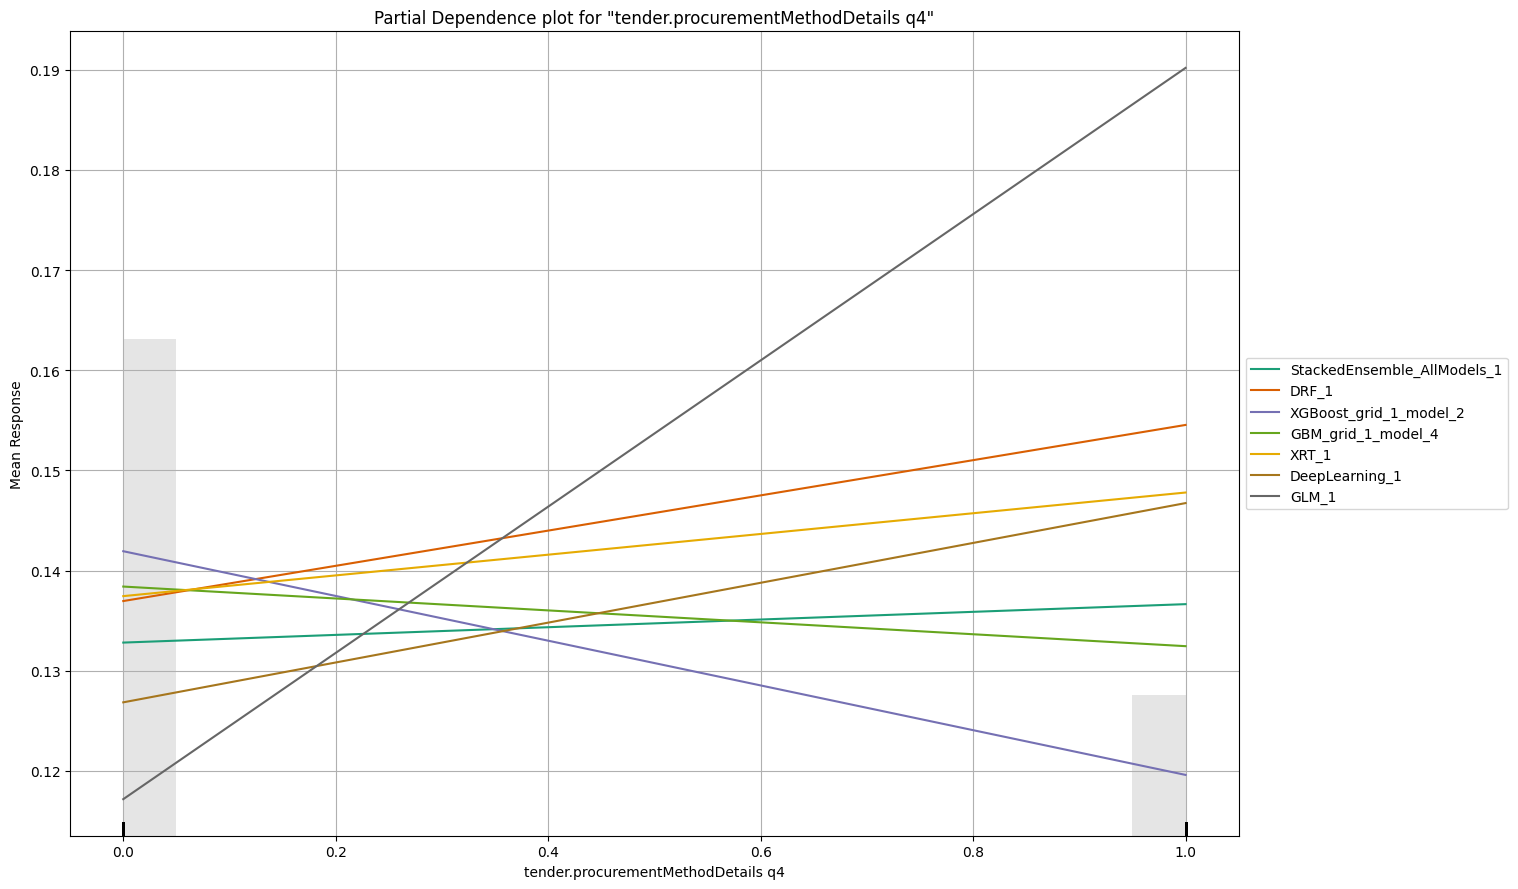

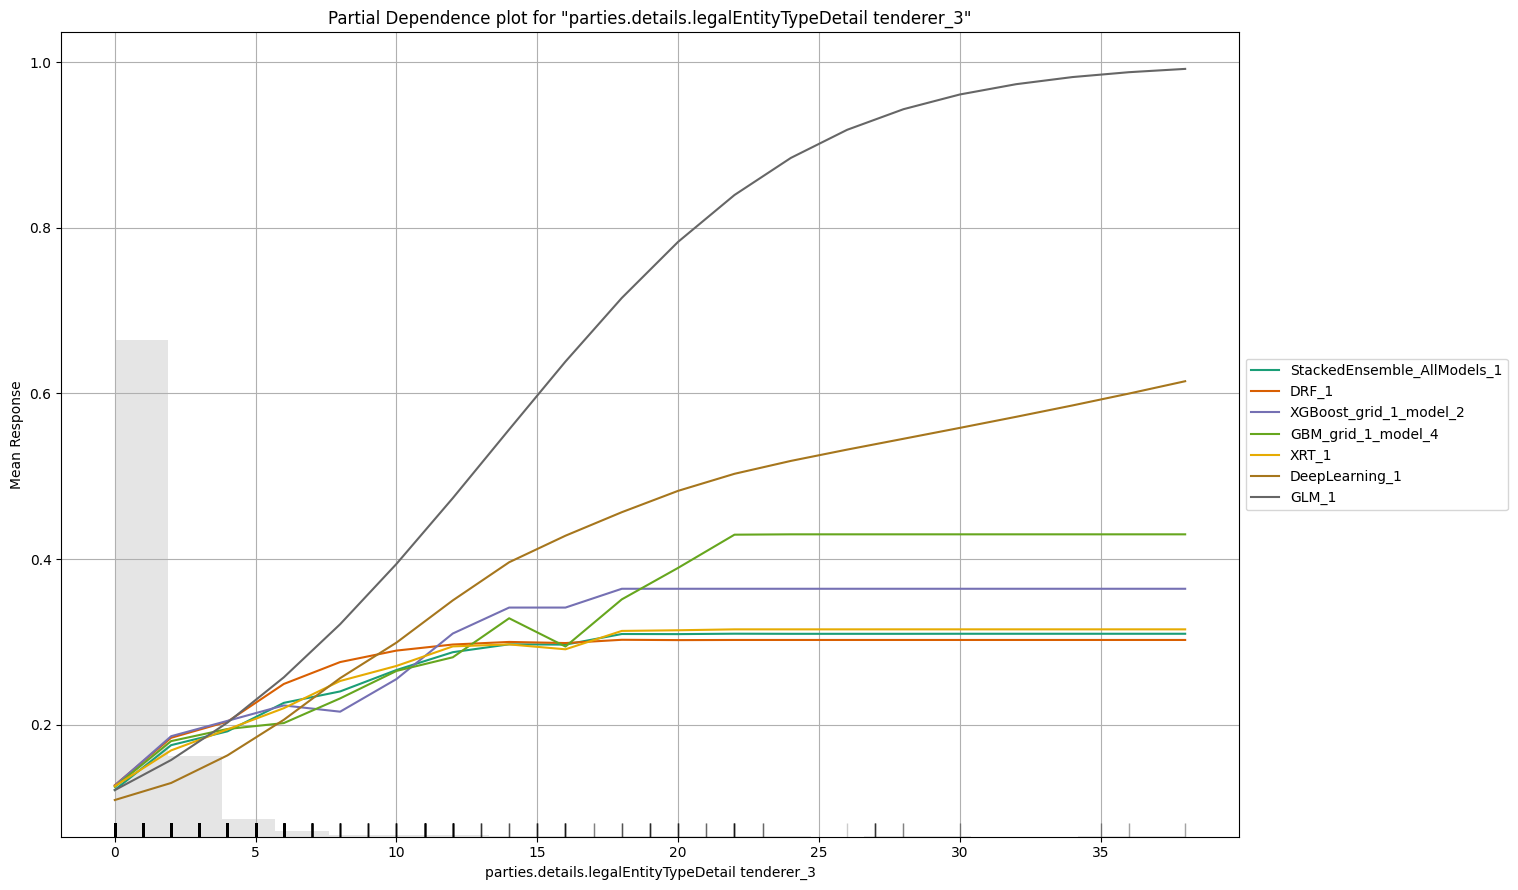

In [44]:
exa = aml.explain(test_h2o_spearman)